# Energy Production & Consumption Analysis

In [596]:
pip install country_converter

Note: you may need to restart the kernel to use updated packages.


In [597]:
# For Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

# For Visualization
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as pyo

from plotly.subplots import make_subplots
from plotly.offline import plot

# For Additional Use
import datetime 
import calendar
import country_converter as cc

# Template
pio.templates.default = "ggplot2"

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Import Statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose



### Overview

In [598]:
energy_data = pd.read_csv('World Energy Overview.csv')
energy_data.head()

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-01-31,4.932632,0.068103,0.403981,5.404715,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.403981,7.223873
1,1973-02-28,4.729582,0.064634,0.360900,5.155115,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.360900,6.592366
2,1973-03-31,4.946902,0.072494,0.400161,5.419556,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.400161,6.521439
3,1973-04-30,4.716271,0.064070,0.380470,5.160812,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.380470,5.941729
4,1973-05-31,4.956995,0.062111,0.392141,5.411246,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.392141,6.071940


In [599]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   599 non-null    object 
 1   Total Fossil Fuels Production          599 non-null    float64
 2   Nuclear Electric Power Production      599 non-null    float64
 3   Total Renewable Energy Production      599 non-null    float64
 4   Total Primary Energy Production        599 non-null    float64
 5   Primary Energy Imports                 599 non-null    float64
 6   Primary Energy Exports                 599 non-null    float64
 7   Primary Energy Net Imports             599 non-null    float64
 8   Primary Energy Stock Change and Other  599 non-null    float64
 9   Total Fossil Fuels Consumption         599 non-null    float64
 10  Nuclear Electric Power Consumption     599 non-null    float64
 11  Total 

In [892]:
energy_data = pd.DataFrame(energy_data)
energy_data['Date']= pd.to_datetime(energy_data['Date'])
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   599 non-null    datetime64[ns]
 1   Total Fossil Fuels Production          599 non-null    float64       
 2   Nuclear Electric Power Production      599 non-null    float64       
 3   Total Renewable Energy Production      599 non-null    float64       
 4   Total Primary Energy Production        599 non-null    float64       
 5   Primary Energy Imports                 599 non-null    float64       
 6   Primary Energy Exports                 599 non-null    float64       
 7   Primary Energy Net Imports             599 non-null    float64       
 8   Primary Energy Stock Change and Other  599 non-null    float64       
 9   Total Fossil Fuels Consumption         599 non-null    float64   

In [893]:
energy_data.head()

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-01-31,4.932632,0.068103,0.403981,5.404715,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.403981,7.223873
1,1973-02-28,4.729582,0.064634,0.360900,5.155115,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.360900,6.592366
2,1973-03-31,4.946902,0.072494,0.400161,5.419556,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.400161,6.521439
3,1973-04-30,4.716271,0.064070,0.380470,5.160812,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.380470,5.941729
4,1973-05-31,4.956995,0.062111,0.392141,5.411246,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.392141,6.071940


#### Total Primary Energy Consumption vs Total Energy Production

In [894]:
energy_data.columns

Index(['Date', 'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Primary Energy Imports', 'Primary Energy Exports',
       'Primary Energy Net Imports', 'Primary Energy Stock Change and Other',
       'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption'],
      dtype='object')

In [602]:
con_type_trend = energy_data[['Date', 'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption','Total Renewable Energy Consumption','Total Primary Energy Consumption']]
con_type_trend = pd.DataFrame(con_type_trend)
con_type_trend.head()

,Date,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-01-31,6.747651,0.068103,0.403981,7.223873
1,1973-02-28,6.163095,0.064634,0.360900,6.592366
2,1973-03-31,6.044647,0.072494,0.400161,6.521439
3,1973-04-30,5.493184,0.064070,0.380470,5.941729
4,1973-05-31,5.613551,0.062111,0.392141,6.071940


### Trial Here

In [900]:
trial0 = con_type_trend.reset_index()
trial0.head()

,Date,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,Total Fossil Fuels Consumption Changes,Nuclear Electric Consumption Changes,Total Renewable Energy Consumption Changes,Total Primary Energy Consumption Changes,Total Fossil Fuels Consumption Portion,Nuclear Electric Consumption Portion,Total Renewable Energy Consumption Portion
0,1973-01-31,6.747651,0.068103,0.403981,7.223873,NaN,NaN,NaN,NaN,93.407664,0.942749,5.592305
1,1973-02-28,6.163095,0.064634,0.360900,6.592366,-8.663104,-5.093755,-10.664115,-8.741945,93.488362,0.980437,5.474514
2,1973-03-31,6.044647,0.072494,0.400161,6.521439,-1.921892,12.160782,10.878637,-1.075896,92.688853,1.111626,6.136084
3,1973-04-30,5.493184,0.064070,0.380470,5.941729,-9.123163,-11.620272,-4.920769,-8.889296,92.450935,1.078306,6.403355
4,1973-05-31,5.613551,0.062111,0.392141,6.071940,2.191206,-3.057593,3.067522,2.191466,92.450699,1.022919,6.458249


In [901]:
trial0['Year'] = trial0['Date'].dt.year
trial0.head()

,Date,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,Total Fossil Fuels Consumption Changes,Nuclear Electric Consumption Changes,Total Renewable Energy Consumption Changes,Total Primary Energy Consumption Changes,Total Fossil Fuels Consumption Portion,Nuclear Electric Consumption Portion,Total Renewable Energy Consumption Portion,Year
0,1973-01-31,6.747651,0.068103,0.403981,7.223873,NaN,NaN,NaN,NaN,93.407664,0.942749,5.592305,1973
1,1973-02-28,6.163095,0.064634,0.360900,6.592366,-8.663104,-5.093755,-10.664115,-8.741945,93.488362,0.980437,5.474514,1973
2,1973-03-31,6.044647,0.072494,0.400161,6.521439,-1.921892,12.160782,10.878637,-1.075896,92.688853,1.111626,6.136084,1973
3,1973-04-30,5.493184,0.064070,0.380470,5.941729,-9.123163,-11.620272,-4.920769,-8.889296,92.450935,1.078306,6.403355,1973
4,1973-05-31,5.613551,0.062111,0.392141,6.071940,2.191206,-3.057593,3.067522,2.191466,92.450699,1.022919,6.458249,1973


In [902]:
trial0.columns

Index(['Date', 'Total Fossil Fuels Consumption',
       'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption',
       'Total Fossil Fuels Consumption Changes ',
       'Nuclear Electric Consumption Changes ',
       'Total Renewable Energy Consumption Changes ',
       'Total Primary Energy Consumption Changes ',
       'Total Fossil Fuels Consumption Portion ',
       'Nuclear Electric Consumption Portion ',
       'Total Renewable Energy Consumption Portion ', 'Year'],
      dtype='object')

In [905]:
trial0_year = pd.DataFrame(trial0.groupby('Year')['Total Primary Energy Consumption'].sum())
trial0_year.head()

,Total Primary Energy Consumption
Year,
1973,75.651910
1974,73.929185
1975,71.931428
1976,75.938523
1977,77.920418


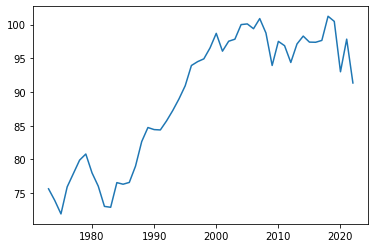

In [906]:
plt.plot(trial0_year)

### Trial End

In [603]:
def consumption_changes(energy_names, energy_consumption_types):
    for energy_name, energy_consumption_type in zip(energy_names, energy_consumption_types):
        con_type_trend[energy_name + ' Changes '] = con_type_trend[energy_consumption_type].pct_change()*100

In [604]:
energy_con_names = ['Total Fossil Fuels Consumption','Nuclear Electric Consumption','Total Renewable Energy Consumption','Total Primary Energy Consumption']
energy_con_data = ['Total Fossil Fuels Consumption','Nuclear Electric Power Consumption','Total Renewable Energy Consumption','Total Primary Energy Consumption']


In [605]:
consumption_changes(energy_con_names, energy_con_data)
con_type_trend.head()

,Date,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,Total Fossil Fuels Consumption Changes,Nuclear Electric Consumption Changes,Total Renewable Energy Consumption Changes,Total Primary Energy Consumption Changes
0,1973-01-31,6.747651,0.068103,0.403981,7.223873,NaN,NaN,NaN,NaN
1,1973-02-28,6.163095,0.064634,0.360900,6.592366,-8.663104,-5.093755,-10.664115,-8.741945
2,1973-03-31,6.044647,0.072494,0.400161,6.521439,-1.921892,12.160782,10.878637,-1.075896
3,1973-04-30,5.493184,0.064070,0.380470,5.941729,-9.123163,-11.620272,-4.920769,-8.889296
4,1973-05-31,5.613551,0.062111,0.392141,6.071940,2.191206,-3.057593,3.067522,2.191466


In [606]:
con_type_trend = con_type_trend.set_index('Date')
con_type_trend.iloc[:,1:] = con_type_trend.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

In [607]:
con_primary_energy_trend = seasonal_decompose(con_type_trend['Total Primary Energy Consumption'], model='additive')

In [608]:
con_primary_energy_trend = pd.DataFrame({
    'trend' : con_primary_energy_trend.trend,
    'seasonal' : con_primary_energy_trend.seasonal,
    'residual' : con_primary_energy_trend.resid
})
con_primary_energy_trend

,trend,seasonal,residual
Date,,,
1973-01-31,NaN,1.012281,NaN
1973-02-28,NaN,0.151135,NaN
1973-03-31,NaN,0.264629,NaN
1973-04-30,NaN,-0.461578,NaN
1973-05-31,NaN,-0.416919,NaN
...,...,...,...
2022-07-31,NaN,0.031970,NaN
2022-08-31,NaN,0.077385,NaN
2022-09-30,NaN,-0.518903,NaN


In [609]:
energy_data

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-01-31,4.932632,0.068103,0.403981,5.404715,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.403981,7.223873
1,1973-02-28,4.729582,0.064634,0.360900,5.155115,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.360900,6.592366
2,1973-03-31,4.946902,0.072494,0.400161,5.419556,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.400161,6.521439
3,1973-04-30,4.716271,0.064070,0.380470,5.160812,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.380470,5.941729
4,1973-05-31,4.956995,0.062111,0.392141,5.411246,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.392141,6.071940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2022-07-31,6.921426,0.718109,1.132400,8.771935,1.907862,2.294320,-0.386458,0.199327,6.736891,0.718109,1.111161,8.584805
595,2022-08-31,7.047525,0.718526,1.044026,8.810077,1.821828,2.327090,-0.505262,0.225628,6.755154,0.718526,1.036589,8.530444
596,2022-09-30,6.915201,0.664673,0.978647,8.558521,1.702048,2.219831,-0.517784,-0.257997,6.144280,0.664673,0.960694,7.782741
597,2022-10-31,7.126618,0.614741,1.019209,8.760568,1.767733,2.322475,-0.554743,-0.394651,6.179721,0.614741,1.006859,7.811175


In [610]:
prod_type_trend = energy_data[['Date', 'Total Fossil Fuels Production', 'Nuclear Electric Power Production', 'Total Renewable Energy Production', 'Total Primary Energy Production']]
prod_type_trend.head()



,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production
0,1973-01-31,4.932632,0.068103,0.403981,5.404715
1,1973-02-28,4.729582,0.064634,0.360900,5.155115
2,1973-03-31,4.946902,0.072494,0.400161,5.419556
3,1973-04-30,4.716271,0.064070,0.380470,5.160812
4,1973-05-31,4.956995,0.062111,0.392141,5.411246


In [611]:
print(type(energy_data))


<class 'pandas.core.frame.DataFrame'>


In [612]:
def production_changes(energy_names, energy_production_types):
    for energy_name, energy_production_type in zip(energy_names, energy_production_types):
        prod_type_trend[energy_name + ' Changes '] = prod_type_trend[energy_production_type].pct_change()*100

In [613]:
energy_production_types = ['Total Fossil Fuels Production','Nuclear Electric Power Production','Total Renewable Energy Production','Total Primary Energy Production']
energy_production_data = ['Total Fossil Fuels Production','Nuclear Electric Power Production','Total Renewable Energy Production','Total Primary Energy Production']

In [614]:
production_changes(energy_production_types, energy_production_data)
prod_type_trend.tail()

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Total Fossil Fuels Production Changes,Nuclear Electric Power Production Changes,Total Renewable Energy Production Changes,Total Primary Energy Production Changes
594,2022-07-31,6.921426,0.718109,1.132400,8.771935,3.325037,4.780505,-4.576599,2.347356
595,2022-08-31,7.047525,0.718526,1.044026,8.810077,1.821864,0.058069,-7.804133,0.434819
596,2022-09-30,6.915201,0.664673,0.978647,8.558521,-1.877595,-7.494927,-6.262200,-2.855321
597,2022-10-31,7.126618,0.614741,1.019209,8.760568,3.057279,-7.512265,4.144702,2.360770
598,2022-11-30,6.875368,0.647029,1.097519,8.619915,-3.525515,5.252293,7.683409,-1.605524


In [615]:
prod_type_trend = prod_type_trend.set_index('Date')
prod_type_trend.iloc[:,1:] = prod_type_trend.iloc[:,1:].apply(pd.to_numeric, errors='coerce') 

In [616]:
prod_primary_energy_trend = seasonal_decompose(prod_type_trend['Total Primary Energy Production'], model='additive') 

In [617]:
prod_primary_energy_trend = pd.DataFrame({
    'trend' : prod_primary_energy_trend.trend,
    'seasonal' : prod_primary_energy_trend.seasonal,
    'residual' : prod_primary_energy_trend.resid
})

prod_primary_energy_trend

,trend,seasonal,residual
Date,,,
1973-01-31,NaN,0.179071,NaN
1973-02-28,NaN,-0.340036,NaN
1973-03-31,NaN,0.190751,NaN
1973-04-30,NaN,-0.131769,NaN
1973-05-31,NaN,0.043945,NaN
...,...,...,...
2022-07-31,NaN,0.007925,NaN
2022-08-31,NaN,0.152651,NaN
2022-09-30,NaN,-0.127669,NaN


In [618]:
fig_total_prim_cons_prod = go.Figure()

fig_total_prim_cons_prod.add_trace(go.Scatter(x=energy_data['Date'], y=energy_data['Total Primary Energy Consumption'], name='Total Primary Energy Consumption'))
fig_total_prim_cons_prod.add_trace(go.Scatter(x=energy_data['Date'], y=energy_data['Total Primary Energy Production'], name='Total Primary Energy Production'))
fig_total_prim_cons_prod = fig_total_prim_cons_prod.update_layout(title='Figure 1: Total Primary Energy Consumption & Production')
fig_total_prim_cons_prod.update_xaxes(rangeslider_visible=True)
fig_total_prim_cons_prod.show()


In [619]:
fig_global_prod_con = go.Figure()
fig_global_prod_con = fig_global_prod_con.add_trace(go.Scatter(x=con_primary_energy_trend.index, y=con_primary_energy_trend['trend'], name='Global Consumption Trend'))
fig_global_prod_con = fig_global_prod_con.add_trace(go.Scatter(x=prod_primary_energy_trend.index, y=prod_primary_energy_trend['trend'], name='Global Production Trend'))
fig_global_prod_con = fig_global_prod_con.update_layout(title='Figure 2: Global Consumption & Production Trend')
fig_global_prod_con.update_xaxes(rangeslider_visible=True)
fig_global_prod_con.show()


In [620]:
con_type_trend.head()
con_type_trend.columns

Index(['Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption',
       'Total Fossil Fuels Consumption Changes ',
       'Nuclear Electric Consumption Changes ',
       'Total Renewable Energy Consumption Changes ',
       'Total Primary Energy Consumption Changes '],
      dtype='object')

In [621]:
fig_global_con_change = go.Figure()
fig_global_con_change = fig_global_con_change.add_trace(go.Scatter(x=con_type_trend.index, y=con_type_trend['Total Primary Energy Consumption Changes '], name='Global Consumption Trend')) 
fig_global_con_change = fig_global_con_change.update_layout(title='Figure 3: Changes in Global Consumption Trend')
fig_global_con_change.update_xaxes(rangeslider_visible=True)
fig_global_con_change.show()

#### **Analysis on Overview of Global Energy Consumption & Production**

Throughout 1973 to 2022, despite volatility of the global energy consumption, it is increasing from 7.22 qBTU in 1973 to 8.29 qBTU in November 2022, reaching its hightest level 9.66qBTU in January 2018 (*Figure 1*). Meanwhile, global energy production, despite the lesser volatility, increased from 5.40qBTU in January 1973 to 8.62 qBTU in November 2022, reaching its highest level in 8.78qBTU in 2020. 

However, throughout 1970s and 1980, global energy consumption recorded several significant low point, particlularly in 1975 and 1982. In April 2020, global energy consumption slumped to the lowest level in almost three decades. Similar observation also could be made for global energy production. Several slump were recorded between 1973 to 1985 and the latest slump in 2020 as severe as the slump in 1973.

Deseasonalizing the time series (*Figure 2*) further revealed upward trend of the global energy consumption and production with the increasing trend rally continously between 1990 to 2000.  Higher increase in the energy consumption trend could be seen througout 1990 to 2000. Despite this, global energy consumption recorded two significant decline between 1973 to 1985. In 2020, global energy consumption fell to the lowest in 25 years.

Global energy production also shown similar upward trending. The upward trend in global energy production rally uninterruptrdly for three decades.  Meanwhile, global energy production recorded higher production rate increase between 2015 to 2020. In contrast with global energy consumption, slump in the global energy production is less severe. In 2015, global energy production decline to two years low with the similar trend also can be observed in 2020.




#### Energy Production Trend by Source

In [622]:
energy_data.columns

Index(['Date', 'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Primary Energy Imports', 'Primary Energy Exports',
       'Primary Energy Net Imports', 'Primary Energy Stock Change and Other',
       'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption'],
      dtype='object')

In [623]:
fig0 = go.Figure()
fig0 = fig0.add_trace(go.Scatter(x=prod_type_trend.index, y=prod_type_trend['Total Fossil Fuels Production'], name='Total Fossil Fuels Production'))
fig0 =fig0.add_trace(go.Scatter(x=prod_type_trend.index, y=prod_type_trend['Nuclear Electric Power Production'], name='Nuclear Electric Power Production'))
fig0 =fig0.add_trace(go.Scatter(x=prod_type_trend.index, y=prod_type_trend['Total Renewable Energy Production'], name='Total Renewable Energy Production'))
fig0 =fig0.add_trace(go.Scatter(x=prod_type_trend.index, y=prod_type_trend['Total Primary Energy Production'], name='Total Primary Energy Production'))
fig0 =fig0.update_layout(title='Total Energy Production by Type of Energy')
fig0.update_xaxes(rangeslider_visible=True)
fig0.show()

In [624]:
prod_type_trend.head()

,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Total Fossil Fuels Production Changes,Nuclear Electric Power Production Changes,Total Renewable Energy Production Changes,Total Primary Energy Production Changes
Date,,,,,,,,
1973-01-31,4.932632,0.068103,0.403981,5.404715,NaN,NaN,NaN,NaN
1973-02-28,4.729582,0.064634,0.360900,5.155115,-4.116464,-5.093755,-10.664115,-4.618190
1973-03-31,4.946902,0.072494,0.400161,5.419556,4.594909,12.160782,10.878637,5.129682
1973-04-30,4.716271,0.064070,0.380470,5.160812,-4.662130,-11.620272,-4.920769,-4.774266
1973-05-31,4.956995,0.062111,0.392141,5.411246,5.104117,-3.057593,3.067522,4.852608


#### Analysis

In [625]:
prod_type_trend.columns

Index(['Total Fossil Fuels Production', 'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Total Fossil Fuels Production Changes ',
       'Nuclear Electric Power Production Changes ',
       'Total Renewable Energy Production Changes ',
       'Total Primary Energy Production Changes '],
      dtype='object')

In [626]:
prod_type_portion = energy_data[['Date', 'Total Fossil Fuels Production','Nuclear Electric Power Production','Total Renewable Energy Production','Total Primary Energy Production']]
prod_type_portion.head()

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production
0,1973-01-31,4.932632,0.068103,0.403981,5.404715
1,1973-02-28,4.729582,0.064634,0.360900,5.155115
2,1973-03-31,4.946902,0.072494,0.400161,5.419556
3,1973-04-30,4.716271,0.064070,0.380470,5.160812
4,1973-05-31,4.956995,0.062111,0.392141,5.411246


In [627]:
def prod_portion(energy_names,energy_production_types):
    for energy_name,energy_production_type in zip(energy_names, energy_production_types):
        prod_type_portion[energy_name + ' Portion '] = (prod_type_portion[energy_production_type]/prod_type_portion['Total Primary Energy Production'])*100

In [628]:
prod_portion(['Fossil_Fuels','Nuclear_Electric_Power','Renewable_Energy'],['Total Fossil Fuels Production','Nuclear Electric Power Production','Total Renewable Energy Production'])


In [629]:
prod_type_portion.head()

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Fossil_Fuels Portion,Nuclear_Electric_Power Portion,Renewable_Energy Portion
0,1973-01-31,4.932632,0.068103,0.403981,5.404715,91.265349,1.260066,7.474603
1,1973-02-28,4.729582,0.064634,0.360900,5.155115,91.745422,1.253784,7.000814
2,1973-03-31,4.946902,0.072494,0.400161,5.419556,91.278732,1.337637,7.383649
3,1973-04-30,4.716271,0.064070,0.380470,5.160812,91.386220,1.241471,7.372289
4,1973-05-31,4.956995,0.062111,0.392141,5.411246,91.605427,1.147813,7.246778


In [630]:
prod_type_portion.columns

Index(['Date', 'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Fossil_Fuels Portion ', 'Nuclear_Electric_Power Portion ',
       'Renewable_Energy Portion '],
      dtype='object')

In [631]:
fig2 = px.bar(prod_type_portion, x="Date", y=['Fossil_Fuels Portion ', 'Nuclear_Electric_Power Portion ','Renewable_Energy Portion '], \
               title=" Energy Production by Type of Energy")

fig2.show()

In [632]:
energy_data.head()

,Date,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973-01-31,4.932632,0.068103,0.403981,5.404715,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.403981,7.223873
1,1973-02-28,4.729582,0.064634,0.360900,5.155115,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.360900,6.592366
2,1973-03-31,4.946902,0.072494,0.400161,5.419556,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.400161,6.521439
3,1973-04-30,4.716271,0.064070,0.380470,5.160812,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.380470,5.941729
4,1973-05-31,4.956995,0.062111,0.392141,5.411246,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.392141,6.071940


In [633]:
energy_data.columns

Index(['Date', 'Total Fossil Fuels Production',
       'Nuclear Electric Power Production',
       'Total Renewable Energy Production', 'Total Primary Energy Production',
       'Primary Energy Imports', 'Primary Energy Exports',
       'Primary Energy Net Imports', 'Primary Energy Stock Change and Other',
       'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption'],
      dtype='object')

In [634]:
def con_type_portion(energy_names, energy_consumption_types):
    for energy_name, energy_consumption_type in zip(energy_names, energy_consumption_types):
        con_type_trend[energy_name + ' Portion '] = (con_type_trend[energy_consumption_type]/con_type_trend['Total Primary Energy Consumption'])*100


In [635]:
con_type_trend.columns

Index(['Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption',
       'Total Fossil Fuels Consumption Changes ',
       'Nuclear Electric Consumption Changes ',
       'Total Renewable Energy Consumption Changes ',
       'Total Primary Energy Consumption Changes '],
      dtype='object')

In [636]:
energy_con_names = ['Total Fossil Fuels Consumption','Nuclear Electric Consumption','Total Renewable Energy Consumption']
energy_con_data = ['Total Fossil Fuels Consumption','Nuclear Electric Power Consumption','Total Renewable Energy Consumption']

In [637]:
con_type_portion(energy_con_names, energy_con_data)
con_type_trend.head()

,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,Total Fossil Fuels Consumption Changes,Nuclear Electric Consumption Changes,Total Renewable Energy Consumption Changes,Total Primary Energy Consumption Changes,Total Fossil Fuels Consumption Portion,Nuclear Electric Consumption Portion,Total Renewable Energy Consumption Portion
Date,,,,,,,,,,,
1973-01-31,6.747651,0.068103,0.403981,7.223873,NaN,NaN,NaN,NaN,93.407664,0.942749,5.592305
1973-02-28,6.163095,0.064634,0.360900,6.592366,-8.663104,-5.093755,-10.664115,-8.741945,93.488362,0.980437,5.474514
1973-03-31,6.044647,0.072494,0.400161,6.521439,-1.921892,12.160782,10.878637,-1.075896,92.688853,1.111626,6.136084
1973-04-30,5.493184,0.064070,0.380470,5.941729,-9.123163,-11.620272,-4.920769,-8.889296,92.450935,1.078306,6.403355
1973-05-31,5.613551,0.062111,0.392141,6.071940,2.191206,-3.057593,3.067522,2.191466,92.450699,1.022919,6.458249


In [638]:
con_type_trend.index

DatetimeIndex(['1973-01-31', '1973-02-28', '1973-03-31', '1973-04-30',
               '1973-05-31', '1973-06-30', '1973-07-31', '1973-08-31',
               '1973-09-30', '1973-10-31',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=599, freq=None)

In [639]:
fig3 = px.line(con_type_trend, x=con_type_trend.index, y=['Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption', 'Total Renewable Energy Consumption', 'Total Primary Energy Consumption'],title=" Energy Consumption by Type of Energy")

fig3.show()

In [640]:
con_type_trend.columns

Index(['Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption',
       'Total Fossil Fuels Consumption Changes ',
       'Nuclear Electric Consumption Changes ',
       'Total Renewable Energy Consumption Changes ',
       'Total Primary Energy Consumption Changes ',
       'Total Fossil Fuels Consumption Portion ',
       'Nuclear Electric Consumption Portion ',
       'Total Renewable Energy Consumption Portion '],
      dtype='object')

In [641]:
fig4 = make_subplots(rows=4, cols=1)

fig4.add_trace(go.Scatter(x=con_type_trend.index, y=con_type_trend['Total Fossil Fuels Consumption Changes '], name='Total Fossil Fuels Consumption'), row=1, col=1)
fig4.add_trace(go.Scatter(x=con_type_trend.index, y=con_type_trend['Nuclear Electric Consumption Changes '], name='Nuclear Electric Power Consumption Changes'), row=2, col=1)
fig4.add_trace(go.Scatter(x=con_type_trend.index, y=con_type_trend['Total Renewable Energy Consumption Changes '], name='Total Renewable Energy Consumption Changes'), row=3, col=1)
fig4.add_trace(go.Scatter(x=con_type_trend.index, y=con_type_trend['Total Primary Energy Consumption Changes '], name='Total Primary Energy Consumption Changes'), row=4, col=1)

fig4.show()

In [642]:
con_type_trend.head()

,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption,Total Fossil Fuels Consumption Changes,Nuclear Electric Consumption Changes,Total Renewable Energy Consumption Changes,Total Primary Energy Consumption Changes,Total Fossil Fuels Consumption Portion,Nuclear Electric Consumption Portion,Total Renewable Energy Consumption Portion
Date,,,,,,,,,,,
1973-01-31,6.747651,0.068103,0.403981,7.223873,NaN,NaN,NaN,NaN,93.407664,0.942749,5.592305
1973-02-28,6.163095,0.064634,0.360900,6.592366,-8.663104,-5.093755,-10.664115,-8.741945,93.488362,0.980437,5.474514
1973-03-31,6.044647,0.072494,0.400161,6.521439,-1.921892,12.160782,10.878637,-1.075896,92.688853,1.111626,6.136084
1973-04-30,5.493184,0.064070,0.380470,5.941729,-9.123163,-11.620272,-4.920769,-8.889296,92.450935,1.078306,6.403355
1973-05-31,5.613551,0.062111,0.392141,6.071940,2.191206,-3.057593,3.067522,2.191466,92.450699,1.022919,6.458249


In [643]:
con_type_trend.columns

Index(['Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption',
       'Total Fossil Fuels Consumption Changes ',
       'Nuclear Electric Consumption Changes ',
       'Total Renewable Energy Consumption Changes ',
       'Total Primary Energy Consumption Changes ',
       'Total Fossil Fuels Consumption Portion ',
       'Nuclear Electric Consumption Portion ',
       'Total Renewable Energy Consumption Portion '],
      dtype='object')

In [644]:
fig5 = px.bar(con_type_trend, x=con_type_trend.index, y=['Total Fossil Fuels Consumption Portion ', 'Nuclear Electric Consumption Portion ','Total Renewable Energy Consumption Portion '], \
               title=" Energy Consumption by Type of Energy")
fig5.show()

### Regional Energy Analysis

#### Coal

In [645]:
con_coal = pd.read_csv('Consumption_Data/Consumption_Coal.csv')
con_coal.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
0,Africa,Algeria,0.002547398,0.007655064,0.020475801,0.033213824,0.034235723,0.034242132,0.034610211,0.035079318,...,0.001259621,0.000835328,0.000576922,0.000575219,0.000924225,0.000410418,0.000405436,0.000658437,0.00094109,0.594818
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,Africa,Benin,0,0,0,0,0,0,0,0,...,3.17E-05,0.000961001,0.001037911,0.001985751,0.002992505,0.002987991,0.002938642,0.001951128,0.003932631,0.019046
3,Africa,Botswana,0.008660526,0.009356617,0.010099701,0.00986717,0.009751175,0.010819193,0.01211937,0.012351123,...,0.014232074,0.016837001,0.027546501,0.038035577,0.035819574,0.033554487,0.031321952,0.029050749,0.032820821,0.808603
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [646]:
prod_coal = pd.read_csv('Production_Data/Production_Coal.csv')
prod_coal.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
0,Africa,Algeria,7.59E-05,0.000240414,0.000404907,0.0005694,0.000575727,0.000582054,0.000278374,0.000240414,...,0,0,0,0,0,0,0,0,0,0.000000
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033315425,0.038212317,0.046534212,0.04192044,0.049608123,0.048393175,0.047178203,0.041939121,0.044340069,0.952191
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


#### Coal Production & Consumption by Regions

Africa

In [647]:
con_coal_africa = con_coal[con_coal['Continent']=='Africa']
con_coal_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
0,Africa,Algeria,0.002547398,0.007655064,0.020475801,0.033213824,0.034235723,0.034242132,0.034610211,0.035079318,...,0.001259621,0.000835328,0.000576922,0.000575219,0.000924225,0.000410418,0.000405436,0.000658437,0.00094109,0.594818
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,Africa,Benin,0,0,0,0,0,0,0,0,...,3.17E-05,0.000961001,0.001037911,0.001985751,0.002992505,0.002987991,0.002938642,0.001951128,0.003932631,0.019046
3,Africa,Botswana,0.008660526,0.009356617,0.010099701,0.00986717,0.009751175,0.010819193,0.01211937,0.012351123,...,0.014232074,0.016837001,0.027546501,0.038035577,0.035819574,0.033554487,0.031321952,0.029050749,0.032820821,0.808603
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [648]:

con_coal_africa_sum = con_coal_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_coal_africa_sum = con_coal_africa_sum.sum(axis=0)
con_coal_africa_sum = con_coal_africa_sum.transpose()
con_coal_africa_sum = pd.DataFrame(con_coal_africa_sum)
con_coal_africa_sum = con_coal_africa_sum.rename(columns={0:'Total_Coal_Consumption_Africa'})
con_coal_africa_sum.head()



,Total_Coal_Consumption_Africa
1980,2.106965
1981,2.296101
1982,2.464263
1983,2.598829
1984,2.763172


In [649]:
con_coal_africa_sum.columns

Index(['Total_Coal_Consumption_Africa'], dtype='object')

In [650]:
con_coal_africa_sum['Changes_Coal_Consumption'] = con_coal_africa_sum['Total_Coal_Consumption_Africa'].pct_change()
con_coal_africa_sum.head()

,Total_Coal_Consumption_Africa,Changes_Coal_Consumption
1980,2.106965,NaN
1981,2.296101,0.089767
1982,2.464263,0.073238
1983,2.598829,0.054607
1984,2.763172,0.063238


In [651]:
prod_coal_africa = prod_coal[prod_coal['Continent']=='Africa']
prod_coal_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
0,Africa,Algeria,7.59E-05,0.000240414,0.000404907,0.0005694,0.000575727,0.000582054,0.000278374,0.000240414,...,0,0,0,0,0,0,0,0,0,0.000000
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033315425,0.038212317,0.046534212,0.04192044,0.049608123,0.048393175,0.047178203,0.041939121,0.044340069,0.952191
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [652]:
prod_coal_africa_sum = prod_coal_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_coal_africa_sum = prod_coal_africa_sum.sum(axis=0)
prod_coal_africa_sum = prod_coal_africa_sum.transpose()
prod_coal_africa_sum = pd.DataFrame(prod_coal_africa_sum)
prod_coal_africa_sum = prod_coal_africa_sum.rename(columns={0:'Total_Production_Africa'})
prod_coal_africa_sum.head()

,Total_Production_Africa
1980,2.644093
1981,2.914258
1982,3.154886
1983,3.308514
1984,3.695633


In [653]:
fig_coal_africa = go.Figure()
fig_coal_africa = fig_coal_africa.add_trace(go.Scatter(x=con_coal_africa_sum.index, y=con_coal_africa_sum['Total_Coal_Consumption_Africa'], name='Total Coal Consumption Africa'))
fig_coal_africa = fig_coal_africa.add_trace(go.Scatter(x=prod_coal_africa_sum.index, y=prod_coal_africa_sum['Total_Production_Africa'], name='Total Coal Production Africa'))
fig_coal_africa.update_layout(title='Total Coal Consumption Africa vs Total Coal Production Africa 1980 - 2021')
fig_coal_africa.show()

Asia & Ocenia

In [654]:
con_coal_asia = con_coal[con_coal['Continent']=='Asia & Oceania']
con_coal_asia.head()



,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
57,Asia & Oceania,Afghanistan,0.002479248,0.002604252,0.003020933,0.003020933,0.003083435,0.003145937,0.003333443,0.003479281,...,0.017724885,0.014260951,0.013874091,0.019768281,0.021566236,0.023364191,0.025162146,0.020746989,0.017505365,0.263517
58,Asia & Oceania,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
59,Asia & Oceania,Australia,1.287101904,1.317761034,1.394638904,1.325104889,1.267020237,1.362507004,1.354289254,1.488758228,...,1.818969993,1.726155494,1.777427343,1.851000109,1.834907654,1.750054627,1.69693128,1.602947598,1.670752446,73.907873
60,Asia & Oceania,Bangladesh,0.00048534,0.000508058,0.000619583,0.00033664,0.001280471,0.001085397,0.001240119,0.001373042,...,0.054883391,0.07062486,0.084577166,0.085734503,0.101429138,0.110142178,0.124351279,0.144656846,0.166928096,1.487205
61,Asia & Oceania,Bhutan,1.72E-05,1.81E-05,1.91E-05,2.00E-05,1.94E-05,2.07E-05,2.66E-05,0.000314929,...,0.001558439,0.001651907,0.001728535,0.002172304,0.003089036,0.003347667,0.00337493,0.003243704,0.003777277,0.051638


In [655]:
con_coal_asia_sum = con_coal_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_coal_asia_sum = con_coal_asia_sum.sum(axis=0)
con_coal_asia_sum = con_coal_asia_sum.transpose()
con_coal_asia_sum = pd.DataFrame(con_coal_asia_sum)
con_coal_asia_sum = con_coal_asia_sum.rename(columns={0:'Total_Coal_Consumption_Asia'})
con_coal_asia_sum.head()

,Total_Coal_Consumption_Asia
1980,21.191995
1981,21.812177
1982,23.192326
1983,24.446940
1984,26.824249


In [656]:
prod_coal_africa_sum['Change in Coal Production'] = prod_coal_africa_sum['Total_Production_Africa'].pct_change()
prod_coal_africa_sum.head()

,Total_Production_Africa,Change in Coal Production
1980,2.644093,NaN
1981,2.914258,0.102177
1982,3.154886,0.082569
1983,3.308514,0.048695
1984,3.695633,0.117007


In [657]:
con_coal_asia_sum['Changes_Coal_Consumption'] = con_coal_asia_sum['Total_Coal_Consumption_Asia'].pct_change()
con_coal_asia_sum.head()


,Total_Coal_Consumption_Asia,Changes_Coal_Consumption
1980,21.191995,NaN
1981,21.812177,0.029265
1982,23.192326,0.063274
1983,24.446940,0.054096
1984,26.824249,0.097244


In [658]:
prod_coal_asia = prod_coal[prod_coal['Continent']=='Asia & Oceania']
prod_coal_asia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
57,Asia & Oceania,Afghanistan,0.002355286,0.00247404,0.002869886,0.002869886,0.002929263,0.00298864,0.003166771,0.003305317,...,0.026660219,0.030032826,0.027016481,0.033607314,0.043364915,0.048392158,0.042335716,0.001128161,0.03195941,0.410733
58,Asia & Oceania,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
59,Asia & Oceania,Australia,2.374452858,2.699360224,2.733467786,3.041359368,3.244336768,3.497189795,3.765758866,4.247154444,...,10.7738122,11.58072908,12.09463795,11.81982682,11.80927495,11.59034777,12.16039616,11.88807402,11.06245749,299.184514
60,Asia & Oceania,Bangladesh,0,0,0,0,0,0,0,0,...,0.017850598,0.019771364,0.014113455,0.021337206,0.024239233,0.019270294,0.019548666,0.021211938,0.021951944,0.276751
61,Asia & Oceania,Bhutan,8.29E-07,1.49E-06,2.16E-06,2.82E-06,6.64E-06,6.67E-06,1.33E-05,3.04E-05,...,0.0012896,0.00135839,0.001412681,0.001953708,0.00268722,0.003101914,0.003068739,0.002609357,0.003085327,0.045687


In [659]:
prod_coal_asia_sum = prod_coal_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_coal_asia_sum = prod_coal_asia_sum.sum(axis=0)
prod_coal_asia_sum = prod_coal_asia_sum.transpose()
prod_coal_asia_sum = pd.DataFrame(prod_coal_asia_sum)
prod_coal_asia_sum = prod_coal_asia_sum.rename(columns={0:'Total_Production_Asia'})
prod_coal_asia_sum.head()

,Total_Production_Asia
1980,20.250933
1981,20.834413
1982,22.087943
1983,23.581426
1984,25.692378


In [660]:
prod_coal_asia_sum['Change in Coal Production'] = prod_coal_asia_sum['Total_Production_Asia'].pct_change()
prod_coal_asia_sum.head()

,Total_Production_Asia,Change in Coal Production
1980,20.250933,NaN
1981,20.834413,0.028812
1982,22.087943,0.060166
1983,23.581426,0.067615
1984,25.692378,0.089518


In [661]:
fig_coal_asia = go.Figure()
fig_coal_asia = fig_coal_asia.add_trace(go.Scatter(x=con_coal_asia_sum.index, y=con_coal_asia_sum['Total_Coal_Consumption_Asia'], name='Total Coal Consumption Asia'))  
fig_coal_asia = fig_coal_asia.add_trace(go.Scatter(x=prod_coal_asia_sum.index, y=prod_coal_asia_sum['Total_Production_Asia'], name='Total Coal Production Asia'))
fig_coal_asia.update_layout(title='Total Coal Consumption Asia vs Total Coal Production Asia 1980 - 2021')
fig_coal_asia.show()

Middle East

In [662]:
con_coal_me = con_coal[con_coal['Continent']=='Middle East']
con_coal_me.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
106,Middle East,Bahrain,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
107,Middle East,Iran,0.049958695,0.041720134,0.056283351,0.053104368,0.041069692,0.040411672,0.03978632,0.03912402,...,0.031418175,0.0316039,0.035316046,0.038807489,0.04353957,0.043157399,0.042745331,0.04269698,0.040368645,1.767115
108,Middle East,Iraq,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
109,Middle East,Israel,0,0,0.022275342,0.041788044,0.066651806,0.072849079,0.080066788,0.085293405,...,0.291769648,0.273641401,0.267863291,0.228919784,0.20693284,0.195036992,0.146335553,0.126305367,0.145939376,8.102916
110,Middle East,Jordan,0,0,0,0,0,0,0,0,...,0.004934903,0.00518687,0.004684798,0.004176032,0.003203518,0.003032923,0.002089984,0.00400465,0.003542801,0.043342


In [663]:
con_coal_me_sum = con_coal_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_coal_me_sum = con_coal_me_sum.sum(axis=0)
con_coal_me_sum = con_coal_me_sum.transpose()
con_coal_me_sum = pd.DataFrame(con_coal_me_sum)
con_coal_me_sum = con_coal_me_sum.rename(columns={0:'Total_Coal_Consumption_Middle_East'})
con_coal_me_sum.head()

,Total_Coal_Consumption_Middle_East
1980,0.049959
1981,0.041720
1982,0.078559
1983,0.094892
1984,0.107721


In [664]:
con_coal_me_sum['Changes_Coal_Consumption'] = con_coal_me_sum['Total_Coal_Consumption_Middle_East'].pct_change()
con_coal_me_sum.head()

,Total_Coal_Consumption_Middle_East,Changes_Coal_Consumption
1980,0.049959,NaN
1981,0.041720,-0.164907
1982,0.078559,0.882992
1983,0.094892,0.207917
1984,0.107721,0.135196


In [665]:
prod_coal_me = prod_coal[prod_coal['Continent']=='Middle East']
prod_coal_me.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
106,Middle East,Bahrain,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
107,Middle East,Iran,0.025125988,0.02520971,0.028358455,0.028665823,0.02900106,0.030900937,0.035283941,0.030878049,...,0.030834363,0.029920444,0.033670016,0.037270719,0.044049648,0.047822611,0.042293513,0.043038724,0.045829006,1.390378
108,Middle East,Iraq,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
109,Middle East,Israel,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
110,Middle East,Jordan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [666]:
prod_coal_me_sum = prod_coal_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_coal_me_sum = prod_coal_me_sum.sum(axis=0)
prod_coal_me_sum = prod_coal_me_sum.transpose()
prod_coal_me_sum = pd.DataFrame(prod_coal_me_sum)
prod_coal_me_sum = prod_coal_me_sum.rename(columns={0:'Total_Production_Middle_East'})
prod_coal_me_sum.head()

,Total_Production_Middle_East
1980,0.025126
1981,0.025210
1982,0.028358
1983,0.028666
1984,0.029001


In [667]:
prod_coal_me_sum['Change in Coal Production'] = prod_coal_me_sum['Total_Production_Middle_East'].pct_change()
prod_coal_me_sum.head()

,Total_Production_Middle_East,Change in Coal Production
1980,0.025126,NaN
1981,0.025210,0.003332
1982,0.028358,0.124902
1983,0.028666,0.010839
1984,0.029001,0.011695


In [668]:
fig_coal_me = go.Figure()
fig_coal_me = fig_coal_me.add_trace(go.Scatter(x=con_coal_me_sum.index, y=con_coal_me_sum['Total_Coal_Consumption_Middle_East'], name='Total Coal Consumption Middle East'))
fig_coal_me = fig_coal_me.add_trace(go.Scatter(x=prod_coal_me_sum.index, y=prod_coal_me_sum['Total_Production_Middle_East'], name='Total Coal Production Middle East')) 
fig_coal_me.update_layout(title='Total Coal Consumption Middle East vs Total Coal Production Middle East 1980 - 2021')
fig_coal_me.show()

Central & South America

In [669]:
con_coal_csa = con_coal[con_coal['Continent']=='Central & South America']
con_coal_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
120,Central & South America,Antarctica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
121,Central & South America,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
122,Central & South America,Argentina,0.034095908,0.030519097,0.031685348,0.02887245,0.023295615,0.027976784,0.036422449,0.038287703,...,0.04538628,0.0433368,0.040984481,0.039407759,0.039504321,0.031761984,0.021913297,0.025146053,0.033276501,1.419933
123,Central & South America,Aruba,--,--,--,--,--,--,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
124,Central & South America,Barbados,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [670]:
con_coal_csa_sum = con_coal_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_coal_csa_sum = con_coal_csa_sum.sum(axis=0)
con_coal_csa_sum = con_coal_csa_sum.transpose()
con_coal_csa_sum = pd.DataFrame(con_coal_csa_sum)
con_coal_csa_sum = con_coal_csa_sum.rename(columns={0:'Total_Coal_Consumption_Central_South_America'})
con_coal_csa_sum.head()

,Total_Coal_Consumption_Central_South_America
1980,0.379655
1981,0.386823
1982,0.383407
1983,0.424763
1984,0.499408


In [671]:
con_coal_csa_sum['Changes_Coal_Consumption'] = con_coal_csa_sum['Total_Coal_Consumption_Central_South_America'].pct_change()
con_coal_csa_sum.head()

,Total_Coal_Consumption_Central_South_America,Changes_Coal_Consumption
1980,0.379655,NaN
1981,0.386823,0.018878
1982,0.383407,-0.008830
1983,0.424763,0.107865
1984,0.499408,0.175733


In [672]:
prod_coal_csa = prod_coal[prod_coal['Continent']=='Central & South America']
prod_coal_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
120,Central & South America,Antarctica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
121,Central & South America,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
122,Central & South America,Argentina,0.008734745,0.011153597,0.011534342,0.010884836,0.011399962,0.008958713,0.008152428,0.008353999,...,0.001769346,0.001276617,0.000761491,0.000515126,0.000441217,0.000531085,0.000492729,0.000443972,0.000457588,0.203232
123,Central & South America,Aruba,--,--,--,--,--,--,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
124,Central & South America,Barbados,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [673]:
prod_coal_csa_sum = prod_coal_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_coal_csa_sum = prod_coal_csa_sum.sum(axis=0)
prod_coal_csa_sum = prod_coal_csa_sum.transpose()
prod_coal_csa_sum = pd.DataFrame(prod_coal_csa_sum)
prod_coal_csa_sum = prod_coal_csa_sum.rename(columns={0:'Total_Production_Central_South_America'})
prod_coal_csa_sum.head()

,Total_Production_Central_South_America
1980,0.220723
1981,0.234615
1982,0.252328
1983,0.268962
1984,0.325556


In [674]:
prod_coal_csa_sum['Change in Coal Production'] = prod_coal_csa_sum['Total_Production_Central_South_America'].pct_change()
prod_coal_csa_sum.head()

,Total_Production_Central_South_America,Change in Coal Production
1980,0.220723,NaN
1981,0.234615,0.062939
1982,0.252328,0.075498
1983,0.268962,0.065923
1984,0.325556,0.210415


In [675]:
fig_coal_csa = go.Figure()
fig_coal_csa = fig_coal_csa.add_trace(go.Scatter(x=con_coal_csa_sum.index, y=con_coal_csa_sum['Total_Coal_Consumption_Central_South_America'], name='Total Coal Consumption Central South America'))
fig_coal_csa = fig_coal_csa.add_trace(go.Scatter(x=prod_coal_csa_sum.index, y=prod_coal_csa_sum['Total_Production_Central_South_America'], name='Total Coal Production Central South America'))
fig_coal_csa.update_layout(title='Total Coal Consumption Central South America vs Total Coal Production Central South America 1980 - 2021')
fig_coal_csa.show()

North America

In [676]:
con_coal_na = con_coal[con_coal['Continent']=='North America']
con_coal_na.tail()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
167,North America,Greenland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
168,North America,Mexico,0.088556325,0.078430665,0.093431144,0.107056502,0.106333979,0.114127198,0.127087743,0.122640476,...,0.537472337,0.516109708,0.56117679,0.499536498,0.518771153,0.43680597,0.416172748,0.296681606,0.193315285,13.007324
169,North America,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
170,North America,U.S. Territories,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
171,North America,United States,15.42280949,15.90752642,15.3215813,15.8944418,17.07062199,17.47842765,17.26040504,18.00845072,...,18.03863314,17.99763202,15.54887019,14.22590456,13.83746526,13.25153239,11.31559469,9.181109147,10.54754993,776.197063


In [677]:
con_coal_na_sum = con_coal_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_coal_na_sum = con_coal_na_sum.sum(axis=0)
con_coal_na_sum = con_coal_na_sum.transpose()
con_coal_na_sum = pd.DataFrame(con_coal_na_sum)
con_coal_na_sum = con_coal_na_sum.rename(columns={0:'Total_Coal_Consumption_North_America'})
con_coal_na_sum.head()

,Total_Coal_Consumption_North_America
1980,16.335291
1981,16.840399
1982,16.327384
1983,16.913976
1984,18.220474


In [678]:
con_coal_na_sum['Change in Coal Consumption'] = con_coal_na_sum['Total_Coal_Consumption_North_America'].pct_change()
con_coal_na_sum.head()

,Total_Coal_Consumption_North_America,Change in Coal Consumption
1980,16.335291,NaN
1981,16.840399,0.030921
1982,16.327384,-0.030463
1983,16.913976,0.035927
1984,18.220474,0.077244


In [679]:
prod_coal_na = prod_coal[prod_coal['Continent']=='North America']
prod_coal_na.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
165,North America,Bermuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
166,North America,Canada,0.779975237,0.849124614,0.904434344,0.936186495,1.22511752,1.300619853,1.207520596,1.293682458,...,1.480125647,1.416396127,1.285989862,1.22024172,1.291085727,1.217667588,1.160431594,1.003463954,1.045295139,55.915781
167,North America,Greenland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
168,North America,Mexico,0.065222808,0.064230425,0.077236981,0.098098144,0.106881792,0.109647797,0.118769277,0.131247969,...,0.320666491,0.323819965,0.241205327,0.290725037,0.276650911,0.252953928,0.207907905,0.180383683,0.173279657,8.938013
169,North America,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [680]:
prod_coal_na_sum = prod_coal_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_coal_na_sum = prod_coal_na_sum.sum(axis=0)
prod_coal_na_sum = prod_coal_na_sum.transpose()
prod_coal_na_sum = pd.DataFrame(prod_coal_na_sum)
prod_coal_na_sum = prod_coal_na_sum.rename(columns={0:'Total_Production_North_America'})
prod_coal_na_sum.head()

,Total_Production_North_America
1980,19.442924
1981,19.290128
1982,19.620444
1983,18.280955
1984,21.051215


In [681]:
prod_coal_na_sum['Change in Coal Production'] = prod_coal_na_sum['Total_Production_North_America'].pct_change()
prod_coal_na_sum.head()

,Total_Production_North_America,Change in Coal Production
1980,19.442924,NaN
1981,19.290128,-0.007859
1982,19.620444,0.017124
1983,18.280955,-0.068270
1984,21.051215,0.151538


In [682]:
fig_coal_na = go.Figure()
fig_coal_na = fig_coal_na.add_trace(go.Scatter(x=con_coal_na_sum.index, y=con_coal_na_sum['Total_Coal_Consumption_North_America'], name='Total Coal Consumption North America'))
fig_coal_na = fig_coal_na.add_trace(go.Scatter(x=prod_coal_na_sum.index, y=prod_coal_na_sum['Total_Production_North_America'], name='Total Coal Production North America'))
fig_coal_na = fig_coal_na.update_layout(title='Total Coal Consumption North America vs Total Coal Production North America 1980 - 2021')      
fig_coal_na.show()

Europe

In [683]:
con_coal_europe = con_coal[con_coal['Continent']=='Europe']
con_coal_europe.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
172,Europe,Albania,0.024317315,0.025770486,0.029070075,0.031462709,0.033997866,0.036247979,0.035668553,0.037287487,...,0.00264252,0.003339684,0.002822255,0.002255383,0.00260389,0.003414521,0.00409317,0.004619879,0.007010067,0.456742
173,Europe,Austria,0.100247518,0.104601612,0.094376028,0.102594385,0.123716691,0.117533867,0.094748649,0.100352987,...,0.081812187,0.077223866,0.091476382,0.085730542,0.084691891,0.080961855,0.07779845,0.069798919,0.068126869,4.009763
174,Europe,Belgium,0.463628179,0.457563799,0.448400885,0.409855165,0.455290636,0.430400001,0.385421605,0.396197842,...,0.143667105,0.127233439,0.116802435,0.104282352,0.100496045,0.100796905,0.101275435,0.081919799,0.088284168,11.414849
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0.130475952,0.135798872,0.134451995,0.136395113,0.145681483,0.141078266,0.126301872,0.12840964,0.145326005,3.058326
176,Europe,Bulgaria,0.37598987,0.3749737,0.396440831,0.404166633,0.404966715,0.409436424,0.414353109,0.42763979,...,0.243146679,0.261017403,0.268744703,0.232931074,0.254385034,0.229086069,0.208471842,0.168248265,0.210162607,12.580327


In [684]:
con_coal_europe_sum = con_coal_europe.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_coal_europe_sum = con_coal_europe_sum.sum(axis=0)
con_coal_europe_sum = con_coal_europe_sum.transpose()
con_coal_europe_sum = pd.DataFrame(con_coal_europe_sum)
con_coal_europe_sum = con_coal_europe_sum.rename(columns={0:'Total_Coal_Consumption_Europe'})
con_coal_europe_sum.head()

,Total_Coal_Consumption_Europe
1980,22.720847
1981,22.652893
1982,23.006503
1983,23.193848
1984,23.167302


In [685]:
con_coal_europe_sum['Change in Coal Consumption'] = con_coal_europe_sum['Total_Coal_Consumption_Europe'].pct_change()
con_coal_europe_sum.head()

,Total_Coal_Consumption_Europe,Change in Coal Consumption
1980,22.720847,NaN
1981,22.652893,-0.002991
1982,23.006503,0.015610
1983,23.193848,0.008143
1984,23.167302,-0.001145


In [686]:
prod_coal_europe = prod_coal[prod_coal['Continent']=='Europe']
prod_coal_europe.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
172,Europe,Albania,0.013229039,0.014367221,0.015859919,0.017259324,0.018752022,0.020058133,0.020216733,0.019908863,...,8.40E-05,0.000155334,0.000226703,0.000130611,0.00042915,0.000914277,0.001135556,0.001184828,0.002246032,0.230346
173,Europe,Austria,0.039374646,0.042068339,0.045311765,0.041793472,0.040240476,0.042343206,0.040803952,0.038288923,...,0,0,0,0,0,0,0,0,0,0.668599
174,Europe,Belgium,0.168837875,0.164852877,0.174364969,0.162370358,0.16793091,0.165432846,0.148844265,0.115002495,...,0,0,0,0,0,0,0,0,0,1.427172
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0.090430188,0.090572066,0.08892256,0.094093162,0.104283154,0.104076723,0.096884826,0.092667414,0.098401056,2.517485
176,Europe,Bulgaria,0.210907655,0.204122422,0.224883001,0.226104622,0.234942178,0.215563777,0.245880923,0.257022108,...,0.199794393,0.213287847,0.243602608,0.212256479,0.23682489,0.211202881,0.195414221,0.155619282,0.197428505,8.791081


In [687]:
prod_coal_europe_sum = prod_coal_europe.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_coal_europe_sum = prod_coal_europe_sum.sum(axis=0)
prod_coal_europe_sum = prod_coal_europe_sum.transpose()
prod_coal_europe_sum = pd.DataFrame(prod_coal_europe_sum)
prod_coal_europe_sum = prod_coal_europe_sum.rename(columns={0:'Total_Production_Europe'})
prod_coal_europe_sum.head()

,Total_Production_Europe
1980,20.381340
1981,20.297834
1982,21.050901
1983,21.053260
1984,19.829260


In [688]:
prod_coal_europe_sum['Change in Coal Production'] = prod_coal_europe_sum['Total_Production_Europe'].pct_change()
prod_coal_europe_sum.head()

,Total_Production_Europe,Change in Coal Production
1980,20.381340,NaN
1981,20.297834,-0.004097
1982,21.050901,0.037101
1983,21.053260,0.000112
1984,19.829260,-0.058138


In [689]:
fig_coal_europe = go.Figure()
fig_coal_europe = fig_coal_europe.add_trace(go.Scatter(x=con_coal_europe_sum.index, y=con_coal_europe_sum['Total_Coal_Consumption_Europe'], name='Total Coal Consumption Europe'))
fig_coal_europe = fig_coal_europe.add_trace(go.Scatter(x=prod_coal_europe_sum.index, y=prod_coal_europe_sum['Total_Production_Europe'], name='Total Coal Production Europe'))
fig_coal_europe.update_layout(title='Total Coal Consumption Europe vs Total Coal Production Europe 1980 - 2021')    
fig_coal_europe.show()

Eurasia

In [690]:
con_coal_eurasia = con_coal[con_coal['Continent']=='Eurasia']
con_coal_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Coal
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,3.09E-05,2.46E-05,2.75E-05,2.83E-05,3.72E-05,4.40E-05,0.000112207,0.000311904,0.00046824,0.009697
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,0.000137434,5.17E-05,3.63E-06,7.76E-06,6.55E-05,6.13E-05,0.000316159,0.000480431,0.000642527,0.005360
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0.013853422,0.01900722,0.017122224,0.014760258,0.015354533,0.009944537,0.007648056,0.006050076,0.005227797,0.300291
220,Eurasia,Former U.S.S.R.,15.90984917,14.98822833,15.01614382,14.95639295,14.81675603,14.61632587,14.81763389,15.54037446,...,--,--,--,--,--,--,--,--,--,181.694862
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.007358489,0.008268422,0.008122823,0.007297869,0.008091186,0.007980056,0.006197122,0.005964831,0.005342816,0.109185


In [691]:
con_coal_eurasia_sum = con_coal_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_coal_eurasia_sum = con_coal_eurasia_sum.sum(axis=0)
con_coal_eurasia_sum = con_coal_eurasia_sum.transpose()
con_coal_eurasia_sum = pd.DataFrame(con_coal_eurasia_sum)
con_coal_eurasia_sum = con_coal_eurasia_sum.rename(columns={0:'Total_Coal_Consumption_Eurasia'})
con_coal_eurasia_sum.head()

,Total_Coal_Consumption_Eurasia
1980,15.909849
1981,14.988228
1982,15.016144
1983,14.956393
1984,14.816756


In [692]:
con_coal_eurasia_sum['Changes in Coal Consumption'] = con_coal_eurasia_sum['Total_Coal_Consumption_Eurasia'].pct_change()
con_coal_eurasia_sum.head()

,Total_Coal_Consumption_Eurasia,Changes in Coal Consumption
1980,15.909849,NaN
1981,14.988228,-0.057928
1982,15.016144,0.001862
1983,14.956393,-0.003979
1984,14.816756,-0.009336


In [693]:
prod_coal_eurasia = prod_coal[prod_coal['Continent']=='Eurasia']
prod_coal_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.000000
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.000000
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.000000
220,Eurasia,Former U.S.S.R.,17.15256454,16.86509139,17.20047673,17.15256454,17.05674016,17.3921255,17.99102789,18.20663276,...,--,--,--,--,--,--,--,--,--,207.520441
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.007016911,0.005165986,0.005218864,0.005028912,0.004545526,0.002357568,0.000259502,0.001684219,0.00274102,0.056257


In [694]:
prod_coal_eurasia_sum = prod_coal_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_coal_eurasia_sum = prod_coal_eurasia_sum.sum(axis=0)
prod_coal_eurasia_sum = prod_coal_eurasia_sum.transpose()
prod_coal_eurasia_sum = pd.DataFrame(prod_coal_eurasia_sum)
prod_coal_eurasia_sum = prod_coal_eurasia_sum.rename(columns={0:'Total_Production_Eurasia'})
prod_coal_eurasia_sum.head()

,Total_Production_Eurasia
1980,17.152565
1981,16.865091
1982,17.200477
1983,17.152565
1984,17.056740


In [695]:
prod_coal_eurasia_sum['Change in Coal Production'] = prod_coal_eurasia_sum['Total_Production_Eurasia'].pct_change()
prod_coal_eurasia_sum.head()

,Total_Production_Eurasia,Change in Coal Production
1980,17.152565,NaN
1981,16.865091,-0.016760
1982,17.200477,0.019886
1983,17.152565,-0.002786
1984,17.056740,-0.005587


In [696]:
fig_coal_eurasia = go.Figure()
fig_coal_eurasia = fig_coal_eurasia.add_trace(go.Scatter(x=con_coal_eurasia_sum.index, y=con_coal_eurasia_sum['Total_Coal_Consumption_Eurasia'], name='Total Coal Consumption Eurasia'))
fig_coal_eurasia = fig_coal_eurasia.add_trace(go.Scatter(x=prod_coal_eurasia_sum.index, y=prod_coal_eurasia_sum['Total_Production_Eurasia'], name='Total Coal Production Eurasia'))
fig_coal_eurasia.update_layout(title='Total Coal Consumption Eurasia vs Total Coal Production Eurasia 1980 - 2021')
fig_coal_eurasia.show()

Overall

In [697]:

fig_coal_con_region = go.Figure()
fig_coal_con_region.add_trace(go.Scatter(x=con_coal_asia_sum.index, y=con_coal_africa_sum['Total_Coal_Consumption_Africa'], mode='lines', name='Africa'))
fig_coal_con_region.add_trace(go.Scatter(x=con_coal_asia_sum.index, y=con_coal_asia_sum['Total_Coal_Consumption_Asia'], mode='lines', name='Asia'))
fig_coal_con_region.add_trace(go.Scatter(x=con_coal_me_sum.index, y=con_coal_me_sum['Total_Coal_Consumption_Middle_East'], mode='lines', name='Middle East'))
fig_coal_con_region.add_trace(go.Scatter(x=con_coal_csa_sum.index, y=con_coal_csa_sum['Total_Coal_Consumption_Central_South_America'], mode='lines', name='Central South America'))
fig_coal_con_region.add_trace(go.Scatter(x=con_coal_na_sum.index, y=con_coal_na_sum['Total_Coal_Consumption_North_America'], mode='lines', name='North America'))
fig_coal_con_region.add_trace(go.Scatter(x=con_coal_europe_sum.index, y=con_coal_europe_sum['Total_Coal_Consumption_Europe'], mode='lines', name='Europe'))
fig_coal_con_region.add_trace(go.Scatter(x=con_coal_eurasia_sum.index, y=con_coal_eurasia_sum['Total_Coal_Consumption_Eurasia'], mode='lines', name='Eurasia'))
fig_coal_con_region.update_layout(xaxis_title='Year', yaxis_title='Coal Volume Consumption ', title="Total Coal Consumption by Region 1980 - 2021")



fig_coal_con_region.show()

In [698]:
prod_coal_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
0,Africa,Algeria,7.59E-05,0.000240414,0.000404907,0.0005694,0.000575727,0.000582054,0.000278374,0.000240414,...,0,0,0,0,0,0,0,0,0,0.000000
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033315425,0.038212317,0.046534212,0.04192044,0.049608123,0.048393175,0.047178203,0.041939121,0.044340069,0.952191
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [699]:
fig_coal_prod_region = go.Figure()
fig_coal_prod_region.add_trace(go.Scatter(x=prod_coal_africa_sum.index, y=prod_coal_africa_sum['Total_Production_Africa'], mode='lines', name='Africa'))
fig_coal_prod_region.add_trace(go.Scatter(x=prod_coal_asia_sum.index, y=prod_coal_asia_sum['Total_Production_Asia'], mode='lines', name='Asia'))
fig_coal_prod_region.add_trace(go.Scatter(x=prod_coal_me_sum.index, y=prod_coal_me_sum['Total_Production_Middle_East'], mode='lines', name='Middle East'))
fig_coal_prod_region.add_trace(go.Scatter(x=prod_coal_csa_sum.index, y=prod_coal_csa_sum['Total_Production_Central_South_America'], mode='lines', name='Central South America'))
fig_coal_prod_region.add_trace(go.Scatter(x=prod_coal_na_sum.index, y=prod_coal_na_sum['Total_Production_North_America'], mode='lines', name='North America'))
fig_coal_prod_region.add_trace(go.Scatter(x=prod_coal_europe_sum.index, y=prod_coal_europe_sum['Total_Production_Europe'], mode='lines', name='Europe'))
fig_coal_prod_region.add_trace(go.Scatter(x=prod_coal_eurasia_sum.index, y=prod_coal_eurasia_sum['Total_Production_Eurasia'], mode='lines', name='Eurasia'))
fig_coal_prod_region.update_layout(xaxis_title='Year', yaxis_title='Coal Volume Production ', title="Total Coal Production by Region 1980 - 2021")
fig_coal_prod_region.show()

## Trial Start

In [700]:
prod_coal.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
0,Africa,Algeria,7.59E-05,0.000240414,0.000404907,0.0005694,0.000575727,0.000582054,0.000278374,0.000240414,...,0,0,0,0,0,0,0,0,0,0.000000
1,Africa,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033315425,0.038212317,0.046534212,0.04192044,0.049608123,0.048393175,0.047178203,0.041939121,0.044340069,0.952191
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [701]:
prod_coal['1980'] = pd.to_numeric(prod_coal['1980'],errors='coerce')
prod_coal_1980 = prod_coal[['Country','1980']]
prod_coal_1980.head()

,Country,1980
0,Algeria,0.000076
1,Angola,0.000000
2,Benin,0.000000
3,Botswana,0.008262
4,Burkina Faso,0.000000


In [702]:
variables = {}
a_b = "variable_value"

def create_variable(a_b, year):
    variable_name = a_b + '_' + str(year)
    variables[variable_name] = a_b

# Usage example
year = 2021
create_variable(a_b, year)

# Access the created variable
variable_name = a_b + '_' + str(year)
variable_value = variables[variable_name]
print(variable_value)  # Output: variable_value


variable_value


## Trial End

#### Natural Gas

In [703]:
con_ng = pd.read_csv('Consumption_Data/Consumption_NaturalGas.csv')
con_ng.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
0,Africa,Algeria,0.5428,0.40828,0.65254,0.77408,0.8024,0.68912,0.71036,0.77408,...,1.235699254,1.466614646,1.485966983,1.491480102,1.547998949,1.680477876,1.734907225,1.676235642,1.767236857,42.209019
1,Africa,Angola,0.0096324,0.0092136,0.01047,0.012564,0.012564,0.013611,0.014658,0.016752,...,0.01508572,0.00854118,0.028581524,0.029690759,0.030060504,0.042686734,0.047838582,0.048942549,0.033854996,0.954702
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0.001468293,0.000700207,0.002047254,0.00602556,0.006322011,0.016563
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [704]:
con_ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Continent               230 non-null    object 
 1   Country                 230 non-null    object 
 2   1980                    230 non-null    object 
 3   1981                    230 non-null    object 
 4   1982                    230 non-null    object 
 5   1983                    230 non-null    object 
 6   1984                    230 non-null    object 
 7   1985                    230 non-null    object 
 8   1986                    230 non-null    object 
 9   1987                    230 non-null    object 
 10  1988                    230 non-null    object 
 11  1989                    230 non-null    object 
 12  1990                    230 non-null    object 
 13  1991                    230 non-null    object 
 14  1992                    230 non-null    ob

In [705]:
prod_ng = pd.read_csv('Production_Data/Production_NaturalGas.csv')
prod_ng.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
0,Africa,Algeria,0.48498,0.91096,1.11156,1.55052,1.6048,1.6048,1.5694,1.7995,...,2.987160805,3.123939826,3.114376171,3.517358923,3.573222006,3.608138943,3.339705133,3.162318268,3.830585865,111.846113
1,Africa,Angola,0.0096324,0.0092136,0.01047,0.012564,0.012564,0.013611,0.014658,0.016752,...,0.034201695,0.027028582,0.028581524,0.063337546,0.213433672,0.238824919,0.250232581,0.277831763,0.216598378,2.019490
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [706]:
prod_ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Continent              230 non-null    object 
 1   Country                230 non-null    object 
 2   1980                   230 non-null    object 
 3   1981                   230 non-null    object 
 4   1982                   230 non-null    object 
 5   1983                   230 non-null    object 
 6   1984                   230 non-null    object 
 7   1985                   230 non-null    object 
 8   1986                   230 non-null    object 
 9   1987                   230 non-null    object 
 10  1988                   230 non-null    object 
 11  1989                   230 non-null    object 
 12  1990                   230 non-null    object 
 13  1991                   230 non-null    object 
 14  1992                   230 non-null    object 
 15  1993  

#### Natural Gas Production & Consumption by Regions

Africa

In [707]:
con_ng_africa = con_ng[con_ng['Continent']=='Africa']
con_ng_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
0,Africa,Algeria,0.5428,0.40828,0.65254,0.77408,0.8024,0.68912,0.71036,0.77408,...,1.235699254,1.466614646,1.485966983,1.491480102,1.547998949,1.680477876,1.734907225,1.676235642,1.767236857,42.209019
1,Africa,Angola,0.0096324,0.0092136,0.01047,0.012564,0.012564,0.013611,0.014658,0.016752,...,0.01508572,0.00854118,0.028581524,0.029690759,0.030060504,0.042686734,0.047838582,0.048942549,0.033854996,0.954702
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0.001468293,0.000700207,0.002047254,0.00602556,0.006322011,0.016563
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [708]:
con_ng_africa_sum = con_ng_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ng_africa_sum = con_ng_africa_sum.sum(axis=0)
con_ng_africa_sum = con_ng_africa_sum.transpose()
con_ng_africa_sum = pd.DataFrame(con_ng_africa_sum)
con_ng_africa_sum = con_ng_africa_sum.rename(columns={0:'Total_NG_Consumption_Africa'})
con_ng_africa_sum.head()

,Total_NG_Consumption_Africa
1980,0.833810
1981,0.688067
1982,0.934025
1983,1.141378
1984,1.245614


In [709]:
con_ng_africa_sum['Change in NG Consumption'] = con_ng_africa_sum['Total_NG_Consumption_Africa'].pct_change()
con_ng_africa_sum.head()

,Total_NG_Consumption_Africa,Change in NG Consumption
1980,0.833810,NaN
1981,0.688067,-0.174792
1982,0.934025,0.357463
1983,1.141378,0.222000
1984,1.245614,0.091324


In [710]:
prod_ng_africa = prod_ng[prod_ng['Continent']=='Africa']
prod_ng_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
0,Africa,Algeria,0.48498,0.91096,1.11156,1.55052,1.6048,1.6048,1.5694,1.7995,...,2.987160805,3.123939826,3.114376171,3.517358923,3.573222006,3.608138943,3.339705133,3.162318268,3.830585865,111.846113
1,Africa,Angola,0.0096324,0.0092136,0.01047,0.012564,0.012564,0.013611,0.014658,0.016752,...,0.034201695,0.027028582,0.028581524,0.063337546,0.213433672,0.238824919,0.250232581,0.277831763,0.216598378,2.019490
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [711]:
prod_ng_africa_sum = prod_ng_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ng_africa_sum = prod_ng_africa_sum.sum(axis=0)
prod_ng_africa_sum = prod_ng_africa_sum.transpose()
prod_ng_africa_sum = pd.DataFrame(prod_ng_africa_sum)
prod_ng_africa_sum = prod_ng_africa_sum.rename(columns={0:'Total_NG_Production_Africa'})
prod_ng_africa_sum.head()

,Total_NG_Production_Africa
1980,0.776095
1981,1.190747
1982,1.426549
1983,1.942190
1984,2.071354


In [712]:
fig_ng_africa = go.Figure()
fig_ng_africa = fig_ng_africa.add_trace(go.Scatter(x=con_ng_africa_sum.index, y=con_ng_africa_sum['Total_NG_Consumption_Africa'], name='Total NG Consumption Africa'))
fig_ng_africa = fig_ng_africa.add_trace(go.Scatter(x=prod_ng_africa_sum.index, y=prod_ng_africa_sum['Total_NG_Production_Africa'], name='Total NG Production Africa'))
fig_ng_africa.update_layout(title='Total Natural Gas Production & Consumption Africa 1980 - 2021')
fig_ng_africa.show()

Asia

In [713]:
con_ng['Continent'].unique()

array(['Africa', 'Asia & Oceania', 'Middle East',
       'Central & South America', 'North America', 'Europe', 'Eurasia'],
      dtype=object)

In [714]:
con_ng_asia = con_ng[con_ng['Continent']== 'Asia & Oceania']
con_ng_asia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
57,Asia & Oceania,Afghanistan,0.002094,0.003141,0.005235,0.005235,0.005235,0,0,0.023034,...,0.005712559,0.00524668,0.005405671,0.006111883,0.006111883,0.005998338,0.005039074,0.003140122,0.003140122,0.427453
58,Asia & Oceania,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
59,Asia & Oceania,Australia,0.339066,0.387504,0.428571,0.434889,0.46376,0.495873,0.541284,0.554876,...,1.387400626,1.417984243,1.437351379,1.561518923,1.632483937,1.619996534,1.654034793,1.62290333,1.540937369,40.231410
60,Asia & Oceania,Bangladesh,0.04705,0.05646,0.061165,0.064929,0.089395,0.0941,0.106333,0.123271,...,0.839804826,0.880321726,0.989399256,1.083876497,1.087707153,1.051660195,1.169220507,1.1254972,1.170206456,19.968178
61,Asia & Oceania,Bhutan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [715]:
con_ng_asia_sum = con_ng_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ng_asia_sum = con_ng_asia_sum.sum(axis=0)
con_ng_asia_sum = con_ng_asia_sum.transpose()
con_ng_asia_sum = pd.DataFrame(con_ng_asia_sum)
con_ng_asia_sum = con_ng_asia_sum.rename(columns={0:'Total_NG_Consumption_Asia'})
con_ng_asia_sum.head()

,Total_NG_Consumption_Asia
1980,2.770283
1981,2.902779
1982,2.957398
1983,3.224079
1984,3.829029


In [716]:
prod_ng_asia = prod_ng[prod_ng['Continent']== 'Asia & Oceania']
prod_ng_asia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
57,Asia & Oceania,Afghanistan,0.06282,0.082713,0.084807,0.088995,0.088995,0.109935,0.109935,0.103653,...,0.005712559,0.00524668,0.005405671,0.006111883,0.006111883,0.005998338,0.005039074,0.003140122,0.003140122,1.229456
58,Asia & Oceania,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
59,Asia & Oceania,Australia,0.329589,0.385398,0.424359,0.444366,0.464814,0.495873,0.541284,0.554876,...,2.299111459,2.333267558,2.503116861,3.236309442,4.062974972,4.70322399,5.399933383,5.350861029,5.479908661,70.271894
60,Asia & Oceania,Bangladesh,0.04705,0.05646,0.061165,0.064929,0.089395,0.0941,0.106333,0.123271,...,0.839804826,0.880321726,0.989399256,1.083876497,1.017077236,1.014599887,1.008007376,0.927326335,0.880847291,19.209324
61,Asia & Oceania,Bhutan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [717]:
prod_ng_asia_sum = prod_ng_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ng_asia_sum = prod_ng_asia_sum.sum(axis=0)
prod_ng_asia_sum = prod_ng_asia_sum.transpose()
prod_ng_asia_sum = pd.DataFrame(prod_ng_asia_sum)
prod_ng_asia_sum = prod_ng_asia_sum.rename(columns={0:'Total_NG_Production_Asia'})
prod_ng_asia_sum.head()

,Total_NG_Production_Asia
1980,2.698593
1981,2.868678
1982,2.919132
1983,3.241797
1984,3.789489


In [718]:
fig_ng_asia = go.Figure()
fig_ng_asia = fig_ng_asia.add_trace(go.Scatter(x=con_ng_asia_sum.index, y=con_ng_asia_sum['Total_NG_Consumption_Asia'], name='Total NG Consumption Asia'))
fig_ng_asia = fig_ng_asia.add_trace(go.Scatter(x=prod_ng_asia_sum.index, y=prod_ng_asia_sum['Total_NG_Production_Asia'], name='Total NG Production Asia'))
fig_ng_asia = fig_ng_asia.update_layout(title='Total Natural Gas Production & Consumption Asia 1980 - 2021')    
fig_ng_asia.show()

Middle East

In [719]:
con_ng_me = con_ng[con_ng['Continent']== 'Middle East']
con_ng_me.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
106,Middle East,Bahrain,0.1047,0.12564,0.13611,0.14658,0.139251,0.171708,0.18846,0.227199,...,0.580504439,0.573109478,0.573109478,0.566823814,0.587492554,0.593766429,0.654039156,0.65273731,0.685962006,14.955641
107,Middle East,Iran,0.244992,0.16368,0.2112,0.32736,0.502656,0.6336,0.566016,0.59664,...,5.879930549,6.471242649,6.935424139,7.407321196,7.715467662,8.090628434,8.217422332,8.315724993,8.667751797,138.961773
108,Middle East,Iraq,0.064914,0.024081,0.025128,0.018846,0.02094,0.024081,0.028269,0.036645,...,0.043593295,0.033462199,0.037048755,0.04075523,0.413523097,0.534251366,0.666064164,0.690837073,0.680936856,5.384423
109,Middle East,Israel,0.005195,0.005195,0.003117,0.002078,0.002078,0.002078,0.0014546,0.0021819,...,0.185462895,0.290194882,0.311549882,0.359864886,0.384963906,0.388921203,0.390604019,0.404896533,0.419732882,3.757181
110,Middle East,Jordan,0,0,0,0,0,0,0,0,...,0.039981453,0.013258099,0.085733731,0.149449007,0.154746283,0.157436007,0.154860061,0.148654981,0.124447525,1.769991


In [720]:
con_ng_me_sum = con_ng_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ng_me_sum = con_ng_me_sum.sum(axis=0)
con_ng_me_sum = con_ng_me_sum.transpose()
con_ng_me_sum = pd.DataFrame(con_ng_me_sum)
con_ng_me_sum = con_ng_me_sum.rename(columns={0:'Total_NG_Consumption_Middle_East'})
con_ng_me_sum.head()

,Total_NG_Consumption_Middle_East
1980,1.373220
1981,1.361498
1982,1.272069
1983,1.496933
1984,1.993850


In [721]:
prod_ng_me = prod_ng[prod_ng['Continent']== 'Middle East']
prod_ng_me.head()    

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
106,Middle East,Bahrain,0.1047,0.12564,0.13611,0.14658,0.139251,0.171708,0.18846,0.227199,...,0.543529634,0.573109478,0.573109478,0.566823814,0.587492554,0.594441374,0.656803551,0.663726014,0.689062861,14.936195
107,Middle East,Iran,0.264,0.22176,0.264,0.32736,0.502656,0.6336,0.566016,0.59664,...,6.015302832,6.507416509,6.891679872,7.479444178,8.001126487,8.510536342,8.833860784,9.128470138,9.258014137,141.525437
108,Middle East,Iraq,0.064914,0.024081,0.025128,0.018846,0.02094,0.024081,0.047115,0.138204,...,0.043593295,0.033462199,0.037048755,0.04075523,0.359910085,0.376918351,0.396026101,0.309833289,0.394769334,4.683411
109,Middle East,Israel,0.005195,0.005195,0.003117,0.002078,0.002078,0.002078,0.0014546,0.0021819,...,0.165449057,0.287263198,0.309080656,0.346170019,0.362864573,0.37329401,0.374017799,0.525600086,0.644412393,3.842827
110,Middle East,Jordan,0,0,0,0,0,0,0,0,...,0.004912599,0.004291126,0.004468689,0.003788034,0.003640065,0.003430418,0.003428768,0.005502066,0.005490491,0.242795


In [722]:
prod_ng_me_sum = prod_ng_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ng_me_sum = prod_ng_me_sum.sum(axis=0)
prod_ng_me_sum = prod_ng_me_sum.transpose()
prod_ng_me_sum = pd.DataFrame(prod_ng_me_sum)
prod_ng_me_sum = prod_ng_me_sum.rename(columns={0:'Total_NG_Production_Middle_East'})
prod_ng_me_sum.head()

,Total_NG_Production_Middle_East
1980,1.491693
1981,1.520090
1982,1.438992
1983,1.589069
1984,2.101691


In [723]:
print(con_ng_me_sum.columns)

Index(['Total_NG_Consumption_Middle_East'], dtype='object')


In [724]:
fig_ng_me = go.Figure()
fig_ng_me = fig_ng_me.add_trace(go.Scatter(x=con_ng_me_sum.index, y=con_ng_me_sum['Total_NG_Consumption_Middle_East'], name='Total NG Consumption Middle East'))
fig_ng_me = fig_ng_me.add_trace(go.Scatter(x=prod_ng_me_sum.index, y=prod_ng_me_sum['Total_NG_Production_Middle_East'], name='Total NG Production Middle East'))
fig_ng_me = fig_ng_me.update_layout(title='Total Natural Gas Production & Consumption Middle East 1980 - 2021') 
fig_ng_me.show()

Central & South America

In [725]:
con_ng['Continent'].unique()

array(['Africa', 'Asia & Oceania', 'Middle East',
       'Central & South America', 'North America', 'Europe', 'Eurasia'],
      dtype=object)

In [726]:
con_ng_csa = con_ng[con_ng['Continent']== 'Central & South America']
con_ng_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
120,Central & South America,Antarctica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
121,Central & South America,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
122,Central & South America,Argentina,0.368334,0.371412,0.467856,0.460674,0.586872,0.593028,0.64125,0.62073,...,1.72242856,1.737374751,1.734127183,1.78723184,1.810186042,1.910364385,1.980163285,1.848911044,1.824563637,50.652487
123,Central & South America,Aruba,--,--,--,--,--,--,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
124,Central & South America,Barbados,0.0004188,0.0004188,0.0004188,0.0004188,0.0004188,0.0004188,0.0004188,0.0004188,...,0.000818899,0.000525081,0.000655878,0.000739234,0.000805376,0.000750586,0.000774371,0.00080395,0.000862582,0.039506


In [727]:
con_ng_csa_sum = con_ng_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ng_csa_sum = con_ng_csa_sum.sum(axis=0)
con_ng_csa_sum = con_ng_csa_sum.transpose()
con_ng_csa_sum = pd.DataFrame(con_ng_csa_sum)
con_ng_csa_sum = con_ng_csa_sum.rename(columns={0:'Total_NG_Consumption_Central_South_America'})
con_ng_csa_sum.head()

,Total_NG_Consumption_Central_South_America
1980,1.389831
1981,1.481334
1982,1.580583
1983,1.579619
1984,1.884346


In [728]:
prod_ng_csa = prod_ng[prod_ng['Continent']== 'Central & South America']
prod_ng_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
120,Central & South America,Antarctica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
121,Central & South America,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
122,Central & South America,Argentina,0.28728,0.354996,0.409374,0.45657,0.506844,0.513,0.561222,0.540702,...,1.312312463,1.310098213,1.34331197,1.449078437,1.509896001,1.548289462,1.61358324,1.479978283,1.491854584,46.843003
123,Central & South America,Aruba,--,--,--,--,--,--,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
124,Central & South America,Barbados,0.0004188,0.0004188,0.0004188,0.0004188,0.0004188,0.0004188,0.0004188,0.0003141,...,0.000818899,0.000525081,0.000655878,0.000634977,0.000551623,0.000551623,0.000551623,0.000551623,0.000551623,0.038067


In [729]:
prod_ng_csa_sum = prod_ng_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ng_csa_sum = prod_ng_csa_sum.sum(axis=0)
prod_ng_csa_sum = prod_ng_csa_sum.transpose()
prod_ng_csa_sum = pd.DataFrame(prod_ng_csa_sum)
prod_ng_csa_sum = prod_ng_csa_sum.rename(columns={0:'Total_NG_Production_Central_South_America'})
prod_ng_csa_sum.head()

,Total_NG_Production_Central_South_America
1980,1.369422
1981,1.517969
1982,1.591101
1983,1.644515
1984,1.882318


In [730]:
fig_ng_csa = go.Figure()
fig_ng_csa = fig_ng_csa.add_trace(go.Scatter(x=con_ng_csa_sum.index, y=con_ng_csa_sum['Total_NG_Consumption_Central_South_America'], name='Total NG Consumption Central South America'))
fig_ng_csa = fig_ng_csa.add_trace(go.Scatter(x=prod_ng_csa_sum.index, y=prod_ng_csa_sum['Total_NG_Production_Central_South_America'], name='Total NG Production Central South America'))
fig_ng_csa = fig_ng_csa.update_layout(title='Total Natural Gas Production & Consumption Central South America 1980 - 2021')
fig_ng_csa.show()

North America

In [731]:
con_ng_na = con_ng[con_ng['Continent']== 'North America']
con_ng_na.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
165,North America,Bermuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
166,North America,Canada,1.915011,1.864104,1.901757,1.90026,2.055323,2.20397,2.15982,2.14368,...,4.115150439,4.275888143,4.251207033,4.071426084,4.346019532,4.630510995,4.571284746,4.427291343,4.580516341,131.661210
167,North America,Greenland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
168,North America,Mexico,0.843744,0.910845,0.992036,0.99414,0.99803,1.04049,0.92488,0.938543,...,2.620203332,2.550020102,2.736557814,2.844381592,2.861173018,3.022042393,3.014750733,2.961715766,3.011911022,75.395306
169,North America,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [732]:
con_ng_na_sum = con_ng_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ng_na_sum = con_ng_na_sum.sum(axis=0)
con_ng_na_sum = con_ng_na_sum.transpose()
con_ng_na_sum = pd.DataFrame(con_ng_na_sum)
con_ng_na_sum = con_ng_na_sum.rename(columns={0:'Total_NG_Consumption_North_America'})
con_ng_na_sum.head()

,Total_NG_Consumption_North_America
1980,22.994214
1981,22.522259
1982,21.250015
1983,20.115236
1984,21.446966


In [733]:
prod_ng_na = prod_ng[prod_ng['Continent']== 'North America']
prod_ng_na.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
165,North America,Bermuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
166,North America,Canada,2.805903,2.70204,2.785629,2.61222,2.839953,3.095738,2.902068,3.149545,...,5.349782343,5.598649417,5.781002514,5.849182194,6.547925259,6.829722817,6.647772666,6.534892552,6.776646861,220.966536
167,North America,Greenland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
168,North America,Mexico,0.9504,1.020357,1.09934,1.080404,1.064495,1.049949,0.931186,0.943798,...,1.758943467,1.62758005,1.471924672,1.337893831,1.15088215,1.031749759,0.985764215,0.932234646,0.871335169,54.139951
169,North America,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [734]:
prod_ng_na_sum = prod_ng_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ng_na_sum = prod_ng_na_sum.sum(axis=0)
prod_ng_na_sum = prod_ng_na_sum.transpose()
prod_ng_na_sum = pd.DataFrame(prod_ng_na_sum)
prod_ng_na_sum = prod_ng_na_sum.rename(columns={0:'Total_NG_Production_North_America'})
prod_ng_na_sum.head()

,Total_NG_Production_North_America
1980,23.663903
1981,23.421552
1982,22.203994
1983,20.286013
1984,21.912381


In [735]:
fig_ng_na = go.Figure()
fig_ng_na = fig_ng_na.add_trace(go.Scatter(x=con_ng_na_sum.index, y=con_ng_na_sum['Total_NG_Consumption_North_America'], name='Total NG Consumption North America'))
fig_ng_na = fig_ng_na.add_trace(go.Scatter(x=prod_ng_na_sum.index, y=prod_ng_na_sum['Total_NG_Production_North_America'], name='Total NG Production North America'))
fig_ng_na = fig_ng_na.update_layout(title='Total Natural Gas Production & Consumption North America 1980 - 2021')
fig_ng_na.show()

Europe

In [736]:
con_ng_europe = con_ng[con_ng['Continent']== 'Europe']
con_ng_europe.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
172,Europe,Albania,0.01047,0.011517,0.01047,0.011517,0.011517,0.01047,0.014658,0.016752,...,0.000665617,0.001121039,0.001226137,0.001576448,0.001751609,0.001503678,0.002730014,0.001953109,0.002065834,0.201258
173,Europe,Austria,0.185256,0.172515,0.16709,0.170345,0.188825,0.202852,0.196378,0.20501,...,0.31130138,0.284155402,0.303215693,0.316651424,0.343709147,0.320216953,0.334443627,0.316412865,0.335047088,11.623614
174,Europe,Belgium,0.395115,0.363165,0.30033,0.316305,0.32589,0.32589,0.28968,0.32376,...,0.63940759,0.560064367,0.612696048,0.622886109,0.62996552,0.649099473,0.654131166,0.650444579,0.649508699,21.971845
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0.00861121,0.006063727,0.007176008,0.007498926,0.008144761,0.008130732,0.007830971,0.007004228,0.008083093,0.352067
176,Europe,Bulgaria,0.16992,0.156704,0.16992,0.173696,0.170864,0.206736,0.212175,0.210289,...,0.108003865,0.103828925,0.114407042,0.115445167,0.120273534,0.113609724,0.10634737,0.108334185,0.122604928,6.115728


In [737]:
con_ng_europe_sum = con_ng_europe.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ng_europe_sum = con_ng_europe_sum.sum(axis=0)
con_ng_europe_sum = con_ng_europe_sum.transpose()
con_ng_europe_sum = pd.DataFrame(con_ng_europe_sum)
con_ng_europe_sum = con_ng_europe_sum.rename(columns={0:'Total_NG_Consumption_Europe'})
con_ng_europe_sum.head()

,Total_NG_Consumption_Europe
1980,10.642745
1981,10.513927
1982,10.554687
1983,10.787350
1984,11.338709


In [738]:
prod_ng_europe = prod_ng[prod_ng['Continent']== 'Europe']
prod_ng_europe.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
172,Europe,Albania,0.01047,0.011517,0.01047,0.011517,0.011517,0.01047,0.014658,0.016752,...,0.000670314,0.00112895,0.001234789,0.001587572,0.001763969,0.001514289,0.002749278,0.001965963,0.002080412,0.201383
173,Europe,Austria,0.0747,0.055335,0.050995,0.046397,0.048555,0.04428,0.042081,0.044239,...,0.052495522,0.047839456,0.045742602,0.042953495,0.045959516,0.037358684,0.033483292,0.027438091,0.024666475,2.226702
174,Europe,Belgium,0.0014756,0.0011781,0.0011594,0.0006444,0.0013936,0.0014938,0.0009693,0.001059,...,0,0,0,0,0,0,0.000142556,0.000219317,0.000190075,0.012402
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.032331
176,Europe,Bulgaria,0.004248,0.0039648,0.002832,0.003304,0.002832,0.003776,0.004715,0.0041492,...,0.009925563,0.006426624,0.003725802,0.003320394,0.002856253,0.001174854,0.00138468,0.002229218,0.001280455,0.261180


In [739]:
prod_ng_europe_sum = prod_ng_europe.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ng_europe_sum = prod_ng_europe_sum.sum(axis=0)
prod_ng_europe_sum = prod_ng_europe_sum.transpose()
prod_ng_europe_sum = pd.DataFrame(prod_ng_europe_sum)
prod_ng_europe_sum = prod_ng_europe_sum.rename(columns={0:'Total_NG_Production_Europe'})
prod_ng_europe_sum.head()

,Total_NG_Production_Europe
1980,8.776540
1981,8.640931
1982,8.253435
1983,8.504295
1984,8.593558


In [740]:
fig_ng_europe = go.Figure()
fig_ng_europe = fig_ng_europe.add_trace(go.Scatter(x=con_ng_europe_sum.index, y=con_ng_europe_sum['Total_NG_Consumption_Europe'], name='Total NG Consumption Europe'))
fig_ng_europe = fig_ng_europe.add_trace(go.Scatter(x=prod_ng_europe_sum.index, y=prod_ng_europe_sum['Total_NG_Production_Europe'], name='Total NG Production Europe'))
fig_ng_europe = fig_ng_europe.update_layout(title='Total Natural Gas Production & Consumption Europe 1980 - 2021')
fig_ng_europe.show()

Eurasia

In [741]:
con_ng_eurasia = con_ng[con_ng['Continent']== 'Eurasia']
con_ng_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_NaturalGas
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,0.08910928,0.092437013,0.07579835,0.081935472,0.087037952,0.091778387,0.092362389,0.094077841,0.102277487,2.066687
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,0.350151403,0.370857294,0.402285878,0.394595184,0.382652424,0.390056364,0.424011666,0.428291379,0.461260619,10.811203
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0.74371257,0.735362832,0.634653281,0.630368584,0.648569392,0.687991123,0.682607833,0.632018183,0.667594807,19.882942
220,Eurasia,Former U.S.S.R.,13.86112,14.42556,15.506478,16.805178,19.104384,20.951664,22.081572,23.046012,...,--,--,--,--,--,--,--,--,--,246.591268
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.074774003,0.08025694,0.088315684,0.082795996,0.084267913,0.083108826,0.094079191,0.093453474,0.09423454,2.137644


In [742]:
con_ng_eurasia_sum = con_ng_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ng_eurasia_sum = con_ng_eurasia_sum.sum(axis=0)
con_ng_eurasia_sum = con_ng_eurasia_sum.transpose()
con_ng_eurasia_sum = pd.DataFrame(con_ng_eurasia_sum)
con_ng_eurasia_sum = con_ng_eurasia_sum.rename(columns={0:'Total_NG_Consumption_Eurasia'})
con_ng_eurasia_sum.head()

,Total_NG_Consumption_Eurasia
1980,13.861120
1981,14.425560
1982,15.506478
1983,16.805178
1984,19.104384


In [743]:
prod_ng_eurasia = prod_ng[prod_ng['Continent']== 'Eurasia']
prod_ng_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_NaturalGas
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.000000
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,0.617479244,0.647059088,0.66554649,0.646393704,0.6266863,0.664261666,0.853190222,0.908651959,1.160078497,13.398365
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0.001391623,0.00109865,0.00109865,0.000805679,0.002160669,0.002306458,0.002525143,0.002452248,0.00270738,0.159833
220,Eurasia,Former U.S.S.R.,15.9848,16.41357,17.66232,18.908073,21.407808,23.433624,24.82407,26.017308,...,--,--,--,--,--,--,--,--,--,279.889259
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.000199177,3.32E-05,0.000331961,0.000211248,0.000244444,0.000299651,0.000299651,0.000202514,0.000373315,0.018066


In [744]:
prod_ng_eurasia_sum = prod_ng_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ng_eurasia_sum = prod_ng_eurasia_sum.sum(axis=0)
prod_ng_eurasia_sum = prod_ng_eurasia_sum.transpose()
prod_ng_eurasia_sum = pd.DataFrame(prod_ng_eurasia_sum)
prod_ng_eurasia_sum = prod_ng_eurasia_sum.rename(columns={0:'Total_NG_Production_Eurasia'})
prod_ng_eurasia_sum.head()

,Total_NG_Production_Eurasia
1980,15.984800
1981,16.413570
1982,17.662320
1983,18.908073
1984,21.407808


In [745]:
fig_ng_eurasia = go.Figure()
fig_ng_eurasia = fig_ng_eurasia.add_trace(go.Scatter(x=con_ng_eurasia_sum.index, y=con_ng_eurasia_sum['Total_NG_Consumption_Eurasia'], name='Total NG Consumption Eurasia'))
fig_ng_eurasia = fig_ng_eurasia.add_trace(go.Scatter(x=prod_ng_eurasia_sum.index, y=prod_ng_eurasia_sum['Total_NG_Production_Eurasia'], name='Total NG Production Eurasia'))
fig_ng_eurasia = fig_ng_eurasia.update_layout(title='Total Natural Gas Production & Consumption Eurasia 1980 - 2021')
fig_ng_eurasia.show()

Total Natural Gas Consumption by Region

In [746]:
fig_ng_region = go.Figure()
fig_ng_region = fig_ng_region.add_trace(go.Scatter(x=con_ng_africa_sum.index, y=con_ng_africa_sum['Total_NG_Consumption_Africa'], name='Africa'))
fig_ng_region = fig_ng_region.add_trace(go.Scatter(x=con_ng_asia_sum.index, y=con_ng_asia_sum['Total_NG_Consumption_Asia'], name='Asia'))
fig_ng_region = fig_ng_region.add_trace(go.Scatter(x=con_ng_me_sum.index, y=con_ng_me_sum['Total_NG_Consumption_Middle_East'], name='Middle East'))
fig_ng_region = fig_ng_region.add_trace(go.Scatter(x=con_ng_csa_sum.index, y=con_ng_csa_sum['Total_NG_Consumption_Central_South_America'], name='Central & South America'))
fig_ng_region = fig_ng_region.add_trace(go.Scatter(x=con_ng_na_sum.index, y=con_ng_na_sum['Total_NG_Consumption_North_America'], name='North America'))
fig_ng_region = fig_ng_region.add_trace(go.Scatter(x=con_ng_europe_sum.index, y=con_ng_europe_sum['Total_NG_Consumption_Europe'], name='Europe'))
fig_ng_region = fig_ng_region.add_trace(go.Scatter(x=con_ng_eurasia_sum.index, y=con_ng_eurasia_sum['Total_NG_Consumption_Eurasia'], name='Eurasia'))
fig_ng_region = fig_ng_region.update_layout(title='Total Natural Gas Consumption 1980 - 2021')
fig_ng_region.show()



Total Natural Gas Production by Region

In [747]:
fig_ng_prod_region = go.Figure()
fig_ng_prod_region = fig_ng_prod_region.add_trace(go.Scatter(x=prod_ng_africa_sum.index, y=prod_ng_africa_sum['Total_NG_Production_Africa'], name='Africa'))
fig_ng_prod_region = fig_ng_prod_region.add_trace(go.Scatter(x=prod_ng_asia_sum.index, y=prod_ng_asia_sum['Total_NG_Production_Asia'], name='Asia'))
fig_ng_prod_region = fig_ng_prod_region.add_trace(go.Scatter(x=prod_ng_me_sum.index, y=prod_ng_me_sum['Total_NG_Production_Middle_East'], name='Middle East'))
fig_ng_prod_region = fig_ng_prod_region.add_trace(go.Scatter(x=prod_ng_csa_sum.index, y=prod_ng_csa_sum['Total_NG_Production_Central_South_America'], name='Central & South America'))
fig_ng_prod_region = fig_ng_prod_region.add_trace(go.Scatter(x=prod_ng_na_sum.index, y=prod_ng_na_sum['Total_NG_Production_North_America'], name='North America'))
fig_ng_prod_region = fig_ng_prod_region.add_trace(go.Scatter(x=prod_ng_europe_sum.index, y=prod_ng_europe_sum['Total_NG_Production_Europe'], name='Europe'))
fig_ng_prod_region = fig_ng_prod_region.add_trace(go.Scatter(x=prod_ng_eurasia_sum.index, y=prod_ng_eurasia_sum['Total_NG_Production_Eurasia'], name='Eurasia'))
fig_ng_prod_region = fig_ng_prod_region.update_layout(title='Total Natural Gas Production 1980 - 2021')
fig_ng_prod_region.show()

#### Nuclear & Renewable Energy

In [748]:
con_re = pd.read_csv('Consumption_Data/Consumption_Neuclear+renewables.csv')
con_re.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
0,Africa,Algeria,0.002606933,0.003841991,0.004866486,0.002389748,0.005629292,0.006549389,0.002522158,0.004945129,...,0.010393744,0.008358618,0.006348635,0.005049059,0.012308752,0.014856347,0.016825538,0.012355114,0.017043145,0.246540
1,Africa,Angola,0.005505642,0.005540091,0.006272403,0.006312011,0.006264,0.0062682,0.00689436,0.00687654,...,0.045167094,0.04796844,0.047498943,0.054748262,0.071806122,0.091140144,0.09877426,0.106784956,0.102802014,1.123556
2,Africa,Benin,0.000399204,0.000464032,0.000566392,0.000620984,0.00054592,0.000569804,0.00056298,0.000576628,...,0.003693806,0.003222888,0.00363169,0.003807988,0.003847105,0.004458737,0.003794266,0.002259265,0.002268038,0.074941
3,Africa,Botswana,2.20E-41,0.00003412,0.000279784,0.00054592,0.000634632,0.000760876,0.00081888,0.000245664,...,0.00963751,0.005774338,0.005036773,0.00567596,0.004440721,0.004113034,0.006011594,0.006322836,0.006322836,0.170053
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.002920575,0.002626869,0.00249933,0.003579496,0.003657759,0.004923817,0.005615422,0.005271876,0.005676647,0.064742


In [749]:
prod_re = pd.read_csv('Production_Data/Production_Nuclear+renewables.csv')
prod_re.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
0,Africa,Algeria,0.002576225,0.003783987,0.004955198,0.002451164,0.00538704,0.006675633,0.002580162,0.005115729,...,0.003119907,0.00238701,0.002059499,0.003063362,0.005854309,0.00711778,0.007453485,0.006325333,0.007955883,0.138442
1,Africa,Angola,0.005505642,0.005540091,0.006272403,0.006312011,0.006264,0.0062682,0.00689436,0.00687654,...,0.045167094,0.04796844,0.047498943,0.054748262,0.071806122,0.091140144,0.09877426,0.106784956,0.102802014,1.123556
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0.000019082,0.00001902,0.000055914,0.00009232,0.000055278,4.64E-05,7.18E-05,6.19E-05,7.07E-05,0.000732
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0.000019082,0.00002853,0.000027957,0.00004616,0.000046065,0.000054624,0.00005343,0.000052638,0.000052638,0.000391
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.001106756,0.00096051,0.000987814,0.00143096,0.001455654,0.002066608,0.00190567,0.001859876,0.002054882,0.033589


In [750]:
prod_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Continent            230 non-null    object 
 1   Country              230 non-null    object 
 2   1980                 230 non-null    object 
 3   1981                 230 non-null    object 
 4   1982                 230 non-null    object 
 5   1983                 230 non-null    object 
 6   1984                 230 non-null    object 
 7   1985                 230 non-null    object 
 8   1986                 230 non-null    object 
 9   1987                 230 non-null    object 
 10  1988                 230 non-null    object 
 11  1989                 230 non-null    object 
 12  1990                 230 non-null    object 
 13  1991                 230 non-null    object 
 14  1992                 230 non-null    object 
 15  1993                 230 non-null    obj

#### Nuclear & Renewable Energy Production & Consumption by Regions

Africa

In [751]:
con_re_africa = con_re[con_re['Continent']== 'Africa']
con_re_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
0,Africa,Algeria,0.002606933,0.003841991,0.004866486,0.002389748,0.005629292,0.006549389,0.002522158,0.004945129,...,0.010393744,0.008358618,0.006348635,0.005049059,0.012308752,0.014856347,0.016825538,0.012355114,0.017043145,0.246540
1,Africa,Angola,0.005505642,0.005540091,0.006272403,0.006312011,0.006264,0.0062682,0.00689436,0.00687654,...,0.045167094,0.04796844,0.047498943,0.054748262,0.071806122,0.091140144,0.09877426,0.106784956,0.102802014,1.123556
2,Africa,Benin,0.000399204,0.000464032,0.000566392,0.000620984,0.00054592,0.000569804,0.00056298,0.000576628,...,0.003693806,0.003222888,0.00363169,0.003807988,0.003847105,0.004458737,0.003794266,0.002259265,0.002268038,0.074941
3,Africa,Botswana,2.20E-41,0.00003412,0.000279784,0.00054592,0.000634632,0.000760876,0.00081888,0.000245664,...,0.00963751,0.005774338,0.005036773,0.00567596,0.004440721,0.004113034,0.006011594,0.006322836,0.006322836,0.170053
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.002920575,0.002626869,0.00249933,0.003579496,0.003657759,0.004923817,0.005615422,0.005271876,0.005676647,0.064742


In [752]:
con_re_africa_sum = con_re_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_re_africa_sum = con_re_africa_sum.sum(axis=0)
con_re_africa_sum = con_re_africa_sum.transpose()
con_re_africa_sum = pd.DataFrame(con_re_africa_sum)
con_re_africa_sum = con_re_africa_sum.rename(columns={0:'Total_RE_Consumption_Africa'})
con_re_africa_sum.head()

,Total_RE_Consumption_Africa
1980,0.628175
1981,0.554975
1982,0.546272
1983,0.531879
1984,0.517153


In [753]:
prod_re_africa = prod_re[prod_re['Continent']== 'Africa']
prod_re_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
0,Africa,Algeria,0.002576225,0.003783987,0.004955198,0.002451164,0.00538704,0.006675633,0.002580162,0.005115729,...,0.003119907,0.00238701,0.002059499,0.003063362,0.005854309,0.00711778,0.007453485,0.006325333,0.007955883,0.138442
1,Africa,Angola,0.005505642,0.005540091,0.006272403,0.006312011,0.006264,0.0062682,0.00689436,0.00687654,...,0.045167094,0.04796844,0.047498943,0.054748262,0.071806122,0.091140144,0.09877426,0.106784956,0.102802014,1.123556
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0.000019082,0.00001902,0.000055914,0.00009232,0.000055278,4.64E-05,7.18E-05,6.19E-05,7.07E-05,0.000732
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0.000019082,0.00002853,0.000027957,0.00004616,0.000046065,0.000054624,0.00005343,0.000052638,0.000052638,0.000391
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.001106756,0.00096051,0.000987814,0.00143096,0.001455654,0.002066608,0.00190567,0.001859876,0.002054882,0.033589


In [754]:
prod_re_africa_sum = prod_re_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_re_africa_sum = prod_re_africa_sum.sum(axis=0)
prod_re_africa_sum = prod_re_africa_sum.transpose()
prod_re_africa_sum = pd.DataFrame(prod_re_africa_sum)
prod_re_africa_sum = prod_re_africa_sum.rename(columns={0:'Total_RE_Production_Africa'})
prod_re_africa_sum.head()

,Total_RE_Production_Africa
1980,0.626587
1981,0.552298
1982,0.544617
1983,0.530010
1984,0.514130


In [755]:
fig_re_africa = go.Figure()
fig_re_africa = fig_re_africa.add_trace(go.Scatter(x=con_re_africa_sum.index, y=con_re_africa_sum['Total_RE_Consumption_Africa'], name='Total Consumption'))
fig_re_africa = fig_re_africa.add_trace(go.Scatter(x=prod_re_africa_sum.index, y=prod_re_africa_sum['Total_RE_Production_Africa'], name='Total Production'))
fig_re_africa = fig_re_africa.update_layout(title='Total Nuclear & Renewable Energy Consumption & Production Africa 1980 - 2021')
fig_re_africa.show()

Asia

In [756]:
con_re_asia = con_re[con_re['Continent']== 'Asia & Oceania']
con_re_asia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
57,Asia & Oceania,Afghanistan,0.00738587,0.007536615,0.007390981,0.007847934,0.00790308,0.00804419,0.007447998,0.007876764,...,0.020778165,0.02216852,0.022529794,0.024570116,0.0257575,0.025797592,0.024685194,0.023570174,0.024430387,0.455932
58,Asia & Oceania,American Samoa,0,0,0,0,0,0,0,0,...,0.000019082,0.00001902,0.000018638,0.000027696,0.000046065,0.00004552,0.000044525,0.000043865,0.000043865,0.000317
59,Asia & Oceania,Australia,0.133988864,0.14927951,0.145706523,0.130429593,0.128791941,0.145220687,0.148477395,0.139897468,...,0.301941981,0.324378047,0.289463048,0.34163906,0.368926528,0.381902286,0.472231631,0.552277272,0.618524061,9.109658
60,Asia & Oceania,Bangladesh,0.00677315,0.005663374,0.007117005,0.007216836,0.009533069,0.007720333,0.0047007,0.005334528,...,0.010241825,0.015210182,0.019006398,0.024488344,0.027807894,0.028702311,0.033007215,0.033966047,0.03433713,0.504679
61,Asia & Oceania,Bhutan,7.94E-05,9.36E-05,0.000107516,9.78E-05,0.000114228,0.000155228,0.00229786,0.008603852,...,0.053274931,0.050977444,0.052960956,0.053381648,0.051350755,0.047553396,0.05906527,0.058396323,0.061202537,1.080067


In [757]:
con_re_asia_sum = con_re_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_re_asia_sum = con_re_asia_sum.sum(axis=0)
con_re_asia_sum = con_re_asia_sum.transpose()
con_re_asia_sum = pd.DataFrame(con_re_asia_sum)
con_re_asia_sum = con_re_asia_sum.rename(columns={0:'Total_RE_Consumption_Asia'})
con_re_asia_sum.head()

,Total_RE_Consumption_Asia
1980,3.714677
1981,3.990137
1982,4.223904
1983,4.681917
1984,4.986841


In [758]:
prod_re_asia = prod_re[prod_re['Continent']== 'Asia & Oceania']
prod_re_asia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
57,Asia & Oceania,Afghanistan,0.00738587,0.007536615,0.007390981,0.007847934,0.00790308,0.00804419,0.007447998,0.007876764,...,0.008443785,0.00951,0.009635846,0.00978592,0.010023744,0.00878536,0.00792545,0.005991959,0.006113553,0.278773
58,Asia & Oceania,American Samoa,0,0,0,0,0,0,0,0,...,0.000019082,0.00001902,0.000018638,0.000027696,0.000046065,0.00004552,0.000044525,0.000043865,0.000043865,0.000317
59,Asia & Oceania,Australia,0.137267075,0.149843793,0.145948359,0.130563946,0.129195,0.145516263,0.154308312,0.144438597,...,0.337836588,0.355808043,0.321310703,0.363992193,0.381061895,0.396371066,0.483889582,0.562944894,0.628734882,9.672690
60,Asia & Oceania,Bangladesh,0.006492502,0.00546692,0.006920551,0.006964252,0.00936468,0.007720333,0.0047007,0.005334528,...,0.010241825,0.007482002,0.007473838,0.01144768,0.011921622,0.012382715,0.009853383,0.011204595,0.01197146,0.370796
61,Asia & Oceania,Bhutan,6.23E-05,7.32E-05,8.36E-05,8.42E-05,0.00008352,0.000083576,0.0031338,0.012169392,...,0.071853271,0.0679965,0.072054508,0.07274816,0.070488663,0.06272656,0.079708655,0.078527123,0.078965773,1.458875


In [759]:
prod_re_asia_sum = prod_re_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_re_asia_sum = prod_re_asia_sum.sum(axis=0)
prod_re_asia_sum = prod_re_asia_sum.transpose()
prod_re_asia_sum = pd.DataFrame(prod_re_asia_sum)
prod_re_asia_sum = prod_re_asia_sum.rename(columns={0:'Total_RE_Production_Asia'})
prod_re_asia_sum.head()


,Total_RE_Production_Asia
1980,3.773345
1981,4.042434
1982,4.301334
1983,4.771872
1984,5.094001


In [760]:
fig_re_asia = go.Figure()
fig_re_asia = fig_re_asia.add_trace(go.Scatter(x=con_re_asia_sum.index, y=con_re_asia_sum['Total_RE_Consumption_Asia'], name='Total Consumption'))
fig_re_asia = fig_re_asia.add_trace(go.Scatter(x=prod_re_asia_sum.index, y=prod_re_asia_sum['Total_RE_Production_Asia'], name='Total Production'))
fig_re_asia = fig_re_asia.update_layout(title='Total Nuclear & Renewable Energy Consumption & Production Asia 1980 - 2021')
fig_re_asia.show()

Middle East

In [761]:
con_re_me = con_re[con_re['Continent']== 'Middle East']
con_re_me.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
106,Middle East,Bahrain,0,0,0,0,0,0,0,0,...,6.56E-05,8.87E-05,4.96E-05,0.00001816,0.000222723,0.000774568,0.00078851,0.00078719,0.000806491,0.004060
107,Middle East,Iran,0.057767686,0.064432308,0.06669655,0.064571872,0.06543792,0.06550269,0.064096656,0.066014784,...,0.180941051,0.169355201,0.16384309,0.208210327,0.195388743,0.210329752,0.204072124,0.197428327,0.164044693,4.610871
108,Middle East,Iraq,0.007095006,0.007139401,0.006314219,0.006248891,0.00630576,0.006309988,0.006204924,0.006293076,...,0.087000679,0.069940502,0.06873523,0.072157988,0.060589398,0.094175485,0.164914203,0.109933266,0.109789029,1.480847
109,Middle East,Israel,-0.00056298,-0.000617572,-0.000685812,-0.000661928,-0.000678988,-0.000794996,-0.001013364,-0.001113894,...,-0.01051273,-0.007350578,-0.006344346,-0.003137959,-0.002079245,-0.002623199,0.004462344,0.012957449,0.021652389,-0.122411
110,Middle East,Jordan,0,0,0,0,0,-0.000075064,-0.00069883,-0.000143239,...,0.00171802,0.001907925,0.004064516,0.009007841,0.012919788,0.019992802,0.0268292,0.038091796,0.0450834,0.205044


In [762]:
con_re_me_sum = con_re_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_re_me_sum = con_re_me_sum.sum(axis=0)
con_re_me_sum = con_re_me_sum.transpose()
con_re_me_sum = pd.DataFrame(con_re_me_sum)
con_re_me_sum = con_re_me_sum.rename(columns={0:'Total_RE_Consumption_Middle_East'})
con_re_me_sum.head()

,Total_RE_Consumption_Middle_East
1980,0.100147
1981,0.108079
1982,0.110549
1983,0.105972
1984,0.112241


In [763]:
prod_re_me = prod_re[prod_re['Continent']== 'Middle East']
prod_re_me.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
106,Middle East,Bahrain,0,0,0,0,0,0,0,0,...,7.63E-06,7.85E-05,7.69E-05,0.000076164,7.60E-05,0.000075108,0.00008905,0.00008773,0.000107031,0.000682
107,Middle East,Iran,0.057767686,0.064432308,0.06669655,0.064571872,0.06543792,0.06550269,0.064096656,0.066014784,...,0.182405047,0.173531035,0.165988847,0.21455405,0.206933595,0.215254742,0.210833883,0.208893691,0.175968645,4.532986
108,Middle East,Iraq,0.007095006,0.007139401,0.006314219,0.006248891,0.00630576,0.006309988,0.006204924,0.006293076,...,0.045367455,0.02814009,0.024024382,0.031333408,0.020372154,0.019817769,0.047555051,0.046439358,0.046295121,0.820414
109,Middle East,Israel,0,0,0,0,0,0,0,0.00010419,...,0.00543837,0.00917715,0.011387818,0.015808877,0.017195143,0.017381357,0.025995476,0.034258565,0.043908865,0.196253
110,Middle East,Jordan,0,0,0,0,0,0,0.000031338,0.000197961,...,0.000582001,0.00059913,0.00214337,0.00798568,0.012888987,0.019652805,0.026326742,0.03742825,0.044612132,0.162660


In [764]:
prod_re_me_sum = prod_re_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_re_me_sum = prod_re_me_sum.sum(axis=0)
prod_re_me_sum = prod_re_me_sum.transpose()
prod_re_me_sum = pd.DataFrame(prod_re_me_sum)
prod_re_me_sum = prod_re_me_sum.rename(columns={0:'Total_RE_Production_Middle_East'})
prod_re_me_sum.head()

,Total_RE_Production_Middle_East
1980,0.099922
1981,0.107854
1982,0.110352
1983,0.105831
1984,0.112157


In [765]:
fig_re_me = go.Figure()
fig_re_me = fig_re_me.add_trace(go.Scatter(x=con_re_me_sum.index, y=con_re_me_sum['Total_RE_Consumption_Middle_East'], name='Total Consumption'))
fig_re_me = fig_re_me.add_trace(go.Scatter(x=prod_re_me_sum.index, y=prod_re_me_sum['Total_RE_Production_Middle_East'], name='Total Production'))
fig_re_me = fig_re_me.update_layout(title='Total Nuclear & Renewable Energy Consumption & Production Middle East 1980 - 2021')
fig_re_me.show()

Central & South America

In [766]:
con_re_csa = con_re[con_re['Continent']== 'Central & South America']
con_re_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
120,Central & South America,Antarctica,0,0,0,0,0,0,0,0,...,4.77E-06,0.000004755,0.000009319,0.000009232,0,0,0,0,0,0.000229
121,Central & South America,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,5.72E-06,0.000005706,4.99E-05,0.00004616,5.66E-05,0.00009104,0.000115765,0.000140368,0.000171249,0.000694
122,Central & South America,Argentina,0.208606362,0.204995813,0.219665828,0.233705475,0.265210873,0.278679805,0.281814149,0.2993988,...,0.427256414,0.42042759,0.423240959,0.415048695,0.415517088,0.430437023,0.444009572,0.462794574,0.46158558,15.272389
123,Central & South America,Aruba,--,--,--,--,--,--,0,0,...,0.001459773,0.00151209,0.001630825,0.001380295,0.001324019,0.001335666,0.00130647,0.001287104,0.001287104,0.016248
124,Central & South America,Barbados,0,0,0,0,0,0,0,0,...,0.000038164,0.0000951,0.000130466,0.000212336,0.000294816,0.000300432,0.00039182,0.000579018,0.000706402,0.002826


In [767]:
con_re_csa_sum = con_re_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_re_csa_sum = con_re_csa_sum.sum(axis=0)
con_re_csa_sum = con_re_csa_sum.transpose()
con_re_csa_sum = pd.DataFrame(con_re_csa_sum)
con_re_csa_sum = con_re_csa_sum.rename(columns={0:'Total_RE_Consumption_Central_South_America'})
con_re_csa_sum.head()

,Total_RE_Consumption_Central_South_America
1980,2.195940
1981,2.233626
1982,2.417209
1983,2.652514
1984,2.913554


In [768]:
prod_re_csa = prod_re[prod_re['Continent']== 'Central & South America']
prod_re_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
120,Central & South America,Antarctica,0,0,0,0,0,0,0,0,...,4.77E-06,0.000004755,0.000009319,0.000009232,0,0,0,0,0,0.000229
121,Central & South America,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,5.72E-06,0.000005706,4.99E-05,0.00004616,5.66E-05,0.00009104,0.000115765,0.000140368,0.000171249,0.000694
122,Central & South America,Argentina,0.206775359,0.203436764,0.218124529,0.232833817,0.265284576,0.27875692,0.281884184,0.298851006,...,0.486657403,0.500061029,0.480059351,0.503851028,0.514692221,0.515031111,0.515976815,0.446798437,0.450323603,15.765753
123,Central & South America,Aruba,--,--,--,--,--,--,0,0,...,0.001459773,0.00151209,0.001630825,0.001380295,0.001324019,0.001335666,0.00130647,0.001287104,0.001287104,0.016248
124,Central & South America,Barbados,0,0,0,0,0,0,0,0,...,0.000038164,0.0000951,0.000130466,0.000212336,0.000294816,0.000300432,0.00039182,0.000579018,0.000706402,0.002826


In [769]:
prod_re_csa_sum = prod_re_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_re_csa_sum = prod_re_csa_sum.sum(axis=0)
prod_re_csa_sum = prod_re_csa_sum.transpose()
prod_re_csa_sum = pd.DataFrame(prod_re_csa_sum)
prod_re_csa_sum = prod_re_csa_sum.rename(columns={0:'Total_RE_Production_Central_South_America'})
prod_re_csa_sum.head()

,Total_RE_Production_Central_South_America
1980,2.249169
1981,2.306281
1982,2.535795
1983,2.815858
1984,3.157275


In [770]:
fig_re_csa = go.Figure()
fig_re_csa = fig_re_csa.add_trace(go.Scatter(x=con_re_csa_sum.index, y=con_re_csa_sum['Total_RE_Consumption_Central_South_America'], name='Total Consumption'))
fig_re_csa = fig_re_csa.add_trace(go.Scatter(x=prod_re_csa_sum.index, y=prod_re_csa_sum['Total_RE_Production_Central_South_America'], name='Total Production'))
fig_re_csa = fig_re_csa.update_layout(title='Total Nuclear & Renewable Energy Consumption & Production Central & South America 1980 - 2021')
fig_re_csa.show()

North America

In [771]:
con_re_na = con_re[con_re['Continent']== 'North America']
con_re_na.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
165,North America,Bermuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
166,North America,Canada,2.952241781,3.101167835,3.017216196,3.21842274,3.427330243,3.687764059,3.906951539,3.988046391,...,4.927038237,4.923546881,4.792754607,4.829424982,4.926553522,4.846407889,4.723992783,4.661202349,4.635691421,179.503929
167,North America,Greenland,0,0,0,0,0,0,0,0,...,0.003568334,0.00372792,0.003904661,0.003665104,0.003537792,0.003767417,0.003562,0.0043865,0.0043865,0.065164
168,North America,Mexico,0.188516826,0.270033477,0.255339572,0.231362703,0.260591213,0.291399866,0.245119039,0.233812401,...,0.497594706,0.602592607,0.564509147,0.573463891,0.60605716,0.660360867,0.63223479,0.719714025,0.83252511,18.642062
169,North America,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,...,0.000019082,0,0,0,0,0,0,0,0,0.000077


In [772]:
con_re_na_sum = con_re_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_re_na_sum = con_re_na_sum.sum(axis=0)
con_re_na_sum = con_re_na_sum.transpose()
con_re_na_sum = pd.DataFrame(con_re_na_sum)
con_re_na_sum = con_re_na_sum.rename(columns={0:'Total_RE_Consumption_North_America'})
con_re_na_sum.head()

,Total_RE_Consumption_North_America
1980,11.308270
1981,11.792478
1982,12.383341
1983,13.147947
1984,13.678316


In [773]:
prod_re_na = prod_re[prod_re['Continent']== 'North America']
prod_re_na.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
165,North America,Bermuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
166,North America,Canada,3.036118194,3.207584522,3.108207165,3.327067289,3.551323505,3.818588709,4.00884693,4.127925648,...,5.127012941,5.113315545,5.022716096,5.067332197,5.157981919,5.034795216,4.906290343,4.826160097,4.734499506,184.435834
167,North America,Greenland,0,0,0,0,0,0,0,0,...,0.003568334,0.00372792,0.003904661,0.003665104,0.003537792,0.003767417,0.003562,0.0043865,0.0043865,0.065164
168,North America,Mexico,0.18333787,0.264732744,0.250707939,0.230104358,0.25872408,0.288431223,0.242462106,0.236104959,...,0.488574421,0.591757233,0.548612733,0.541993127,0.572146617,0.6228323,0.596911452,0.677688744,0.792221749,18.150989
169,North America,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,...,0.000019082,0,0,0,0,0,0,0,0,0.000077


In [774]:
prod_re_na_sum = prod_re_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_re_na_sum = prod_re_na_sum.sum(axis=0)
prod_re_na_sum = prod_re_na_sum.transpose()
prod_re_na_sum = pd.DataFrame(prod_re_na_sum)
prod_re_na_sum = prod_re_na_sum.rename(columns={0:'Total_RE_Production_North_America'})
prod_re_na_sum.head()

,Total_RE_Production_North_America
1980,11.386967
1981,11.893594
1982,12.469701
1983,13.255333
1984,13.800442


In [775]:
fig_re_na = go.Figure()
fig_re_na = fig_re_na.add_trace(go.Scatter(x=con_re_na_sum.index, y=con_re_na_sum['Total_RE_Consumption_North_America'], name='Total Consumption'))
fig_re_na = fig_re_na.add_trace(go.Scatter(x=prod_re_na_sum.index, y=prod_re_na_sum['Total_RE_Production_North_America'], name='Total Production'))
fig_re_na = fig_re_na.update_layout(title='Total Nuclear & Renewable Energy Consumption & Production North America 1980 - 2021')
fig_re_na.show()

Europe

In [776]:
con_re_europe = con_re[con_re['Continent']== 'Europe']
con_re_europe.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
172,Europe,Albania,0.02889723,0.03003651,0.030738285,0.031635646,0.032069488,0.032923257,0.033298938,0.039634183,...,0.073667478,0.054950102,0.059168857,0.077233874,0.05122586,0.073971008,0.054301137,0.054376661,0.076762123,1.998845
173,Europe,Austria,0.314114744,0.329799793,0.328128524,0.330362568,0.330926189,0.356392367,0.348731273,0.27861929,...,0.529178416,0.526577494,0.492039548,0.507455566,0.512029603,0.495443817,0.525334875,0.522123342,0.509280809,18.065506
174,Europe,Belgium,0.13495419,0.143981036,0.162707627,0.238263034,0.280975991,0.340192238,0.392887413,0.407466967,...,0.567089888,0.514176594,0.470866435,0.594506569,0.594967729,0.509507389,0.611331433,0.553109539,0.672615332,19.523982
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0.048905968,0.037061868,0.036351706,0.029379007,0.019334394,0.02930313,0.032510435,0.020090726,0.035204883,1.109597
176,Europe,Bulgaria,0.127835242,0.155158839,0.165739031,0.184957224,0.18936046,0.193499141,0.17611139,0.176287513,...,0.192745014,0.205328,0.207092564,0.209915316,0.201277379,0.21921548,0.210877643,0.220075546,0.226154631,8.076440


In [777]:
con_re_europe_sum = con_re_europe.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_re_europe_sum = con_re_europe_sum.sum(axis=0)
con_re_europe_sum = con_re_europe_sum.transpose()
con_re_europe_sum = pd.DataFrame(con_re_europe_sum)
con_re_europe_sum = con_re_europe_sum.rename(columns={0:'Total_RE_Consumption_Europe'})
con_re_europe_sum.head()

,Total_RE_Consumption_Europe
1980,7.651363
1981,8.368064
1982,8.674342
1983,9.489478
1984,10.680681


In [778]:
prod_re_europe = prod_re[prod_re['Continent']== 'Europe']
prod_re_europe.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
172,Europe,Albania,0.030322582,0.031547162,0.032334236,0.033316898,0.03383604,0.034631805,0.03515079,0.041457201,...,0.065741402,0.044485498,0.054395469,0.071143454,0.04128115,0.077087938,0.046091746,0.046610949,0.078631899,1.901920
173,Europe,Austria,0.299267987,0.316966398,0.317780833,0.316694628,0.3042738,0.32563299,0.32821332,0.273571683,...,0.47753144,0.476530099,0.446893048,0.47428113,0.472148241,0.456079143,0.503072321,0.491420018,0.457379451,16.841135
174,Europe,Belgium,0.129565222,0.133805659,0.159937719,0.244219026,0.281318312,0.345336836,0.395393388,0.422422976,...,0.560835952,0.483215695,0.41890767,0.588415272,0.591801415,0.465422264,0.629038475,0.552326144,0.695321419,19.076575
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0.068380347,0.05596635,0.051301095,0.051797521,0.034826061,0.059045084,0.056210052,0.0429877,0.063086643,1.502151
176,Europe,Bulgaria,0.102110384,0.132007313,0.143007948,0.162663068,0.165762446,0.159328908,0.149250948,0.155151842,...,0.213691442,0.237726784,0.243382247,0.231943591,0.22206614,0.249101104,0.235489231,0.229710599,0.254519143,8.285138


In [779]:
prod_re_europe_sum = prod_re_europe.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_re_europe_sum = prod_re_europe_sum.sum(axis=0)
prod_re_europe_sum = prod_re_europe_sum.transpose()
prod_re_europe_sum = pd.DataFrame(prod_re_europe_sum)
prod_re_europe_sum = prod_re_europe_sum.rename(columns={0:'Total_RE_Production_Europe'})
prod_re_europe_sum.head()

,Total_RE_Production_Europe
1980,7.472297
1981,8.249006
1982,8.555073
1983,9.362117
1984,10.530915


In [780]:
fig_re_europe = go.Figure()
fig_re_europe = fig_re_europe.add_trace(go.Scatter(x=con_re_europe_sum.index, y=con_re_europe_sum['Total_RE_Consumption_Europe'], name='Total Consumption'))
fig_re_europe = fig_re_europe.add_trace(go.Scatter(x=prod_re_europe_sum.index, y=prod_re_europe_sum['Total_RE_Production_Europe'], name='Total Production'))
fig_re_europe = fig_re_europe.update_layout(title='Total Nuclear & Renewable Energy Consumption & Production Europe 1980 - 2021')
fig_re_europe.show()

Eurasia

In [781]:
con_re_eurasia = con_re[con_re['Continent']== 'Eurasia']
con_re_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Neuclear
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,0.042005675,0.041580114,0.046260628,0.043991887,0.045182586,0.038481999,0.041993866,0.043283904,0.039668574,1.202431
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,0.014105394,0.01269628,0.016359663,0.01670132,0.014029954,0.01403485,0.012249339,0.008918935,0.008998921,0.586030
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0.026605268,0.015611877,0.013060177,0.015487673,0.017386172,0.005243862,0.002327971,0.014613803,0.071008016,0.620964
220,Eurasia,Former U.S.S.R.,2.681172229,2.598288915,2.885607616,3.069049694,3.664546377,3.993325699,3.876426507,4.181357059,...,--,--,--,--,--,--,--,--,--,45.424582
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.082632772,0.083144501,0.081700196,0.089363819,0.091518139,0.098303637,0.088445865,0.080510242,0.099856789,2.218518


In [782]:
con_re_eurasia_sum = con_re_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_re_eurasia_sum = con_re_eurasia_sum.sum(axis=0)
con_re_eurasia_sum = con_re_eurasia_sum.transpose()
con_re_eurasia_sum = pd.DataFrame(con_re_eurasia_sum)
con_re_eurasia_sum = con_re_eurasia_sum.rename(columns={0:'Total_RE_Consumption_Eurasia'})
con_re_eurasia_sum.head()

,Total_RE_Consumption_Eurasia
1980,2.681172
1981,2.598289
1982,2.885608
1983,3.069050
1984,3.664546


In [783]:
prod_re_eurasia = prod_re[prod_re['Continent']== 'Eurasia']
prod_re_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Neuclear
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,0.045980655,0.04536061,0.050525628,0.047246935,0.049007438,0.043337275,0.045262562,0.04674026,0.041807898,1.260966
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,0.01536101,0.01394166,0.016895347,0.020051904,0.018039054,0.018517536,0.016869187,0.012378703,0.014188573,0.590332
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0.003427365,0.00335754,0.00335132,0.004303712,0.00759175,0.007494999,0.009517966,0.015268081,0.071575474,0.141775
220,Eurasia,Former U.S.S.R.,2.744290817,2.668262211,2.957665644,3.147201554,3.745755389,4.091587887,3.974808115,4.296911263,...,--,--,--,--,--,--,--,--,--,46.500640
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.078121708,0.07847652,0.077990711,0.08534984,0.084814878,0.090439136,0.07950099,0.073159802,0.090054845,2.112227


In [784]:
prod_re_eurasia_sum = prod_re_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_re_eurasia_sum = prod_re_eurasia_sum.sum(axis=0)
prod_re_eurasia_sum = prod_re_eurasia_sum.transpose()
prod_re_eurasia_sum = pd.DataFrame(prod_re_eurasia_sum)
prod_re_eurasia_sum = prod_re_eurasia_sum.rename(columns={0:'Total_RE_Production_Eurasia'})
prod_re_eurasia_sum.head()

,Total_RE_Production_Eurasia
1980,2.744291
1981,2.668262
1982,2.957666
1983,3.147202
1984,3.745755


In [785]:
fig_re_eurasia = go.Figure()
fig_re_eurasia = fig_re_eurasia.add_trace(go.Scatter(x=con_re_eurasia_sum.index, y=con_re_eurasia_sum['Total_RE_Consumption_Eurasia'], name='Total Consumption'))
fig_re_eurasia = fig_re_eurasia.add_trace(go.Scatter(x=prod_re_eurasia_sum.index, y=prod_re_eurasia_sum['Total_RE_Production_Eurasia'], name='Total Production'))
fig_re_eurasia = fig_re_eurasia.update_layout(title='Total Nuclear & Renewable Energy Consumption & Production Eurasia 1980 - 2021')
fig_re_eurasia.show()

Total Nuclear & Renewable Energy by Region

In [786]:
fig_re_region = go.Figure()
fig_re_region = fig_re_region.add_trace(go.Scatter(x=con_re_africa_sum.index, y=con_re_africa_sum['Total_RE_Consumption_Africa'], name='Africa'))
fig_re_region = fig_re_region.add_trace(go.Scatter(x=con_re_asia_sum.index, y=con_re_asia_sum['Total_RE_Consumption_Asia'], name='Asia'))
fig_re_region = fig_re_region.add_trace(go.Scatter(x=con_re_me_sum.index, y=con_re_me_sum['Total_RE_Consumption_Middle_East'], name='Middle East'))
fig_re_region = fig_re_region.add_trace(go.Scatter(x=con_re_csa_sum.index, y=con_re_csa_sum['Total_RE_Consumption_Central_South_America'], name='Central & South America'))
fig_re_region = fig_re_region.add_trace(go.Scatter(x=con_re_na_sum.index, y=con_re_na_sum['Total_RE_Consumption_North_America'], name='North America'))
fig_re_region = fig_re_region.add_trace(go.Scatter(x=con_re_europe_sum.index, y=con_re_europe_sum['Total_RE_Consumption_Europe'], name='Europe'))
fig_re_region = fig_re_region.add_trace(go.Scatter(x=con_re_eurasia_sum.index, y=con_re_eurasia_sum['Total_RE_Consumption_Eurasia'], name='Eurasia'))
fig_re_region = fig_re_region.update_layout(title='Total Nuclear & Renewable Energy Consumption 1980 - 2021')
fig_re_region.show()

Total Nuclear & Renewable Energy Production by Region

In [787]:
fig_re_prod = go.Figure()
fig_re_prod = fig_re_prod.add_trace(go.Scatter(x=prod_re_africa_sum.index, y=prod_re_africa_sum['Total_RE_Production_Africa'], name='Africa'))
fig_re_prod = fig_re_prod.add_trace(go.Scatter(x=prod_re_asia_sum.index, y=prod_re_asia_sum['Total_RE_Production_Asia'], name='Asia'))
fig_re_prod = fig_re_prod.add_trace(go.Scatter(x=prod_re_me_sum.index, y=prod_re_me_sum['Total_RE_Production_Middle_East'], name='Middle East'))
fig_re_prod = fig_re_prod.add_trace(go.Scatter(x=prod_re_csa_sum.index, y=prod_re_csa_sum['Total_RE_Production_Central_South_America'], name='Central & South America'))
fig_re_prod = fig_re_prod.add_trace(go.Scatter(x=prod_re_na_sum.index, y=prod_re_na_sum['Total_RE_Production_North_America'], name='North America'))
fig_re_prod = fig_re_prod.add_trace(go.Scatter(x=prod_re_europe_sum.index, y=prod_re_europe_sum['Total_RE_Production_Europe'], name='Europe'))
fig_re_prod = fig_re_prod.add_trace(go.Scatter(x=prod_re_eurasia_sum.index, y=prod_re_eurasia_sum['Total_RE_Production_Eurasia'], name='Eurasia'))
fig_re_prod = fig_re_prod.update_layout(title='Total Nuclear & Renewable Energy Production 1980 - 2021')
fig_re_prod.show()

#### Petroleum

In [788]:
con_ptl = pd.read_csv('Consumption_Data/Consumption_Petroleum.csv')
con_ptl.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
0,Africa,Algeria,0.232740836,0.243614268,0.274305829,0.260878271,0.288521698,0.316506726,0.318808593,0.324214207,...,0.790232024,0.824079844,0.859255,0.838878,0.804754979,0.826374511,0.872734898,0.79156158,0.795902222,21.695803
1,Africa,Angola,0.043228106,0.043109997,0.045265496,0.047420996,0.041066701,0.053887496,0.051300896,0.051506939,...,0.287508463,0.326254106,0.323138243,0.279812496,0.245592324,0.225400068,0.258252532,0.246590031,0.191971407,5.325508
2,Africa,Benin,0.006127321,0.00611058,0.00407372,0.00611058,0.006127321,0.00712901,0.006938075,0.005365737,...,0.062745586,0.066091262,0.07305374,0.088991268,0.092208488,0.103359397,0.092545774,0.098417665,0.097672206,1.549656
3,Africa,Botswana,0.006088236,0.006071602,0.004047734,0.004047734,0.004058824,0.007285922,0.007122555,0.008547459,...,0.04150615,0.043050315,0.047425,0.044297,0.040708713,0.042608707,0.04342218,0.041461441,0.043748831,1.042886
4,Africa,Burkina Faso,0.0060363,0.006019807,0.006019807,0.006019807,0.0060363,0.005819147,0.006886218,0.007191413,...,0.042193525,0.039385885,0.050896672,0.047726755,0.055806821,0.061206856,0.062082512,0.059278999,0.062549368,0.924135


In [789]:
con_ptl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Continent              230 non-null    object 
 1   Country                230 non-null    object 
 2   1980                   230 non-null    object 
 3   1981                   230 non-null    object 
 4   1982                   230 non-null    object 
 5   1983                   230 non-null    object 
 6   1984                   230 non-null    object 
 7   1985                   230 non-null    object 
 8   1986                   230 non-null    object 
 9   1987                   230 non-null    object 
 10  1988                   230 non-null    object 
 11  1989                   230 non-null    object 
 12  1990                   230 non-null    object 
 13  1991                   230 non-null    object 
 14  1992                   230 non-null    object 
 15  1993  

In [790]:
prod_ptl = pd.read_csv('Production_Data/Production_Pertroleum.csv')
prod_ptl.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
0,Africa,Algeria,2.31538521,2.12255246,2.108013674,2.052859918,2.248413236,2.295407851,2.396066243,2.413230191,...,3.520136978,3.435423036,3.579756852,3.390287443,3.251294692,3.139809743,3.127441395,2.80412633,2.818340169,126.127498
1,Africa,Angola,0.31996,0.27654,0.25952,0.376531656,0.443722452,0.491390169,0.599880635,0.765800396,...,3.852835324,3.727531423,3.87386645,3.817211432,3.613781189,3.484186228,3.177631628,2.774720182,2.504617249,87.709676
2,Africa,Benin,0,0,0,0.00896,0.01573,0.01793,0.01793,0.01569,...,0,0,0,0,0,0,0,0,0,0.177631
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [791]:
prod_ptl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Continent             230 non-null    object 
 1   Country               230 non-null    object 
 2   1980                  230 non-null    object 
 3   1981                  230 non-null    object 
 4   1982                  230 non-null    object 
 5   1983                  230 non-null    object 
 6   1984                  230 non-null    object 
 7   1985                  230 non-null    object 
 8   1986                  230 non-null    object 
 9   1987                  230 non-null    object 
 10  1988                  230 non-null    object 
 11  1989                  230 non-null    object 
 12  1990                  230 non-null    object 
 13  1991                  230 non-null    object 
 14  1992                  230 non-null    object 
 15  1993                  2

#### Petroleum Production & Consumption by Regions

Africa

In [792]:
con_ptl_africa = con_ptl[con_ptl['Continent']== 'Africa']
con_ptl_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
0,Africa,Algeria,0.232740836,0.243614268,0.274305829,0.260878271,0.288521698,0.316506726,0.318808593,0.324214207,...,0.790232024,0.824079844,0.859255,0.838878,0.804754979,0.826374511,0.872734898,0.79156158,0.795902222,21.695803
1,Africa,Angola,0.043228106,0.043109997,0.045265496,0.047420996,0.041066701,0.053887496,0.051300896,0.051506939,...,0.287508463,0.326254106,0.323138243,0.279812496,0.245592324,0.225400068,0.258252532,0.246590031,0.191971407,5.325508
2,Africa,Benin,0.006127321,0.00611058,0.00407372,0.00611058,0.006127321,0.00712901,0.006938075,0.005365737,...,0.062745586,0.066091262,0.07305374,0.088991268,0.092208488,0.103359397,0.092545774,0.098417665,0.097672206,1.549656
3,Africa,Botswana,0.006088236,0.006071602,0.004047734,0.004047734,0.004058824,0.007285922,0.007122555,0.008547459,...,0.04150615,0.043050315,0.047425,0.044297,0.040708713,0.042608707,0.04342218,0.041461441,0.043748831,1.042886
4,Africa,Burkina Faso,0.0060363,0.006019807,0.006019807,0.006019807,0.0060363,0.005819147,0.006886218,0.007191413,...,0.042193525,0.039385885,0.050896672,0.047726755,0.055806821,0.061206856,0.062082512,0.059278999,0.062549368,0.924135


In [793]:
con_ptl_africa_sum = con_ptl_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ptl_africa_sum = con_ptl_africa_sum.sum(axis=0)
con_ptl_africa_sum = con_ptl_africa_sum.transpose()
con_ptl_africa_sum = pd.DataFrame(con_ptl_africa_sum)
con_ptl_africa_sum = con_ptl_africa_sum.rename(columns={0:'Total_Ptl_Consumption_Africa'})
con_ptl_africa_sum.head()

,Total_Ptl_Consumption_Africa
1980,3.071978
1981,3.281095
1982,3.450872
1983,3.535079
1984,3.672176


In [794]:
prod_ptl_africa = prod_ptl[prod_ptl['Continent']== 'Africa']
prod_ptl_africa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
0,Africa,Algeria,2.31538521,2.12255246,2.108013674,2.052859918,2.248413236,2.295407851,2.396066243,2.413230191,...,3.520136978,3.435423036,3.579756852,3.390287443,3.251294692,3.139809743,3.127441395,2.80412633,2.818340169,126.127498
1,Africa,Angola,0.31996,0.27654,0.25952,0.376531656,0.443722452,0.491390169,0.599880635,0.765800396,...,3.852835324,3.727531423,3.87386645,3.817211432,3.613781189,3.484186228,3.177631628,2.774720182,2.504617249,87.709676
2,Africa,Benin,0,0,0,0.00896,0.01573,0.01793,0.01793,0.01569,...,0,0,0,0,0,0,0,0,0,0.177631
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [795]:
prod_ptl_africa_sum = prod_ptl_africa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ptl_africa_sum = prod_ptl_africa_sum.sum(axis=0)
prod_ptl_africa_sum = prod_ptl_africa_sum.transpose()
prod_ptl_africa_sum = pd.DataFrame(prod_ptl_africa_sum)
prod_ptl_africa_sum = prod_ptl_africa_sum.rename(columns={0:'Total_Ptl_Production_Africa'})
prod_ptl_africa_sum.head()

,Total_Ptl_Production_Africa
1980,13.139405
1981,10.254687
1982,10.202050
1983,10.222938
1984,11.149524


In [796]:
fig_ptl_africa = go.Figure()
fig_ptl_africa = fig_ptl_africa.add_trace(go.Scatter(x=con_ptl_africa_sum.index, y=con_ptl_africa_sum['Total_Ptl_Consumption_Africa'], name='Total Consumption'))
fig_ptl_africa = fig_ptl_africa.add_trace(go.Scatter(x=prod_ptl_africa_sum.index, y=prod_ptl_africa_sum['Total_Ptl_Production_Africa'], name='Total Production'))
fig_ptl_africa = fig_ptl_africa.update_layout(title='Total Petroleum Consumption & Production Africa  1980 - 2021')
fig_ptl_africa.show()

Asia

In [797]:
con_ptl['Continent'].unique()

array(['Africa', 'Asia & Oceania', 'Middle East',
       'Central & South America', 'North America', 'Europe', 'Eurasia'],
      dtype=object)

In [798]:
con_ptl_asia = con_ptl[con_ptl['Continent']== 'Asia & Oceania']
con_ptl_asia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
57,Asia & Oceania,Afghanistan,0.014624098,0.01666759,0.016250901,0.022917937,0.022980726,0.027084834,0.028329758,0.028675112,...,0.069950161,0.05528505,0.069916271,0.051517535,0.047425619,0.060538076,0.048550172,0.046011906,0.047513034,1.384603
58,Asia & Oceania,American Samoa,0.005893112,0.006926477,0.00965509,0.006086904,0.006945454,0.006506691,0.006716584,0.006973009,...,0.004911509,0.004911509,0.004911507,0.004924965,0.004911509,0.004911509,0.004911509,0.004678618,0.005402545,0.296398
59,Asia & Oceania,Australia,1.225279062,1.195341055,1.26261968,1.21632527,1.289833149,1.285845086,1.295406942,1.326613993,...,2.308754931,2.283645693,2.274030723,2.264430337,2.363417525,2.415695145,2.382939067,2.054869706,2.092467467,74.817896
60,Asia & Oceania,Bangladesh,0.068065241,0.070000498,0.072121725,0.063636816,0.065938203,0.067879271,0.072970216,0.070795729,...,0.222972384,0.238612049,0.240133227,0.2401794,0.261981113,0.295615386,0.260047464,0.246451698,0.340353325,6.320251
61,Asia & Oceania,Bhutan,3.84E-05,0.000383126,0.000383126,0.000383126,0.000384176,0.000383126,0.000401478,0.000477224,...,0.00638686,0.005985097,0.006696,0.007617004,0.008325307,0.009268214,0.008923738,0.008457161,0.008733073,0.133256


In [799]:
con_ptl_asia_sum = con_ptl_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ptl_asia_sum = con_ptl_asia_sum.sum(axis=0)
con_ptl_asia_sum = con_ptl_asia_sum.transpose()
con_ptl_asia_sum = pd.DataFrame(con_ptl_asia_sum)
con_ptl_asia_sum = con_ptl_asia_sum.rename(columns={0:'Total_Ptl_Consumption_Asia'})
con_ptl_asia_sum.head()

,Total_Ptl_Consumption_Asia
1980,23.343826
1981,23.031164
1982,22.482536
1983,22.298415
1984,22.884483


In [800]:
prod_ptl_asia = prod_ptl[prod_ptl['Continent']== 'Asia & Oceania']
prod_ptl_asia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
57,Asia & Oceania,Afghanistan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
58,Asia & Oceania,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
59,Asia & Oceania,Australia,0.8809884,0.907481,0.8454042,0.9283842,1.08922756,1.27246025,1.152651,1.21546025,...,0.771798621,0.810895374,0.732742806,0.678135634,0.616626017,0.669224661,0.878312784,0.877532315,0.841209898,44.453500
60,Asia & Oceania,Bangladesh,0,0,0,0.000422222,0.000846758,0.001499031,0.001507305,0.001503475,...,0.008752481,0.008752481,0.008752481,0.00877646,0.025489164,0.024081623,0.022603373,0.022374583,0.021841799,0.334548
61,Asia & Oceania,Bhutan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [801]:
prod_ptl_asia_sum = prod_ptl_asia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ptl_asia_sum = prod_ptl_asia_sum.sum(axis=0)
prod_ptl_asia_sum = prod_ptl_asia_sum.transpose()
prod_ptl_asia_sum = pd.DataFrame(prod_ptl_asia_sum)
prod_ptl_asia_sum = prod_ptl_asia_sum.rename(columns={0:'Total_Ptl_Production_Asia'})
prod_ptl_asia_sum.head()

,Total_Ptl_Production_Asia
1980,10.604357
1981,10.541090
1982,10.175703
1983,10.803810
1984,11.758629


In [802]:
fig_ptl_asia = go.Figure()
fig_ptl_asia = fig_ptl_asia.add_trace(go.Scatter(x=con_ptl_asia_sum.index, y=con_ptl_asia_sum['Total_Ptl_Consumption_Asia'], name='Total Consumption'))
fig_ptl_asia = fig_ptl_asia.add_trace(go.Scatter(x=prod_ptl_asia_sum.index, y=prod_ptl_asia_sum['Total_Ptl_Production_Asia'], name='Total Production'))
fig_ptl_asia = fig_ptl_asia.update_layout(title='Total Petroleum Consumption & Production Asia 1980 - 2021')
fig_ptl_asia.show()

Middle East

In [803]:
con_ptl_me = con_ptl[con_ptl['Continent']== 'Middle East']
con_ptl_me.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
106,Middle East,Bahrain,0.032379245,0.032290777,0.032290777,0.030272604,0.032379245,0.032290777,0.032527772,0.038620139,...,0.114115104,0.115452356,0.12157146,0.1263442,0.125449438,0.127593349,0.137456625,0.133411255,0.117638874,3.241501
107,Middle East,Iran,1.249544875,1.225009957,1.393976847,1.657987614,1.620172592,1.668548045,1.75303149,1.82992823,...,3.724924154,3.744518839,3.520810708,3.22291186,3.429196966,3.540354937,3.453822232,3.146774921,3.178182441,113.084062
108,Middle East,Iraq,0.457364255,0.449808893,0.430891697,0.525477679,0.50584065,0.542292965,0.58643309,0.59445068,...,1.597897,1.560104,1.329023,1.655434,1.890502284,2.002352864,1.700833593,1.362792813,1.297570679,42.177651
109,Middle East,Israel,0.350857482,0.35632614,0.35160815,0.32613626,0.269124773,0.282349904,0.304413894,0.336488409,...,0.453867955,0.415667719,0.440061074,0.44749589,0.481137604,0.469180189,0.474113726,0.426006798,0.443433991,18.464180
110,Middle East,Jordan,0.077824544,0.092295242,0.104880957,0.111173815,0.117788499,0.12166191,0.130262149,0.139650533,...,0.289351626,0.324388658,0.277975053,0.234357,0.239853917,0.220465346,0.227207574,0.176112663,0.17624902,7.954004


In [804]:
con_ptl_me_sum = con_ptl_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ptl_me_sum = con_ptl_me_sum.sum(axis=0)
con_ptl_me_sum = con_ptl_me_sum.transpose()
con_ptl_me_sum = pd.DataFrame(con_ptl_me_sum)
con_ptl_me_sum = con_ptl_me_sum.rename(columns={0:'Total_Ptl_Consumption_Middle_East'})
con_ptl_me_sum.head()

,Total_Ptl_Consumption_Middle_East
1980,4.353613
1981,4.639664
1982,4.961577
1983,5.498737
1984,5.596714


In [805]:
prod_ptl_me = prod_ptl[prod_ptl['Continent']== 'Middle East']
prod_ptl_me.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
106,Middle East,Bahrain,0.116052774,0.111407333,0.106735188,0.10420951,0.102511868,0.100455532,0.106776342,0.105126684,...,0.440929151,0.451370841,0.451058702,0.450975985,0.444753011,0.43994903,0.440162985,0.384412476,0.39157903,8.734657
107,Middle East,Iran,3.595868362,2.979975687,4.772082503,5.256025048,4.701583028,4.852409277,4.397241335,4.970544048,...,7.07173293,7.346027447,7.482209286,9.391374771,10.07692964,9.591895563,6.846164782,6.238555285,7.223937568,305.128101
108,Middle East,Iraq,5.378475363,2.132031055,2.157945915,2.143006075,2.58331542,3.0603103,3.6060566,4.4318537,...,6.554034956,7.23833245,8.69292569,9.577750352,9.589614974,9.931088601,10.14651261,8.827752592,8.799139,202.223079
109,Middle East,Israel,0.07592,0.07788,0.00216,0.00216,0.00217,0.00216,0.00216,0.000651724,...,0.000842691,0.000842691,0.000842691,0.000845,0,0,0,0,0,0.177989
110,Middle East,Jordan,0,0,0,0,0,0,0.00218,0.00109,...,4.78E-05,4.78E-05,4.78E-05,4.80E-05,4.78E-05,4.78E-05,4.78E-05,4.36E-05,4.35E-05,0.007241


In [806]:
prod_ptl_me_sum = prod_ptl_me.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ptl_me_sum = prod_ptl_me_sum.sum(axis=0)
prod_ptl_me_sum = prod_ptl_me_sum.transpose()
prod_ptl_me_sum = pd.DataFrame(prod_ptl_me_sum)
prod_ptl_me_sum = prod_ptl_me_sum.rename(columns={0:'Total_Ptl_Production_Middle_East'})
prod_ptl_me_sum.head()

,Total_Ptl_Production_Middle_East
1980,40.647386
1981,34.831897
1982,28.116600
1983,25.837469
1984,25.433135


In [807]:
fig_ptl_me = go.Figure()
fig_ptl_me = fig_ptl_me.add_trace(go.Scatter(x=con_ptl_me_sum.index, y=con_ptl_me_sum['Total_Ptl_Consumption_Middle_East'], name='Total Consumption'))
fig_ptl_me = fig_ptl_me.add_trace(go.Scatter(x=prod_ptl_me_sum.index, y=prod_ptl_me_sum['Total_Ptl_Production_Middle_East'], name='Total Production'))
fig_ptl_me = fig_ptl_me.update_layout(title='Total Petroleum Consumption & Production Middle East 1980 - 2021')
fig_ptl_me.show()

Central & South America

In [808]:
con_ptl_csa = con_ptl[con_ptl['Continent']== 'Central & South America']
con_ptl_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
120,Central & South America,Antarctica,0.00213195,0.002126125,0.002126125,0.002126125,0.002771535,0.002976575,0.002763963,0.002763963,...,0.000190919,0.000190919,0.00018941,0.000189246,0.000186509,0.000186509,0.000186509,0.000157013,0.000167087,0.085141
121,Central & South America,Antigua and Barbuda,0.005804855,0.005168746,0.007029494,0.004134997,0.004560958,0.004548496,0.004624394,0.005755917,...,0.009916654,0.010139449,0.01033443,0.010489332,0.009966558,0.010236337,0.010266446,0.008645598,0.009201665,0.321976
122,Central & South America,Argentina,1.102051856,1.062836481,1.030312086,1.050200405,1.024447508,0.921991082,0.992453443,0.999429765,...,1.56905934,1.576160671,1.634033684,1.595071,1.402704816,1.270231936,1.258250833,0.910387122,1.225471882,48.193798
123,Central & South America,Aruba,--,--,--,--,--,--,0.001453868,0.001453868,...,0.016187071,0.016386298,0.016791,0.016521,0.017210446,0.016569926,0.017258441,0.01453378,0.015468564,0.496912
124,Central & South America,Barbados,0.014188604,0.014783413,0.014994604,0.015839371,0.015247455,0.016895329,0.017740095,0.016871076,...,0.024345011,0.021297151,0.022528,0.022835,0.021450166,0.022899732,0.022899732,0.019284313,0.020524641,0.848446


In [809]:
con_ptl_csa_sum = con_ptl_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ptl_csa_sum = con_ptl_csa_sum.sum(axis=0)
con_ptl_csa_sum = con_ptl_csa_sum.transpose()
con_ptl_csa_sum = pd.DataFrame(con_ptl_csa_sum)
con_ptl_csa_sum = con_ptl_csa_sum.rename(columns={0:'Total_Ptl_Consumption_Central_South_America'})
con_ptl_csa_sum.head()

,Total_Ptl_Consumption_Central_South_America
1980,7.070993
1981,6.916840
1982,6.826470
1983,6.495828
1984,6.443785


In [810]:
prod_ptl_csa = prod_ptl[prod_ptl['Continent']== 'Central & South America']
prod_ptl_csa.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
120,Central & South America,Antarctica,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
121,Central & South America,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
122,Central & South America,Argentina,1.09515556,1.1017016,1.0907716,1.08518856,1.0694318,1.0341133,0.9925733,0.9864248,...,1.326100838,1.30908065,1.315550653,1.276828441,1.208819093,1.254309097,1.304008846,1.231858832,1.291034915,58.768786
123,Central & South America,Aruba,--,--,--,--,--,--,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
124,Central & South America,Barbados,0,0,0.00214,0.00214,0.0043,0.00428,0.00428,0.002995588,...,0.00214142,0.00214142,0.00214142,0.002147287,0.00214142,0.00214142,0.00214142,0.002147287,0.00214142,0.102214


In [811]:
prod_ptl_csa_sum = prod_ptl_csa.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ptl_csa_sum = prod_ptl_csa_sum.sum(axis=0)
prod_ptl_csa_sum = prod_ptl_csa_sum.transpose()
prod_ptl_csa_sum = pd.DataFrame(prod_ptl_csa_sum)
prod_ptl_csa_sum = prod_ptl_csa_sum.rename(columns={0:'Total_Ptl_Production_Central_South_America'})
prod_ptl_csa_sum.head()

,Total_Ptl_Production_Central_South_America
1980,8.294547
1981,8.275871
1982,7.835343
1983,7.761489
1984,8.158450


In [812]:
fig_ptl_csa = go.Figure()
fig_ptl_csa = fig_ptl_csa.add_trace(go.Scatter(x=con_ptl_csa_sum.index, y=con_ptl_csa_sum['Total_Ptl_Consumption_Central_South_America'], name='Total Consumption'))
fig_ptl_csa = fig_ptl_csa.add_trace(go.Scatter(x=prod_ptl_csa_sum.index, y=prod_ptl_csa_sum['Total_Ptl_Production_Central_South_America'], name='Total Production'))
fig_ptl_csa = fig_ptl_csa.update_layout(title='Total Petroleum Consumption & Production Central & South America 1980 - 2021')
fig_ptl_csa.show()

North America

In [813]:
con_ptl_na = con_ptl[con_ptl['Continent']== 'North America']
con_ptl_na.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
165,North America,Bermuda,0.007977284,0.006908714,0.007327424,0.007746134,0.007557427,0.007327424,0.006898958,0.009947155,...,0.007802241,0.010104616,0.008497225,0.01081503,0.010668011,0.011036412,0.011029603,0.010088665,0.010186187,0.375344
166,North America,Canada,3.896123436,3.658928995,3.253608905,2.97229282,3.042406885,3.037175182,3.048982856,3.184137221,...,4.903361803,4.853165921,4.958156188,5.015402839,4.992827406,5.084573775,4.979847774,4.388220912,4.551970394,171.155630
167,North America,Greenland,0.007817076,0.007374328,0.007163633,0.005056682,0.008028349,0.007163633,0.004761882,0.003294473,...,0.008790343,0.007822882,0.008401949,0.008482534,0.008546504,0.008554698,0.008455163,0.007733841,0.007808601,0.331906
168,North America,Mexico,2.680407222,2.943691055,3.101897385,2.8500952,2.848456623,3.007957802,3.104555664,3.218602161,...,4.128185883,4.010070968,3.936013626,4.049421792,3.966391048,3.687231416,3.850891943,3.01867853,3.010815162,154.284542
169,North America,Saint Pierre and Miquelon,0.002129031,0.002123214,0.001910892,0.002123214,0.002129031,0.001910892,0.00235233,0.003024068,...,0.001287322,0.001361465,0.001361465,0.001386152,0.001361465,0.001481302,0.001273758,0.001165176,0.001176441,0.069014


In [814]:
con_ptl_na_sum = con_ptl_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ptl_na_sum = con_ptl_na_sum.sum(axis=0)
con_ptl_na_sum = con_ptl_na_sum.transpose()
con_ptl_na_sum = pd.DataFrame(con_ptl_na_sum)
con_ptl_na_sum = con_ptl_na_sum.rename(columns={0:'Total_Ptl_Consumption_North_America'})
con_ptl_na_sum.head()

,Total_Ptl_Consumption_North_America
1980,40.753419
1981,38.509692
1982,36.570272
1983,35.869606
1984,36.944114


In [815]:
prod_ptl_na = prod_ptl[prod_ptl['Continent']== 'North America']
prod_ptl_na.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
165,North America,Bermuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
166,North America,Canada,3.53406102,3.203855809,3.15762815,3.32497234,3.5464927,3.60915029,3.6027904,3.78818984,...,7.979768084,8.629165327,8.824457343,8.970339939,9.702707817,10.52665566,10.74436607,10.27309824,10.84909825,248.656195
167,North America,Greenland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
168,North America,Mexico,4.51468829,5.39274597,6.36541205,6.249886199,6.45618549,6.37931175,5.80625897,6.03683075,...,6.04273667,5.837588198,5.43210089,5.169780732,4.672601858,4.341851969,3.994545991,4.035322832,4.030191561,262.876990
169,North America,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [816]:
prod_ptl_na_sum = prod_ptl_na.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ptl_na_sum = prod_ptl_na_sum.sum(axis=0)
prod_ptl_na_sum = prod_ptl_na_sum.transpose()
prod_ptl_na_sum = pd.DataFrame(prod_ptl_na_sum)
prod_ptl_na_sum = prod_ptl_na_sum.rename(columns={0:'Total_Ptl_Production_North_America'})
prod_ptl_na_sum.head()

,Total_Ptl_Production_North_America
1980,28.522507
1981,29.008905
1982,29.981190
1983,30.102970
1984,31.084721


In [817]:
fig_ptl_na = go.Figure()
fig_ptl_na = fig_ptl_na.add_trace(go.Scatter(x=con_ptl_na_sum.index, y=con_ptl_na_sum['Total_Ptl_Consumption_North_America'], name='Total Consumption'))
fig_ptl_na = fig_ptl_na.add_trace(go.Scatter(x=prod_ptl_na_sum.index, y=prod_ptl_na_sum['Total_Ptl_Production_North_America'], name='Total Production'))
fig_ptl_na = fig_ptl_na.update_layout(title='Total Petroleum Consumption & Production North America 1980 - 2021')
fig_ptl_na.show()

Europe

In [818]:
con_ptl_europe = con_ptl[con_ptl['Continent']== 'Europe']
con_ptl_europe.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
172,Europe,Albania,0.099297277,0.094720496,0.092567758,0.094720496,0.092821368,0.090415019,0.082449887,0.072966858,...,0.054955503,0.056805568,0.053080053,0.05483,0.070199116,0.064531253,0.052484736,0.048199032,0.051509691,2.383221
173,Europe,Austria,0.497764429,0.479105205,0.443829415,0.437411255,0.425243473,0.415063222,0.431790733,0.437767514,...,0.550363122,0.536045252,0.539556685,0.549273798,0.549871027,0.560842403,0.578893457,0.501184129,0.528564132,21.903795
174,Europe,Belgium,1.12837983,1.031169895,0.955138205,0.870128975,0.813053147,0.852212849,0.959582872,0.964330176,...,1.286751519,1.261412977,1.294651458,1.324669915,1.335104211,1.423103145,1.329297537,1.162101967,1.304013015,50.498193
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0.061869314,0.063016853,0.064332658,0.074407,0.072629599,0.071416463,0.070663781,0.064893495,0.068238224,1.717136
176,Europe,Bulgaria,0.665221009,0.637387643,0.639555628,0.639555628,0.63913391,0.628715702,0.62026056,0.598940545,...,0.162174283,0.178371523,0.195558794,0.193727,0.182606693,0.186944775,0.191793197,0.176131908,0.185210066,13.062424


In [819]:
con_ptl_europe_sum = con_ptl_europe.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ptl_europe_sum = con_ptl_europe_sum.sum(axis=0)
con_ptl_europe_sum = con_ptl_europe_sum.transpose()
con_ptl_europe_sum = pd.DataFrame(con_ptl_europe_sum)
con_ptl_europe_sum = con_ptl_europe_sum.rename(columns={0:'Total_Ptl_Consumption_Europe'})
con_ptl_europe_sum.head()

,Total_Ptl_Consumption_Europe
1980,34.352347
1981,31.494244
1982,30.397382
1983,29.547442
1984,28.938635


In [820]:
prod_ptl_erope = prod_ptl[prod_ptl['Continent']== 'Europe']
prod_ptl_erope.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
172,Europe,Albania,0.10154,0.10126,0.14728,0.1726,0.12692,0.12657,0.12657,0.12427,...,0.039140806,0.04719216,0.046397743,0.052494579,0.039121891,0.036820603,0.041423179,0.039832346,0.037035108,2.145501
173,Europe,Austria,0.063714284,0.05650001,0.05870001,0.05650001,0.052239892,0.04991001,0.04991001,0.047080093,...,0.03706414,0.03928568,0.037804654,0.033407379,0.031167532,0.029156978,0.027553737,0.023838119,0.023823477,1.870779
174,Europe,Belgium,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
175,Europe,Bosnia and Herzegovina,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.000000
176,Europe,Bulgaria,0.00646,0.00644,0.00644,0.00644,0.00861,0.01288,0.01288,0.01288,...,0.002145788,0.002145788,0.002145788,0.002151667,0.002145788,0.002145788,0.002145788,0.002151667,0.002145788,0.164284


In [821]:
prod_ptl_europe_sum = prod_ptl_erope.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ptl_europe_sum = prod_ptl_europe_sum.sum(axis=0)
prod_ptl_europe_sum = prod_ptl_europe_sum.transpose()
prod_ptl_europe_sum = pd.DataFrame(prod_ptl_europe_sum)
prod_ptl_europe_sum = prod_ptl_europe_sum.rename(columns={0:'Total_Ptl_Production_Europe'})
prod_ptl_europe_sum.head()

,Total_Ptl_Production_Europe
1980,6.277921
1981,6.639482
1982,7.409406
1983,8.346887
1984,8.927659


In [822]:
fig_ptl_europe = go.Figure()
fig_ptl_europe = fig_ptl_europe.add_trace(go.Scatter(x=con_ptl_europe_sum.index, y=con_ptl_europe_sum['Total_Ptl_Consumption_Europe'], name='Total Consumption'))
fig_ptl_europe = fig_ptl_europe.add_trace(go.Scatter(x=prod_ptl_europe_sum.index, y=prod_ptl_europe_sum['Total_Ptl_Production_Europe'], name='Total Production'))
fig_ptl_europe = fig_ptl_europe.update_layout(title='Total Petroleum Consumption & Production Europe 1980 - 2021')
fig_ptl_europe.show()

Eurasia

In [823]:
con_ptl_eurasia = con_ptl[con_ptl['Continent']== 'Eurasia']
con_ptl_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Consumption_Petrolium
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,0.015759131,0.015696952,0.016651356,0.013772,0.016653142,0.016173671,0.021244013,0.025893453,0.025998959,0.820739
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,0.202940083,0.201464708,0.199667388,0.197653,0.209892639,0.204277527,0.2106614,0.190824389,0.192448622,7.238268
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0.334217966,0.350313412,0.288218658,0.284028,0.259404026,0.288686629,0.269226389,0.270742983,0.272633757,11.031491
220,Eurasia,Former U.S.S.R.,19.11784282,18.93843357,19.23517455,18.97022724,18.93718505,18.97022724,19.02533629,19.0686231,...,--,--,--,--,--,--,--,--,--,224.171550
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.04539067,0.047830848,0.054615065,0.066561,0.060732308,0.060104828,0.064225813,0.060322707,0.067725349,1.243850


In [824]:
con_ptl_eurasia_sum = con_ptl_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
con_ptl_eurasia_sum = con_ptl_eurasia_sum.sum(axis=0)
con_ptl_eurasia_sum = con_ptl_eurasia_sum.transpose()
con_ptl_eurasia_sum = pd.DataFrame(con_ptl_eurasia_sum)
con_ptl_eurasia_sum = con_ptl_eurasia_sum.rename(columns={0:'Total_Ptl_Consumption_Eurasia'})
con_ptl_eurasia_sum.head()

,Total_Ptl_Consumption_Eurasia
1980,19.117843
1981,18.938434
1982,19.235175
1983,18.970227
1984,18.937185


In [825]:
prod_ptl_eurasia = prod_ptl[prod_ptl['Continent']== 'Eurasia']
prod_ptl_eurasia.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Petrolium
217,Eurasia,Armenia,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.000000
218,Eurasia,Azerbaijan,--,--,--,--,--,--,--,--,...,1.869983051,1.818827096,1.822507973,1.795358307,1.695173828,1.695458624,1.648523028,1.496800037,1.526918862,36.745905
219,Eurasia,Belarus,--,--,--,--,--,--,--,--,...,0.064385943,0.064385943,0.05598343,0.070301218,0.06859469,0.072242621,0.073064474,0.073972904,0.072912029,2.227244
220,Eurasia,Former U.S.S.R.,25.62498691,25.88701752,26.04251444,26.19363363,26.04170789,25.39333236,26.19515443,26.51339306,...,--,--,--,--,--,--,--,--,--,306.581247
221,Eurasia,Georgia,--,--,--,--,--,--,--,--,...,0.002146198,0.002146198,0.001715782,0.000860831,0.000895123,0.000809469,0.000734388,0.00068305,0.000635357,0.086351


In [826]:
prod_ptl_eurasia_sum = prod_ptl_eurasia.iloc[:,2:44].apply(pd.to_numeric, errors='coerce')
prod_ptl_eurasia_sum = prod_ptl_eurasia_sum.sum(axis=0)
prod_ptl_eurasia_sum = prod_ptl_eurasia_sum.transpose()
prod_ptl_eurasia_sum = pd.DataFrame(prod_ptl_eurasia_sum)
prod_ptl_eurasia_sum = prod_ptl_eurasia_sum.rename(columns={0:'Total_Ptl_Production_Eurasia'})
prod_ptl_eurasia_sum.head()

,Total_Ptl_Production_Eurasia
1980,25.624987
1981,25.887018
1982,26.042514
1983,26.193634
1984,26.041708


In [827]:
fig_ptl_eurasia = go.Figure()
fig_ptl_eurasia = fig_ptl_eurasia.add_trace(go.Scatter(x=con_ptl_eurasia_sum.index, y=con_ptl_eurasia_sum['Total_Ptl_Consumption_Eurasia'], name='Total Consumption'))
fig_ptl_eurasia = fig_ptl_eurasia.add_trace(go.Scatter(x=prod_ptl_eurasia_sum.index, y=prod_ptl_eurasia_sum['Total_Ptl_Production_Eurasia'], name='Total Production'))  
fig_ptl_eurasia = fig_ptl_eurasia.update_layout(title='Total Petroleum Consumption & Production Eurasia 1980 - 2021')
fig_ptl_eurasia.show()

Total Consumption & Production by Region

In [828]:
fig_ptl_region = go.Figure()
fig_ptl_region = fig_ptl_region.add_trace(go.Scatter(x=con_ptl_africa_sum.index, y=con_ptl_africa_sum['Total_Ptl_Consumption_Africa'], name='Africa'))
fig_ptl_region = fig_ptl_region.add_trace(go.Scatter(x=con_ptl_asia_sum.index, y=con_ptl_asia_sum['Total_Ptl_Consumption_Asia'], name='Asia'))
fig_ptl_region = fig_ptl_region.add_trace(go.Scatter(x=con_ptl_me_sum.index, y=con_ptl_me_sum['Total_Ptl_Consumption_Middle_East'], name='Middle East'))
fig_ptl_region = fig_ptl_region.add_trace(go.Scatter(x=con_ptl_csa_sum.index, y=con_ptl_csa_sum['Total_Ptl_Consumption_Central_South_America'], name='Central South America'))
fig_ptl_region = fig_ptl_region.add_trace(go.Scatter(x=con_ptl_na_sum.index, y=con_ptl_na_sum['Total_Ptl_Consumption_North_America'], name='North America'))
fig_ptl_region = fig_ptl_region.add_trace(go.Scatter(x=con_ptl_europe_sum.index, y=con_ptl_europe_sum['Total_Ptl_Consumption_Europe'], name='Europe'))
fig_ptl_region = fig_ptl_region.add_trace(go.Scatter(x=con_ptl_eurasia_sum.index, y=con_ptl_eurasia_sum['Total_Ptl_Consumption_Eurasia'], name='Eurasia'))
fig_ptl_region = fig_ptl_region.update_layout(title='Total Petroleum Consumption  1980 - 2021')
fig_ptl_region.show()

In [829]:
fig_prod_ptl_region = go.Figure()
fig_prod_ptl_region = fig_prod_ptl_region.add_trace(go.Scatter(x=prod_ptl_africa_sum.index, y=prod_ptl_africa_sum['Total_Ptl_Production_Africa'], name='Africa'))
fig_prod_ptl_region = fig_prod_ptl_region.add_trace(go.Scatter(x=prod_ptl_asia_sum.index, y=prod_ptl_asia_sum['Total_Ptl_Production_Asia'], name='Asia'))
fig_prod_ptl_region = fig_prod_ptl_region.add_trace(go.Scatter(x=prod_ptl_me_sum.index, y=prod_ptl_me_sum['Total_Ptl_Production_Middle_East'], name='Middle East'))
fig_prod_ptl_region = fig_prod_ptl_region.add_trace(go.Scatter(x=prod_ptl_csa_sum.index, y=prod_ptl_csa_sum['Total_Ptl_Production_Central_South_America'], name='Central South America'))
fig_prod_ptl_region = fig_prod_ptl_region.add_trace(go.Scatter(x=prod_ptl_na_sum.index, y=prod_ptl_na_sum['Total_Ptl_Production_North_America'], name='North America'))
fig_prod_ptl_region = fig_prod_ptl_region.add_trace(go.Scatter(x=prod_ptl_europe_sum.index, y=prod_ptl_europe_sum['Total_Ptl_Production_Europe'], name='Europe'))
fig_prod_ptl_region = fig_prod_ptl_region.add_trace(go.Scatter(x=prod_ptl_eurasia_sum.index, y=prod_ptl_eurasia_sum['Total_Ptl_Production_Eurasia'], name='Eurasia'))
fig = fig_prod_ptl_region.update_layout(title='Total Petroleum Production  1980 - 2021')
fig.show()

#### Energy Mix

Africa

In [830]:
energy_mix_africa = pd.DataFrame()
energy_mix_africa = energy_mix_africa.append(con_coal_africa_sum['Total_Coal_Consumption_Africa'])
energy_mix_africa = energy_mix_africa.append(con_ng_africa_sum['Total_NG_Consumption_Africa'])
energy_mix_africa = energy_mix_africa.append(con_re_africa_sum['Total_RE_Consumption_Africa']) 
energy_mix_africa = energy_mix_africa.append(con_ptl_africa_sum['Total_Ptl_Consumption_Africa']) 
energy_mix_africa = energy_mix_africa.transpose()  
energy_mix_africa.head()

,Total_Coal_Consumption_Africa,Total_NG_Consumption_Africa,Total_RE_Consumption_Africa,Total_Ptl_Consumption_Africa
1980,2.106965,0.833810,0.628175,3.071978
1981,2.296101,0.688067,0.554975,3.281095
1982,2.464263,0.934025,0.546272,3.450872
1983,2.598829,1.141378,0.531879,3.535079
1984,2.763172,1.245614,0.517153,3.672176


In [831]:
energy_mix_africa['Total_Energy_Consumption'] = energy_mix_africa.sum(axis=1)
energy_mix_africa.head()

,Total_Coal_Consumption_Africa,Total_NG_Consumption_Africa,Total_RE_Consumption_Africa,Total_Ptl_Consumption_Africa,Total_Energy_Consumption
1980,2.106965,0.833810,0.628175,3.071978,6.640928
1981,2.296101,0.688067,0.554975,3.281095,6.820238
1982,2.464263,0.934025,0.546272,3.450872,7.395432
1983,2.598829,1.141378,0.531879,3.535079,7.807166
1984,2.763172,1.245614,0.517153,3.672176,8.198115


In [832]:
energy_mix_africa['Coal_Portion'] = energy_mix_africa['Total_Coal_Consumption_Africa']/energy_mix_africa['Total_Energy_Consumption']*100
energy_mix_africa['NG_Portion'] = energy_mix_africa['Total_NG_Consumption_Africa']/energy_mix_africa['Total_Energy_Consumption']*100
energy_mix_africa['RE_Portion'] = energy_mix_africa['Total_RE_Consumption_Africa']/energy_mix_africa['Total_Energy_Consumption']*100
energy_mix_africa['PTL_Portion'] = energy_mix_africa['Total_Ptl_Consumption_Africa']/energy_mix_africa['Total_Energy_Consumption']*100
energy_mix_africa.head()

,Total_Coal_Consumption_Africa,Total_NG_Consumption_Africa,Total_RE_Consumption_Africa,Total_Ptl_Consumption_Africa,Total_Energy_Consumption,Coal_Portion,NG_Portion,RE_Portion,PTL_Portion
1980,2.106965,0.833810,0.628175,3.071978,6.640928,31.726969,12.555627,9.459143,46.258260
1981,2.296101,0.688067,0.554975,3.281095,6.820238,33.665995,10.088605,8.137186,48.108213
1982,2.464263,0.934025,0.546272,3.450872,7.395432,33.321420,12.629759,7.386609,46.662212
1983,2.598829,1.141378,0.531879,3.535079,7.807166,33.287735,14.619626,6.812706,45.279934
1984,2.763172,1.245614,0.517153,3.672176,8.198115,33.704971,15.193907,6.308196,44.792926


In [833]:
fig_energy_mix_africa = go.Figure()
fig_energy_mix_africa = fig_energy_mix_africa.add_trace(go.Scatter(x=energy_mix_africa.index, y=energy_mix_africa['Total_Coal_Consumption_Africa'], name='Coal'))
fig_energy_mix_africa = fig_energy_mix_africa.add_trace(go.Scatter(x=energy_mix_africa.index, y=energy_mix_africa['Total_NG_Consumption_Africa'], name='Natural Gas'))
fig_energy_mix_africa = fig_energy_mix_africa.add_trace(go.Scatter(x=energy_mix_africa.index, y=energy_mix_africa['Total_RE_Consumption_Africa'], name='Nuclear & Renewable'))
fig_energy_mix_africa = fig_energy_mix_africa.add_trace(go.Scatter(x=energy_mix_africa.index, y=energy_mix_africa['Total_Ptl_Consumption_Africa'], name='Petroleum'))
fig_energy_mix_africa = fig_energy_mix_africa.update_layout(title='Energy Mix Consumption for Africa  1980 - 2021')
fig_energy_mix_africa.show()

In [834]:
fig_energy_portion_africa = go.Figure()
fig_energy_portion_africa = fig_energy_portion_africa.add_trace(go.Bar(x=energy_mix_africa.index, y=energy_mix_africa['Coal_Portion'], name='Coal'))  
fig_energy_portion_africa = fig_energy_portion_africa.add_trace(go.Bar(x=energy_mix_africa.index, y=energy_mix_africa['NG_Portion'], name='Natural Gas'))
fig_energy_portion_africa = fig_energy_portion_africa.add_trace(go.Bar(x=energy_mix_africa.index, y=energy_mix_africa['RE_Portion'], name='Nuclear & Renewable'))
fig_energy_portion_africa = fig_energy_portion_africa.add_trace(go.Bar(x=energy_mix_africa.index, y=energy_mix_africa['PTL_Portion'], name='Petroleum'))
fig_energy_portion_africa = fig_energy_portion_africa.update_layout(title='Energy Mix Consumption for Africa  1980 - 2021',barmode= 'stack')
fig_energy_portion_africa.show()

Asia

In [835]:
energy_mix_asia = pd.DataFrame()
energy_mix_asia = energy_mix_asia.append(con_coal_asia_sum['Total_Coal_Consumption_Asia'])
energy_mix_asia = energy_mix_asia.append(con_ng_asia_sum['Total_NG_Consumption_Asia'])
energy_mix_asia = energy_mix_asia.append(con_re_asia_sum['Total_RE_Consumption_Asia'])
energy_mix_asia = energy_mix_asia.append(con_ptl_asia_sum['Total_Ptl_Consumption_Asia'])
energy_mix_asia = energy_mix_asia.transpose()
energy_mix_asia.head()

,Total_Coal_Consumption_Asia,Total_NG_Consumption_Asia,Total_RE_Consumption_Asia,Total_Ptl_Consumption_Asia
1980,21.191995,2.770283,3.714677,23.343826
1981,21.812177,2.902779,3.990137,23.031164
1982,23.192326,2.957398,4.223904,22.482536
1983,24.446940,3.224079,4.681917,22.298415
1984,26.824249,3.829029,4.986841,22.884483


In [836]:
energy_mix_asia['Total_Energy_Consumption'] = energy_mix_asia.sum(axis=1)
energy_mix_asia.head()

,Total_Coal_Consumption_Asia,Total_NG_Consumption_Asia,Total_RE_Consumption_Asia,Total_Ptl_Consumption_Asia,Total_Energy_Consumption
1980,21.191995,2.770283,3.714677,23.343826,51.020781
1981,21.812177,2.902779,3.990137,23.031164,51.736257
1982,23.192326,2.957398,4.223904,22.482536,52.856164
1983,24.446940,3.224079,4.681917,22.298415,54.651351
1984,26.824249,3.829029,4.986841,22.884483,58.524602


In [837]:
energy_mix_asia['Coal_Portion'] = energy_mix_asia['Total_Coal_Consumption_Asia']/energy_mix_asia['Total_Energy_Consumption']*100
energy_mix_asia['NG_Portion'] = energy_mix_asia['Total_NG_Consumption_Asia']/energy_mix_asia['Total_Energy_Consumption']*100
energy_mix_asia['RE_Portion'] = energy_mix_asia['Total_RE_Consumption_Asia']/energy_mix_asia['Total_Energy_Consumption']*100
energy_mix_asia['PTL_Portion'] = energy_mix_asia['Total_Ptl_Consumption_Asia']/energy_mix_asia['Total_Energy_Consumption']*100
energy_mix_asia.head()

,Total_Coal_Consumption_Asia,Total_NG_Consumption_Asia,Total_RE_Consumption_Asia,Total_Ptl_Consumption_Asia,Total_Energy_Consumption,Coal_Portion,NG_Portion,RE_Portion,PTL_Portion
1980,21.191995,2.770283,3.714677,23.343826,51.020781,41.536007,5.429715,7.280713,45.753565
1981,21.812177,2.902779,3.990137,23.031164,51.736257,42.160331,5.610726,7.712458,44.516486
1982,23.192326,2.957398,4.223904,22.482536,52.856164,43.878186,5.595181,7.991318,42.535315
1983,24.446940,3.224079,4.681917,22.298415,54.651351,44.732545,5.899358,8.566882,40.801215
1984,26.824249,3.829029,4.986841,22.884483,58.524602,45.834142,6.542597,8.520930,39.102331


In [838]:
fig_energy_mix_asia = go.Figure()
fig_energy_mix_asia = fig_energy_mix_asia.add_trace(go.Scatter(x=energy_mix_asia.index, y=energy_mix_asia['Total_Coal_Consumption_Asia'], name='Coal'))
fig_energy_mix_asia = fig_energy_mix_asia.add_trace(go.Scatter(x=energy_mix_asia.index, y=energy_mix_asia['Total_NG_Consumption_Asia'], name='Natural Gas'))
fig_energy_mix_asia = fig_energy_mix_asia.add_trace(go.Scatter(x=energy_mix_asia.index, y=energy_mix_asia['Total_RE_Consumption_Asia'], name='Nuclear & Renewable'))
fig_energy_mix_asia = fig_energy_mix_asia.add_trace(go.Scatter(x=energy_mix_asia.index, y=energy_mix_asia['Total_Ptl_Consumption_Asia'], name='Petroleum'))
fig_energy_mix_asia = fig_energy_mix_asia.update_layout(title='Energy Mix Consumption for Asia  1980 - 2021')
fig_energy_mix_asia.show()

In [839]:
fig_energy_portion_asia = go.Figure()
fig_energy_portion_asia = fig_energy_portion_asia.add_trace(go.Bar(x=energy_mix_asia.index, y=energy_mix_asia['Coal_Portion'], name='Coal'))
fig_energy_portion_asia = fig_energy_portion_asia.add_trace(go.Bar(x=energy_mix_asia.index, y=energy_mix_asia['NG_Portion'], name='Natural Gas'))
fig_energy_portion_asia = fig_energy_portion_asia.add_trace(go.Bar(x=energy_mix_asia.index, y=energy_mix_asia['RE_Portion'], name='Nuclear & Renewable'))
fig_energy_portion_asia = fig_energy_portion_asia.add_trace(go.Bar(x=energy_mix_asia.index, y=energy_mix_asia['PTL_Portion'], name='Petroleum'))
fig_energy_portion_asia = fig_energy_portion_asia.update_layout(title='Energy Mix Consumption for Asia  1980 - 2021',barmode= 'stack')
fig_energy_portion_asia.show()

Middle East

In [840]:
energy_mix_me = pd.DataFrame()
energy_mix_me = energy_mix_me.append(con_coal_me_sum['Total_Coal_Consumption_Middle_East'])
energy_mix_me = energy_mix_me.append(con_ng_me_sum['Total_NG_Consumption_Middle_East'])
energy_mix_me = energy_mix_me.append(con_re_me_sum['Total_RE_Consumption_Middle_East'])
energy_mix_me = energy_mix_me.append(con_ptl_me_sum['Total_Ptl_Consumption_Middle_East'])
energy_mix_me = energy_mix_me.transpose()
energy_mix_me.head()

,Total_Coal_Consumption_Middle_East,Total_NG_Consumption_Middle_East,Total_RE_Consumption_Middle_East,Total_Ptl_Consumption_Middle_East
1980,0.049959,1.373220,0.100147,4.353613
1981,0.041720,1.361498,0.108079,4.639664
1982,0.078559,1.272069,0.110549,4.961577
1983,0.094892,1.496933,0.105972,5.498737
1984,0.107721,1.993850,0.112241,5.596714


In [841]:
energy_mix_me['Total_Energy_Consumption'] = energy_mix_me.sum(axis=1)
energy_mix_me.head()

,Total_Coal_Consumption_Middle_East,Total_NG_Consumption_Middle_East,Total_RE_Consumption_Middle_East,Total_Ptl_Consumption_Middle_East,Total_Energy_Consumption
1980,0.049959,1.373220,0.100147,4.353613,5.876938
1981,0.041720,1.361498,0.108079,4.639664,6.150960
1982,0.078559,1.272069,0.110549,4.961577,6.422753
1983,0.094892,1.496933,0.105972,5.498737,7.196534
1984,0.107721,1.993850,0.112241,5.596714,7.810526


In [842]:
energy_mix_me['Coal_Portion'] = energy_mix_me['Total_Coal_Consumption_Middle_East']/energy_mix_me['Total_Energy_Consumption']*100
energy_mix_me['NG_Portion'] = energy_mix_me['Total_NG_Consumption_Middle_East']/energy_mix_me['Total_Energy_Consumption']*100
energy_mix_me['RE_Portion'] = energy_mix_me['Total_RE_Consumption_Middle_East']/energy_mix_me['Total_Energy_Consumption']*100
energy_mix_me['PTL_Portion'] = energy_mix_me['Total_Ptl_Consumption_Middle_East']/energy_mix_me['Total_Energy_Consumption']*100
energy_mix_me.head()

,Total_Coal_Consumption_Middle_East,Total_NG_Consumption_Middle_East,Total_RE_Consumption_Middle_East,Total_Ptl_Consumption_Middle_East,Total_Energy_Consumption,Coal_Portion,NG_Portion,RE_Portion,PTL_Portion
1980,0.049959,1.373220,0.100147,4.353613,5.876938,0.850080,23.366248,1.704063,74.079609
1981,0.041720,1.361498,0.108079,4.639664,6.150960,0.678270,22.134716,1.757101,75.429913
1982,0.078559,1.272069,0.110549,4.961577,6.422753,1.223131,19.805665,1.721208,77.249996
1983,0.094892,1.496933,0.105972,5.498737,7.196534,1.318585,20.800744,1.472538,76.408133
1984,0.107721,1.993850,0.112241,5.596714,7.810526,1.379184,25.527730,1.437049,71.656037


In [843]:
fig_energy_mix_me = go.Figure()
fig_energy_mix_me = fig_energy_mix_me.add_trace(go.Scatter(x=energy_mix_me.index, y=energy_mix_me['Total_Coal_Consumption_Middle_East'], name='Coal'))
fig_energy_mix_me = fig_energy_mix_me.add_trace(go.Scatter(x=energy_mix_me.index, y=energy_mix_me['Total_NG_Consumption_Middle_East'], name='Natural Gas'))
fig_energy_mix_me = fig_energy_mix_me.add_trace(go.Scatter(x=energy_mix_me.index, y=energy_mix_me['Total_RE_Consumption_Middle_East'], name='Nuclear & Renewable'))
fig_energy_mix_me = fig_energy_mix_me.add_trace(go.Scatter(x=energy_mix_me.index, y=energy_mix_me['Total_Ptl_Consumption_Middle_East'], name='Petroleum'))
fig_energy_mix_me = fig_energy_mix_me.update_layout(title='Energy Mix Consumption for Middle East  1980 - 2021')
fig_energy_mix_me.show()

In [844]:
fig_energy_portion_me = go.Figure()
fig_energy_portion_me = fig_energy_portion_me.add_trace(go.Bar(x=energy_mix_me.index, y=energy_mix_me['Coal_Portion'], name='Coal'))
fig_energy_portion_me = fig_energy_portion_me.add_trace(go.Bar(x=energy_mix_me.index, y=energy_mix_me['NG_Portion'], name='Natural Gas'))
fig_energy_portion_me = fig_energy_portion_me.add_trace(go.Bar(x=energy_mix_me.index, y=energy_mix_me['RE_Portion'], name='Nuclear & Renewable'))
fig_energy_portion_me = fig_energy_portion_me.add_trace(go.Bar(x=energy_mix_me.index, y=energy_mix_me['PTL_Portion'], name='Petroleum'))
fig_energy_portion_me = fig_energy_portion_me.update_layout(title='Energy Mix Consumption for Middle East  1980 - 2021',barmode= 'stack')
fig_energy_portion_me.show()

In [845]:
con_coal['Continent'].unique()

array(['Africa', 'Asia & Oceania', 'Middle East',
       'Central & South America', 'North America', 'Europe', 'Eurasia'],
      dtype=object)

Central & South America

In [846]:
energy_mix_csa = pd.DataFrame()
energy_mix_csa = energy_mix_csa.append(con_coal_csa_sum['Total_Coal_Consumption_Central_South_America'])
energy_mix_csa = energy_mix_csa.append(con_ng_csa_sum['Total_NG_Consumption_Central_South_America'])
energy_mix_csa = energy_mix_csa.append(con_re_csa_sum['Total_RE_Consumption_Central_South_America'])
energy_mix_csa = energy_mix_csa.append(con_ptl_csa_sum['Total_Ptl_Consumption_Central_South_America'])
energy_mix_csa = energy_mix_csa.transpose()
energy_mix_csa.head()

,Total_Coal_Consumption_Central_South_America,Total_NG_Consumption_Central_South_America,Total_RE_Consumption_Central_South_America,Total_Ptl_Consumption_Central_South_America
1980,0.379655,1.389831,2.195940,7.070993
1981,0.386823,1.481334,2.233626,6.916840
1982,0.383407,1.580583,2.417209,6.826470
1983,0.424763,1.579619,2.652514,6.495828
1984,0.499408,1.884346,2.913554,6.443785


In [847]:
energy_mix_csa['Total_Energy_Consumption'] = energy_mix_csa.sum(axis=1)
energy_mix_csa.head()

,Total_Coal_Consumption_Central_South_America,Total_NG_Consumption_Central_South_America,Total_RE_Consumption_Central_South_America,Total_Ptl_Consumption_Central_South_America,Total_Energy_Consumption
1980,0.379655,1.389831,2.195940,7.070993,11.036419
1981,0.386823,1.481334,2.233626,6.916840,11.018623
1982,0.383407,1.580583,2.417209,6.826470,11.207669
1983,0.424763,1.579619,2.652514,6.495828,11.152724
1984,0.499408,1.884346,2.913554,6.443785,11.741093


In [848]:
energy_mix_csa['Coal_Portion'] = energy_mix_csa['Total_Coal_Consumption_Central_South_America']/energy_mix_csa['Total_Energy_Consumption']*100
energy_mix_csa['NG_Portion'] = energy_mix_csa['Total_NG_Consumption_Central_South_America']/energy_mix_csa['Total_Energy_Consumption']*100
energy_mix_csa['RE_Portion'] = energy_mix_csa['Total_RE_Consumption_Central_South_America']/energy_mix_csa['Total_Energy_Consumption']*100
energy_mix_csa['PTL_Portion'] = energy_mix_csa['Total_Ptl_Consumption_Central_South_America']/energy_mix_csa['Total_Energy_Consumption']*100
energy_mix_csa.head()

,Total_Coal_Consumption_Central_South_America,Total_NG_Consumption_Central_South_America,Total_RE_Consumption_Central_South_America,Total_Ptl_Consumption_Central_South_America,Total_Energy_Consumption,Coal_Portion,NG_Portion,RE_Portion,PTL_Portion
1980,0.379655,1.389831,2.195940,7.070993,11.036419,3.440022,12.593133,19.897215,64.069629
1981,0.386823,1.481334,2.233626,6.916840,11.018623,3.510625,13.443912,20.271374,62.774090
1982,0.383407,1.580583,2.417209,6.826470,11.207669,3.420932,14.102691,21.567457,60.908920
1983,0.424763,1.579619,2.652514,6.495828,11.152724,3.808602,14.163525,23.783555,58.244318
1984,0.499408,1.884346,2.913554,6.443785,11.741093,4.253502,16.049149,24.815018,54.882331


In [849]:
fig_energy_mix_csa = go.Figure()
fig_energy_mix_csa = fig_energy_mix_csa.add_trace(go.Scatter(x=energy_mix_csa.index, y=energy_mix_csa['Total_Coal_Consumption_Central_South_America'], name='Coal'))
fig_energy_mix_csa = fig_energy_mix_csa.add_trace(go.Scatter(x=energy_mix_csa.index, y=energy_mix_csa['Total_NG_Consumption_Central_South_America'], name='Natural Gas'))
fig_energy_mix_csa = fig_energy_mix_csa.add_trace(go.Scatter(x=energy_mix_csa.index, y=energy_mix_csa['Total_RE_Consumption_Central_South_America'], name='Nuclear & Renewable'))
fig_energy_mix_csa = fig_energy_mix_csa.add_trace(go.Scatter(x=energy_mix_csa.index, y=energy_mix_csa['Total_Ptl_Consumption_Central_South_America'], name='Petroleum'))
fig_energy_mix_csa = fig_energy_mix_csa.update_layout(title='Energy Mix Consumption for Central South America  1980 - 2021')
fig_energy_mix_csa.show()

In [850]:
fig_energy_portion_csa = go.Figure()
fig_energy_portion_csa = fig_energy_portion_csa.add_trace(go.Bar(x=energy_mix_csa.index, y=energy_mix_csa['Coal_Portion'], name='Coal'))
fig_energy_portion_csa = fig_energy_portion_csa.add_trace(go.Bar(x=energy_mix_csa.index, y=energy_mix_csa['NG_Portion'], name='Natural Gas'))
fig_energy_portion_csa = fig_energy_portion_csa.add_trace(go.Bar(x=energy_mix_csa.index, y=energy_mix_csa['RE_Portion'], name='Nuclear & Renewable'))
fig_energy_portion_csa = fig_energy_portion_csa.add_trace(go.Bar(x=energy_mix_csa.index, y=energy_mix_csa['PTL_Portion'], name='Petroleum'))
fig_energy_portion_csa = fig_energy_portion_csa.update_layout(title='Energy Mix Consumption for Central South America  1980 - 2021',barmode= 'stack')
fig_energy_portion_csa.show()

North America

In [851]:
energy_mix_na = pd.DataFrame()
energy_mix_na = energy_mix_na.append(con_coal_na_sum['Total_Coal_Consumption_North_America'])
energy_mix_na = energy_mix_na.append(con_ng_na_sum['Total_NG_Consumption_North_America'])
energy_mix_na = energy_mix_na.append(con_re_na_sum['Total_RE_Consumption_North_America'])
energy_mix_na = energy_mix_na.append(con_ptl_na_sum['Total_Ptl_Consumption_North_America'])
energy_mix_na = energy_mix_na.transpose()
energy_mix_na.head()

,Total_Coal_Consumption_North_America,Total_NG_Consumption_North_America,Total_RE_Consumption_North_America,Total_Ptl_Consumption_North_America
1980,16.335291,22.994214,11.308270,40.753419
1981,16.840399,22.522259,11.792478,38.509692
1982,16.327384,21.250015,12.383341,36.570272
1983,16.913976,20.115236,13.147947,35.869606
1984,18.220474,21.446966,13.678316,36.944114


In [852]:
energy_mix_na['Total_Energy_Consumption'] = energy_mix_na.sum(axis=1)
energy_mix_na.head()

,Total_Coal_Consumption_North_America,Total_NG_Consumption_North_America,Total_RE_Consumption_North_America,Total_Ptl_Consumption_North_America,Total_Energy_Consumption
1980,16.335291,22.994214,11.308270,40.753419,91.391194
1981,16.840399,22.522259,11.792478,38.509692,89.664829
1982,16.327384,21.250015,12.383341,36.570272,86.531012
1983,16.913976,20.115236,13.147947,35.869606,86.046765
1984,18.220474,21.446966,13.678316,36.944114,90.289870


In [853]:
energy_mix_na['Coal_Portion'] = energy_mix_na['Total_Coal_Consumption_North_America']/energy_mix_na['Total_Energy_Consumption']*100
energy_mix_na['NG_Portion'] = energy_mix_na['Total_NG_Consumption_North_America']/energy_mix_na['Total_Energy_Consumption']*100
energy_mix_na['RE_Portion'] = energy_mix_na['Total_RE_Consumption_North_America']/energy_mix_na['Total_Energy_Consumption']*100
energy_mix_na['PTL_Portion'] = energy_mix_na['Total_Ptl_Consumption_North_America']/energy_mix_na['Total_Energy_Consumption']*100
energy_mix_na.head()

,Total_Coal_Consumption_North_America,Total_NG_Consumption_North_America,Total_RE_Consumption_North_America,Total_Ptl_Consumption_North_America,Total_Energy_Consumption,Coal_Portion,NG_Portion,RE_Portion,PTL_Portion
1980,16.335291,22.994214,11.308270,40.753419,91.391194,17.874031,25.160208,12.373478,44.592282
1981,16.840399,22.522259,11.792478,38.509692,89.664829,18.781499,25.118276,13.151733,42.948493
1982,16.327384,21.250015,12.383341,36.570272,86.531012,18.868823,24.557687,14.310871,42.262619
1983,16.913976,20.115236,13.147947,35.869606,86.046765,19.656725,23.377097,15.280001,41.686176
1984,18.220474,21.446966,13.678316,36.944114,90.289870,20.179976,23.753457,15.149336,40.917231


In [854]:
fig_energy_mix_na = go.Figure()
fig_energy_mix_na = fig_energy_mix_na.add_trace(go.Scatter(x=energy_mix_na.index, y=energy_mix_na['Total_Coal_Consumption_North_America'], name='Coal'))
fig_energy_mix_na = fig_energy_mix_na.add_trace(go.Scatter(x=energy_mix_na.index, y=energy_mix_na['Total_NG_Consumption_North_America'], name='Natural Gas'))
fig_energy_mix_na = fig_energy_mix_na.add_trace(go.Scatter(x=energy_mix_na.index, y=energy_mix_na['Total_RE_Consumption_North_America'], name='Nuclear & Renewable'))
fig_energy_mix_na = fig_energy_mix_na.add_trace(go.Scatter(x=energy_mix_na.index, y=energy_mix_na['Total_Ptl_Consumption_North_America'], name='Petroleum'))
fig_energy_mix_na = fig_energy_mix_na.update_layout(title='Energy Mix Consumption for North America  1980 - 2021')
fig_energy_mix_na.show()

In [855]:
energy_portion_na = go.Figure()
energy_portion_na = energy_portion_na.add_trace(go.Bar(x=energy_mix_na.index, y=energy_mix_na['Coal_Portion'], name='Coal'))
energy_portion_na = energy_portion_na.add_trace(go.Bar(x=energy_mix_na.index, y=energy_mix_na['NG_Portion'], name='Natural Gas'))
energy_portion_na = energy_portion_na.add_trace(go.Bar(x=energy_mix_na.index, y=energy_mix_na['RE_Portion'], name='Nuclear & Renewable'))
energy_portion_na = energy_portion_na.add_trace(go.Bar(x=energy_mix_na.index, y=energy_mix_na['PTL_Portion'], name='Petroleum'))
energy_portion_na = energy_portion_na.update_layout(title='Energy Mix Consumption for North America  1980 - 2021',barmode= 'stack')
energy_portion_na.show()

Europe

In [856]:
energy_mix_europe = pd.DataFrame()
energy_mix_europe = energy_mix_europe.append(con_coal_europe_sum['Total_Coal_Consumption_Europe'])
energy_mix_europe = energy_mix_europe.append(con_ng_europe_sum['Total_NG_Consumption_Europe'])
energy_mix_europe = energy_mix_europe.append(con_re_europe_sum['Total_RE_Consumption_Europe'])
energy_mix_europe = energy_mix_europe.append(con_ptl_europe_sum['Total_Ptl_Consumption_Europe'])
energy_mix_europe = energy_mix_europe.transpose()
energy_mix_europe.head()

,Total_Coal_Consumption_Europe,Total_NG_Consumption_Europe,Total_RE_Consumption_Europe,Total_Ptl_Consumption_Europe
1980,22.720847,10.642745,7.651363,34.352347
1981,22.652893,10.513927,8.368064,31.494244
1982,23.006503,10.554687,8.674342,30.397382
1983,23.193848,10.787350,9.489478,29.547442
1984,23.167302,11.338709,10.680681,28.938635


In [857]:
energy_mix_europe['Total_Energy_Consumption'] = energy_mix_europe.sum(axis=1)
energy_mix_europe.head()

,Total_Coal_Consumption_Europe,Total_NG_Consumption_Europe,Total_RE_Consumption_Europe,Total_Ptl_Consumption_Europe,Total_Energy_Consumption
1980,22.720847,10.642745,7.651363,34.352347,75.367302
1981,22.652893,10.513927,8.368064,31.494244,73.029128
1982,23.006503,10.554687,8.674342,30.397382,72.632915
1983,23.193848,10.787350,9.489478,29.547442,73.018118
1984,23.167302,11.338709,10.680681,28.938635,74.125327


In [858]:
energy_mix_europe['Coal_Portion'] = energy_mix_europe['Total_Coal_Consumption_Europe']/energy_mix_europe['Total_Energy_Consumption']*100
energy_mix_europe['NG_Portion'] = energy_mix_europe['Total_NG_Consumption_Europe']/energy_mix_europe['Total_Energy_Consumption']*100
energy_mix_europe['RE_Portion'] = energy_mix_europe['Total_RE_Consumption_Europe']/energy_mix_europe['Total_Energy_Consumption']*100
energy_mix_europe['PTL_Portion'] = energy_mix_europe['Total_Ptl_Consumption_Europe']/energy_mix_europe['Total_Energy_Consumption']*100
energy_mix_europe.head()

,Total_Coal_Consumption_Europe,Total_NG_Consumption_Europe,Total_RE_Consumption_Europe,Total_Ptl_Consumption_Europe,Total_Energy_Consumption,Coal_Portion,NG_Portion,RE_Portion,PTL_Portion
1980,22.720847,10.642745,7.651363,34.352347,75.367302,30.146823,14.121170,10.152099,45.579908
1981,22.652893,10.513927,8.368064,31.494244,73.029128,31.018983,14.396895,11.458530,43.125592
1982,23.006503,10.554687,8.674342,30.397382,72.632915,31.675038,14.531549,11.942715,41.850698
1983,23.193848,10.787350,9.489478,29.547442,73.018118,31.764511,14.773525,12.996060,40.465905
1984,23.167302,11.338709,10.680681,28.938635,74.125327,31.254233,15.296673,14.408949,39.040145


In [859]:
fig_energy_mix_europe = go.Figure()
fig_energy_mix_europe = fig_energy_mix_europe.add_trace(go.Scatter(x=energy_mix_europe.index, y=energy_mix_europe['Total_Coal_Consumption_Europe'], name='Coal'))
fig_energy_mix_europe = fig_energy_mix_europe.add_trace(go.Scatter(x=energy_mix_europe.index, y=energy_mix_europe['Total_NG_Consumption_Europe'], name='Natural Gas'))
fig_energy_mix_europe = fig_energy_mix_europe.add_trace(go.Scatter(x=energy_mix_europe.index, y=energy_mix_europe['Total_RE_Consumption_Europe'], name='Nuclear & Renewable'))
fig_energy_mix_europe = fig_energy_mix_europe.add_trace(go.Scatter(x=energy_mix_europe.index, y=energy_mix_europe['Total_Ptl_Consumption_Europe'], name='Petroleum'))
fig_energy_mix_europe = fig_energy_mix_europe.update_layout(title='Energy Mix Consumption for Europe  1980 - 2021')
fig_energy_mix_europe.show()

In [860]:
energy_portion_europe = go.Figure()
energy_portion_europe = energy_portion_europe.add_trace(go.Bar(x=energy_mix_europe.index, y=energy_mix_europe['Coal_Portion'], name='Coal'))
energy_portion_europe = energy_portion_europe.add_trace(go.Bar(x=energy_mix_europe.index, y=energy_mix_europe['NG_Portion'], name='Natural Gas'))
energy_portion_europe = energy_portion_europe.add_trace(go.Bar(x=energy_mix_europe.index, y=energy_mix_europe['RE_Portion'], name='Nuclear & Renewable'))
energy_portion_europe = energy_portion_europe.add_trace(go.Bar(x=energy_mix_europe.index, y=energy_mix_europe['PTL_Portion'], name='Petroleum'))
energy_portion_europe = energy_portion_europe.update_layout(title='Energy Mix Consumption for Europe  1980 - 2021',barmode= 'stack')
energy_portion_europe.show()

Eurasia

In [861]:
energy_mix_eurasia = pd.DataFrame()
energy_mix_eurasia = energy_mix_eurasia.append(con_coal_eurasia_sum['Total_Coal_Consumption_Eurasia'])
energy_mix_eurasia = energy_mix_eurasia.append(con_ng_eurasia_sum['Total_NG_Consumption_Eurasia'])
energy_mix_eurasia = energy_mix_eurasia.append(con_re_eurasia_sum['Total_RE_Consumption_Eurasia'])
energy_mix_eurasia = energy_mix_eurasia.append(con_ptl_eurasia_sum['Total_Ptl_Consumption_Eurasia'])
energy_mix_eurasia = energy_mix_eurasia.transpose()
energy_mix_eurasia.head()

,Total_Coal_Consumption_Eurasia,Total_NG_Consumption_Eurasia,Total_RE_Consumption_Eurasia,Total_Ptl_Consumption_Eurasia
1980,15.909849,13.861120,2.681172,19.117843
1981,14.988228,14.425560,2.598289,18.938434
1982,15.016144,15.506478,2.885608,19.235175
1983,14.956393,16.805178,3.069050,18.970227
1984,14.816756,19.104384,3.664546,18.937185


In [862]:
energy_mix_eurasia['Total_Energy_Consumption'] = energy_mix_eurasia.sum(axis=1)
energy_mix_eurasia.head()

,Total_Coal_Consumption_Eurasia,Total_NG_Consumption_Eurasia,Total_RE_Consumption_Eurasia,Total_Ptl_Consumption_Eurasia,Total_Energy_Consumption
1980,15.909849,13.861120,2.681172,19.117843,51.569984
1981,14.988228,14.425560,2.598289,18.938434,50.950511
1982,15.016144,15.506478,2.885608,19.235175,52.643404
1983,14.956393,16.805178,3.069050,18.970227,53.800848
1984,14.816756,19.104384,3.664546,18.937185,56.522871


In [863]:
energy_mix_eurasia['Coal_Portion'] = energy_mix_eurasia['Total_Coal_Consumption_Eurasia']/energy_mix_eurasia['Total_Energy_Consumption']*100
energy_mix_eurasia['NG_Portion'] = energy_mix_eurasia['Total_NG_Consumption_Eurasia']/energy_mix_eurasia['Total_Energy_Consumption']*100
energy_mix_eurasia['RE_Portion'] = energy_mix_eurasia['Total_RE_Consumption_Eurasia']/energy_mix_eurasia['Total_Energy_Consumption']*100
energy_mix_eurasia['PTL_Portion'] = energy_mix_eurasia['Total_Ptl_Consumption_Eurasia']/energy_mix_eurasia['Total_Energy_Consumption']*100
energy_mix_eurasia.head()

,Total_Coal_Consumption_Eurasia,Total_NG_Consumption_Eurasia,Total_RE_Consumption_Eurasia,Total_Ptl_Consumption_Eurasia,Total_Energy_Consumption,Coal_Portion,NG_Portion,RE_Portion,PTL_Portion
1980,15.909849,13.861120,2.681172,19.117843,51.569984,30.850987,26.878271,5.199095,37.071648
1981,14.988228,14.425560,2.598289,18.938434,50.950511,29.417229,28.312886,5.099633,37.170253
1982,15.016144,15.506478,2.885608,19.235175,52.643404,28.524265,29.455690,5.481423,36.538622
1983,14.956393,16.805178,3.069050,18.970227,53.800848,27.799549,31.235898,5.704463,35.260090
1984,14.816756,19.104384,3.664546,18.937185,56.522871,26.213736,33.799387,6.483298,33.503579


In [864]:
fig_energy_mix_eurasia = go.Figure()
fig_energy_mix_eurasia = fig_energy_mix_eurasia.add_trace(go.Scatter(x=energy_mix_eurasia.index, y=energy_mix_eurasia['Total_Coal_Consumption_Eurasia'], name='Coal'))
fig_energy_mix_eurasia = fig_energy_mix_eurasia.add_trace(go.Scatter(x=energy_mix_eurasia.index, y=energy_mix_eurasia['Total_NG_Consumption_Eurasia'], name='Natural Gas'))
fig_energy_mix_eurasia = fig_energy_mix_eurasia.add_trace(go.Scatter(x=energy_mix_eurasia.index, y=energy_mix_eurasia['Total_RE_Consumption_Eurasia'], name='Nuclear & Renewable'))
fig_energy_mix_eurasia = fig_energy_mix_eurasia.add_trace(go.Scatter(x=energy_mix_eurasia.index, y=energy_mix_eurasia['Total_Ptl_Consumption_Eurasia'], name='Petroleum'))
fig_energy_mix_eurasia = fig_energy_mix_eurasia.update_layout(title='Energy Mix Consumption for Eurosia  1980 - 2021')
fig_energy_mix_eurasia.show()

In [865]:
fig_energy_portion_eurasia = go.Figure()
fig_energy_portion_eurasia = fig_energy_portion_eurasia.add_trace(go.Bar(x=energy_mix_eurasia.index, y=energy_mix_eurasia['Coal_Portion'], name='Coal'))
fig_energy_portion_eurasia = fig_energy_portion_eurasia.add_trace(go.Bar(x=energy_mix_eurasia.index, y=energy_mix_eurasia['NG_Portion'], name='Natural Gas'))
fig_energy_portion_eurasia = fig_energy_portion_eurasia.add_trace(go.Bar(x=energy_mix_eurasia.index, y=energy_mix_eurasia['RE_Portion'], name='Nuclear & Renewable'))
fig_energy_portion_eurasia = fig_energy_portion_eurasia.add_trace(go.Bar(x=energy_mix_eurasia.index, y=energy_mix_eurasia['PTL_Portion'], name='Petroleum'))
fig_energy_portion_eurasia = fig_energy_portion_eurasia.update_layout(title='Energy Mix Consumption for Eurosia  1980 - 2021',barmode= 'stack')
fig_energy_portion_eurasia.show()

#### Top 10 Coal Producer & Global Shares

In [866]:
prod_coal.iloc[:,2:45] = prod_coal.iloc[:,2:45].apply(pd.to_numeric, errors='coerce')

In [867]:
top_production_coal_1980 = prod_coal[['Country', '1980']].sort_values(by=['1980'], ascending=False).head(10)
sum_coal_1980 = prod_coal['1980'].sum()
top_production_coal_1980['portion_prod_1980'] = (top_production_coal_1980['1980']/sum_coal_1980)*100
top_production_coal_1980

,Country,1980,portion_prod_1980
171,United States,18.597725,23.213004
220,Former U.S.S.R.,17.152565,21.409206
65,China,13.811305,17.238768
189,"Germany, East",4.725552,5.898261
206,Poland,4.066769,5.075993
216,United Kingdom,3.310692,4.132285
190,"Germany, West",3.150368,3.932174
47,South Africa,2.525071,3.151702
59,Australia,2.374453,2.963706
184,Former Czechoslovakia,1.977908,2.468752


In [868]:
top_production_coal_1990 = prod_coal[['Country', '1990']].sort_values(by=['1990'], ascending=False).head(10)
sum_coal_1990 = prod_coal['1990'].sum()
top_production_coal_1990['portion_prod_1990'] = (top_production_coal_1990['1990']/sum_coal_1990)*100
top_production_coal_1990

,Country,1990,portion_prod_1990
65,China,24.037381,24.250637
171,United States,22.487548,22.687055
220,Former U.S.S.R.,17.032784,17.183897
59,Australia,4.388971,4.427909
189,"Germany, East",4.171783,4.208795
206,Poland,3.803122,3.836862
47,South Africa,3.770739,3.804193
72,India,3.699749,3.732573
190,"Germany, West",2.781189,2.805863
216,United Kingdom,2.360596,2.381538


In [869]:
top_production_coal_2000 = prod_coal[['Country', '2000']].sort_values(by=['2000'], ascending=False).head(10)
sum_coal_2000 = prod_coal['2000'].sum()
top_production_coal_2000['portion_prod_2000'] = (top_production_coal_2000['2000']/sum_coal_2000)*100
top_production_coal_2000

,Country,2000,portion_prod_2000
65,China,30.827508,32.007357
171,United States,22.735478,23.605624
59,Australia,6.627498,6.881150
225,Russia,5.742782,5.962573
72,India,5.396460,5.602997
47,South Africa,4.929281,5.117938
206,Poland,2.797945,2.905030
188,Germany,2.578540,2.677227
222,Kazakhstan,1.990207,2.066378
73,Indonesia,1.774650,1.842570


In [870]:
top_production_coal_2010 = prod_coal[['Country', '2010']].sort_values(by=['2010'], ascending=False).head(10)
sum_coal_2010 = prod_coal['2010'].sum()
top_production_coal_2010['portion_prod_2010'] = (top_production_coal_2010['2010']/sum_coal_2010)*100
top_production_coal_2010

,Country,2010,portion_prod_2010
65,China,76.355779,48.890206
171,United States,22.038226,14.110961
59,Australia,9.954672,6.373924
72,India,8.618543,5.518408
73,Indonesia,7.345464,4.703262
225,Russia,7.061008,4.521126
47,South Africa,5.579088,3.572261
222,Kazakhstan,2.948104,1.887656
206,Poland,2.241278,1.435078
188,Germany,1.932962,1.237665


In [871]:
top_production_coal_2020 = prod_coal[['Country', '2020']].sort_values(by=['2020'], ascending=False).head(10)
sum_coal_2020 = prod_coal['2020'].sum()
top_production_coal_2020['portion_prod_2020'] = (top_production_coal_2020['2020']/sum_coal_2020)*100
top_production_coal_2020

,Country,2020,portion_prod_2020
65,China,88.852984,53.870113
72,India,12.161194,7.373133
59,Australia,11.888074,7.207545
73,Indonesia,11.105554,6.733116
171,United States,10.703214,6.489184
225,Russia,9.651781,5.851717
47,South Africa,5.394765,3.270758
222,Kazakhstan,2.814983,1.706678
206,Poland,1.694473,1.027331
131,Colombia,1.295995,0.785741


#### Top 10 Natural Gas Producer & Global Shares

In [872]:
prod_ng.iloc[:, 2:45] = prod_ng.iloc[:, 2:45].apply(pd.to_numeric, errors='coerce')

In [873]:
top_production_ng_1980 = prod_ng[['Country', '1980']].sort_values(by=['1980'], ascending=False).head(10)
sum_ng_1980 = prod_ng['1980'].sum()
top_production_ng_1980['portion_pro_1980'] = (top_production_ng_1980['1980']/sum_ng_1980)*100
top_production_ng_1980

,Country,1980,portion_pro_1980
171,United States,19.907600,36.353579
220,Former U.S.S.R.,15.984800,29.190093
203,Netherlands,3.037812,5.547396
166,Canada,2.805903,5.123903
216,United Kingdom,1.381212,2.522253
208,Romania,1.284000,2.344732
205,Norway,1.004115,1.833630
168,Mexico,0.950400,1.735540
73,Indonesia,0.719400,1.313708
164,Venezuela,0.615747,1.124425


In [874]:
top_production_ng_1990 = prod_ng[['Country', '1990']].sort_values(by=['1990'], ascending=False).head(10)
sum_ng_1990 = prod_ng['1990'].sum()
top_production_ng_1990['portion_pro_1990'] = (top_production_ng_1990['1990']/sum_ng_1990)*100
top_production_ng_1990

,Country,1990,portion_pro_1990
220,Former U.S.S.R.,29.530332,39.004219
171,United States,18.326155,24.205530
166,Canada,3.902866,5.154979
203,Netherlands,2.402379,3.173107
0,Algeria,2.108660,2.785158
216,United Kingdom,1.804866,2.383901
73,Indonesia,1.762200,2.327547
116,Saudi Arabia,1.127623,1.489385
208,Romania,1.071070,1.414689
205,Norway,1.064816,1.406429


In [875]:
top_production_ng_2000 = prod_ng[['Country', '2000']].sort_values(by=['2000'], ascending=False).head(10)
sum_ng_2000 = prod_ng['2000'].sum()
top_production_ng_2000['portion_pro_2000'] = (top_production_ng_2000['2000']/sum_ng_2000)*100
top_production_ng_2000

,Country,2000,portion_pro_2000
171,United States,19.661529,22.021278
225,Russia,19.508977,21.850417
166,Canada,6.599102,7.391117
216,United Kingdom,4.051389,4.537631
0,Algeria,3.312952,3.710568
73,Indonesia,2.438169,2.730794
203,Netherlands,2.299076,2.575008
107,Iran,2.246509,2.516131
229,Uzbekistan,2.025626,2.268739
205,Norway,2.022456,2.265188


In [876]:
top_production_ng_2010 = prod_ng[['Country', '2010']].sort_values(by=['2010'], ascending=False).head(10)
sum_ng_2010 = prod_ng['2010'].sum()
top_production_ng_2010['portion_pro_2010'] = (top_production_ng_2010['2010']/sum_ng_2010)*100
top_production_ng_2010

,Country,2010,portion_pro_2010
225,Russia,22.015649,18.825534
171,United States,21.805763,18.646062
166,Canada,5.571874,4.764497
107,Iran,5.450319,4.660556
115,Qatar,4.578720,3.915254
205,Norway,4.001002,3.421248
65,China,3.484123,2.979266
116,Saudi Arabia,3.241211,2.771553
73,Indonesia,3.179551,2.718827
0,Algeria,3.173258,2.713446


In [877]:
top_production_ng_2020 = prod_ng[['Country', '2020']].sort_values(by=['2020'], ascending=False).head(10)
sum_ng_2020 = prod_ng['2020'].sum()
top_production_ng_2020['portion_pro_2020'] = (top_production_ng_2020['2020']/sum_ng_2020)*100
top_production_ng_2020

,Country,2020,portion_pro_2020
171,United States,34.731981,24.016086
225,Russia,24.170206,16.712947
107,Iran,9.128470,6.312054
65,China,6.940324,4.799019
115,Qatar,6.536303,4.519651
166,Canada,6.534893,4.518675
59,Australia,5.350861,3.699954
116,Saudi Arabia,4.206837,2.908897
205,Norway,4.175657,2.887337
0,Algeria,3.162318,2.186645


#### Top 10 Nuclear & Renewable Energy & Global Shares

In [878]:
prod_re.iloc[:, 2:45] = prod_re.iloc[:, 2:45].apply(pd.to_numeric, errors='coerce')

In [879]:
top_production_re_1980 = prod_re[['Country', '1980']].sort_values(by=['1980'], ascending=False).head(10)
sum_re_1980 = prod_re['1980'].sum()
top_production_re_1980['portion_pro_1980'] = (top_production_re_1980['1980']/sum_re_1980)*100
top_production_re_1980

,Country,1980,portion_pro_1980
171,United States,8.167511,28.806944
166,Canada,3.036118,10.708438
220,Former U.S.S.R.,2.744291,9.679158
74,Japan,1.769908,6.242493
187,France,1.440150,5.079431
127,Brazil,1.437510,5.070122
213,Sweden,0.871722,3.074579
205,Norway,0.859264,3.030640
190,"Germany, West",0.697464,2.459966
65,China,0.598536,2.111046


In [880]:
top_production_re_1990 = prod_re[['Country', '1990']].sort_values(by=['1990'], ascending=False).head(10)
sum_re_1990 = prod_re['1990'].sum()
top_production_re_1990['portion_pro_1990'] = (top_production_re_1990['1990']/sum_re_1990)*100
top_production_re_1990

,Country,1990,portion_pro_1990
171,United States,12.144393,26.046288
220,Former U.S.S.R.,4.707286,10.095796
166,Canada,3.893037,8.349463
187,France,3.678392,7.889110
74,Japan,3.021250,6.479727
127,Brazil,2.452306,5.259504
190,"Germany, West",1.673756,3.589733
213,Sweden,1.415378,3.035585
65,China,1.301706,2.791792
205,Norway,1.250060,2.681026


In [881]:
top_production_re_2000 = prod_re[['Country', '2000']].sort_values(by=['2000'], ascending=False).head(10)
sum_re_2000 = prod_re['2000'].sum()
top_production_re_2000['portion_pro_2000'] = (top_production_re_2000['2000']/sum_re_2000)*100
top_production_re_2000

,Country,2000,portion_pro_2000
171,United States,13.964078,24.246221
187,France,4.811295,8.353986
166,Canada,4.492069,7.799706
74,Japan,4.123961,7.160550
127,Brazil,3.444276,5.980393
225,Russia,3.050930,5.297416
65,China,2.438038,4.233234
188,Germany,2.049545,3.558682
205,Norway,1.435556,2.492596
213,Sweden,1.391409,2.415942


In [882]:
top_production_re_2010 = prod_re[['Country', '2010']].sort_values(by=['2010'], ascending=False).head(10)
sum_re_2010 = prod_re['2010'].sum()
top_production_re_2010['portion_pro_2010'] = (top_production_re_2010['2010']/sum_re_2010)*100
top_production_re_2010

,Country,2010,portion_pro_2010
171,United States,16.749439,22.719651
65,China,8.464404,11.481478
187,France,5.109924,6.931318
127,Brazil,5.034744,6.829340
166,Canada,4.571422,6.200871
74,Japan,3.859475,5.235156
225,Russia,3.409521,4.624820
188,Germany,2.542137,3.448263
72,India,1.700188,2.306207
212,Spain,1.582579,2.146678


#### Top 10 Petroleum Producer & Global Shares

In [883]:
prod_ptl.iloc[:, 2:45] = prod_ptl.iloc[:, 2:45].apply(pd.to_numeric, errors='coerce')

In [884]:
top_production_ptl_1980 = prod_ptl[['Country', '1980']].sort_values(by=['1980'], ascending=False).head(10)
sum_ptl_1980 = prod_ptl['1980'].sum()
top_production_ptl_1980['portion_pro_1980'] = (top_production_ptl_1980['1980']/sum_ptl_1980)*100
top_production_ptl_1980

,Country,1980,portion_pro_1980
220,Former U.S.S.R.,25.624987,19.250825
116,Saudi Arabia,22.084850,16.591290
171,United States,20.473758,15.380954
108,Iraq,5.378475,4.040591
164,Venezuela,4.999819,3.756125
65,China,4.548403,3.416997
168,Mexico,4.514688,3.391669
38,Nigeria,4.422161,3.322158
28,Libya,3.840462,2.885155
111,Kuwait,3.734649,2.805663


In [885]:
top_production_ptl_1990 = prod_ptl[['Country', '1990']].sort_values(by=['1990'], ascending=False).head(10)
sum_ptl_1990 = prod_ptl['1990'].sum()
top_production_ptl_1990['portion_pro_1990'] = (top_production_ptl_1990['1990']/sum_ptl_1990)*100
top_production_ptl_1990

,Country,1990,portion_pro_1990
220,Former U.S.S.R.,24.198385,17.766739
171,United States,17.709484,13.002511
116,Saudi Arabia,14.792507,10.860833
107,Iran,6.692022,4.913361
168,Mexico,6.165967,4.527126
65,China,5.952549,4.370431
164,Venezuela,4.959888,3.641608
118,United Arab Emirates,4.695729,3.447659
108,Iraq,4.381184,3.216717
216,United Kingdom,4.031928,2.960289


In [886]:
top_production_ptl_2000 = prod_ptl[['Country', '2000']].sort_values(by=['2000'], ascending=False).head(10)
sum_ptl_2000 = prod_ptl['2000'].sum()
top_production_ptl_2000['portion_pro_2000'] = (top_production_ptl_2000['2000']/sum_ptl_2000)*100
top_production_ptl_2000

,Country,2000,portion_pro_2000
116,Saudi Arabia,19.751398,12.632614
171,United States,14.909567,9.535872
225,Russia,14.296582,9.143819
107,Iran,8.084904,5.170949
164,Venezuela,7.352966,4.702816
168,Mexico,7.286146,4.660079
65,China,6.990412,4.470933
205,Norway,6.823984,4.364489
108,Iraq,5.499736,3.517526
118,United Arab Emirates,5.347763,3.420326


In [887]:
top_production_ptl_2010 = prod_ptl[['Country', '2010']].sort_values(by=['2010'], ascending=False).head(10)
sum_ptl_2010 = prod_ptl['2010'].sum()
top_production_ptl_2010['portion_pro_2010'] = (top_production_ptl_2010['2010']/sum_ptl_2010)*100
top_production_ptl_2010

,Country,2010,portion_pro_2010
225,Russia,21.674508,12.674385
116,Saudi Arabia,20.093515,11.749883
171,United States,14.315301,8.371015
107,Iran,9.079599,5.309386
65,China,8.757405,5.120980
166,Canada,6.679306,3.905791
168,Mexico,6.188541,3.618811
118,United Arab Emirates,5.816506,3.401260
164,Venezuela,5.664614,3.312440
38,Nigeria,5.247503,3.068529


In [888]:
top_production_ptl_2020 = prod_ptl[['Country', '2020']].sort_values(by=['2020'], ascending=False).head(10)
sum_ptl_2020 = prod_ptl['2020'].sum()
top_production_ptl_2020['portion_pro_2020'] = (top_production_ptl_2020['2020']/sum_ptl_2020)*100
top_production_ptl_2020

,Country,2020,portion_pro_2020
171,United States,30.378457,16.923985
116,Saudi Arabia,22.440388,12.501648
225,Russia,22.151130,12.340501
166,Canada,10.273098,5.723193
108,Iraq,8.827753,4.917984
65,China,8.375406,4.665979
118,United Arab Emirates,7.687781,4.282900
127,Brazil,6.514799,3.629426
107,Iran,6.238555,3.475529
111,Kuwait,5.810954,3.237310
